# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

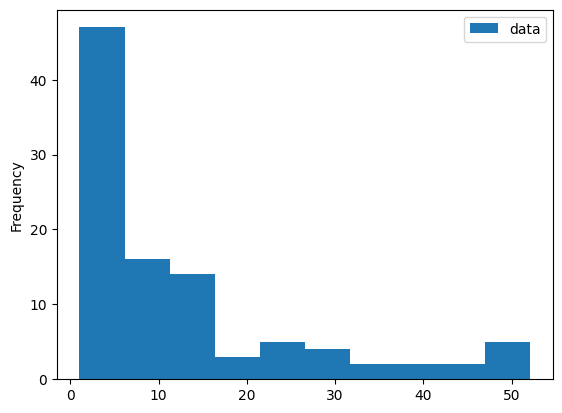

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

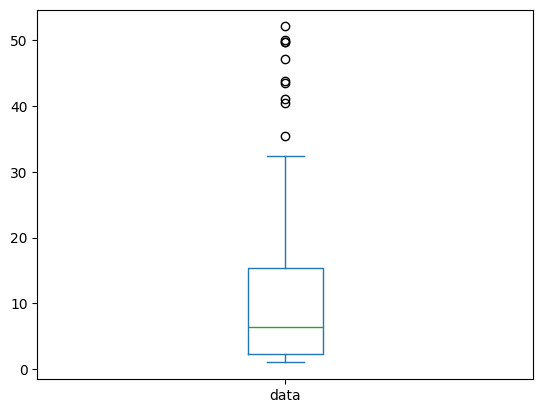

In [3]:
df.plot.box()

I don't find either plot particularly engaging for answering the original question. Both visuals lack significant context without titles, axes, or visuals that clearly highlight high priced drugs.I find the histogram slightly better as you can clearly see the long tail of expensive drugs and the high frequency of drugs under $15. The box plot does show the outliers but they overlap and it's difficult to see the frequency across the population.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

## Import Modules and Common Functions

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os
from fpdf import FPDF
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
# Function to calculate summary stats
def calculate_statistics(column):
    non_null_count = df[column].count()
    unique_count = df[column].nunique()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0] if not df[column].mode().empty else np.nan
    std_dev = df[column].std()
    variance = df[column].var()
    minimum = df[column].min()
    maximum = df[column].max()
    value_range = maximum - minimum
    
    return {
        'non_null_count': non_null_count,
        'unique_count': unique_count,
        'mean': mean,
        'median': median,
        'mode': mode,
        'std_dev': std_dev,
        'variance': variance,
        'min': minimum,
        'max': maximum,
        'range': value_range
    }

def generate_plots(df, sample_amt, output_to_pdf, kde, violins, swarms, grouped_hists, ds_name):
    # Get current timestamp for the PDF filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    pdf_filename = f"output/statistics_plots_{ds_name}_{timestamp}.pdf"
    
    if output_to_pdf:
        pdf_pages = PdfPages(pdf_filename)
        
        # Add title page
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')
        title_text = f"Variable Analysis of the {ds_name} Dataset"
        ax.text(0.5, 0.5, title_text, ha='center', va='center', fontsize=24, fontweight='bold')
        pdf_pages.savefig(fig)
        plt.close(fig)
    
    # Iterate over each numeric column
    for column in df.select_dtypes(include=[np.number]).columns:
        if df[column].dropna().empty:
            continue  # Skip this column if it is entirely NaN
        
        stats = calculate_statistics(column)
        
        if output_to_pdf:
            # Create a new figure for each column's statistics
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.axis('off')
            text = f"Statistics for {column}:\n"
            text += f"Count Non Nulls: {stats['non_null_count']}\n"
            text += f"Count Unique: {stats['unique_count']}\n"
            text += f"Mean: {stats['mean']:.1f}\n"
            text += f"Median: {stats['median']:.1f}\n"
            text += f"Mode: {stats['mode']:.1f}\n"
            text += f"Standard Deviation: {stats['std_dev']:.1f}\n"
            text += f"Variance: {stats['variance']:.1f}\n"
            text += f"Minimum: {stats['min']:.1f}\n"
            text += f"Maximum: {stats['max']:.1f}\n"
            text += f"Range: {stats['range']:.1f}\n"
            ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12)
            pdf_pages.savefig(fig)
            plt.close(fig)
        else:
            print(f"Statistics for {column}:")
            print(f"Count Non Nulls: {stats['non_null_count']}")
            print(f"Count Unique: {stats['unique_count']}")
            print(f"Mean: {stats['mean']:.1f}")
            print(f"Median: {stats['median']:.1f}")
            print(f"Mode: {stats['mode']:.1f}")
            print(f"Standard Deviation: {stats['std_dev']:.1f}")
            print(f"Variance: {stats['variance']:.1f}")
            print(f"Minimum: {stats['min']:.1f}")
            print(f"Maximum: {stats['max']:.1f}")
            print(f"Range: {stats['range']:.1f}\n")
        
        # Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        if output_to_pdf:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()
        
        if kde:
            # KDE plot
            plt.figure(figsize=(10, 6))
            sns.kdeplot(df[column], fill=True)
            plt.title(f'KDE Plot of {column}')
            plt.xlabel(column)
            plt.ylabel('Density')
            if output_to_pdf:
                pdf_pages.savefig()
                plt.close()
            else:
                plt.show()
        
        if violins:
            # Violin plot
            plt.figure(figsize=(10, 6))
            sns.violinplot(x=df[column])
            plt.title(f'Violin Plot of {column}')
            plt.xlabel(column)
            if output_to_pdf:
                pdf_pages.savefig()
                plt.close()
            else:
                plt.show()
        
        if swarms:
            # Swarm plot
            if df[column].dropna().shape[0] >= sample_amt:
                sns.swarmplot(x=df[column].dropna().sample(n=sample_amt), size=3)
            else:
                sns.swarmplot(x=df[column].dropna(), size=3)
            plt.title(f'Swarm Plot of {column}')
            plt.xlabel(column)
            if output_to_pdf:
                pdf_pages.savefig()
                plt.close()
            else:
                plt.show()
        
        # Grouped histograms by top 3 categorical values
        if grouped_hists:
            for cat_column in df.select_dtypes(include=['object']).columns:
                top_values = df[cat_column].value_counts().index[:3]
                df_filtered = df[df[cat_column].isin(top_values)]
                
                if df_filtered[column].dropna().empty:
                    continue  # Skip if the filtered DataFrame is empty
                
                fig, axes = plt.subplots(1, len(top_values), figsize=(15, 5), sharey=True)
                if len(top_values) == 1:
                    axes = [axes]  # Ensure axes is always iterable
                colors = sns.color_palette("husl", len(top_values))
                
                for ax, value, color in zip(axes, top_values, colors):
                    sns.histplot(data=df_filtered[df_filtered[cat_column] == value], x=column, kde=False, ax=ax, color=color)
                    ax.set_title(f'{cat_column}: {value}')
                
                plt.suptitle(f'Grouped Histogram of {column} by {cat_column} (Top 3 Values)', fontsize=16)
                plt.xlabel(column)
                plt.ylabel('Frequency')
                if output_to_pdf:
                    pdf_pages.savefig()
                    plt.close()
                else:
                    plt.show()
    
    if output_to_pdf:
        pdf_pages.close()
        print(f"PDF saved as {pdf_filename}")

# Example usage
# generate_plots(df, sample_amt=100, output_to_pdf=True, ds_name='Ames Housing')  # Save to PDF
# generate_plots(df, sample_amt=100, output_to_pdf=False, ds_name='Ames Housing') # Print and show plots


In [6]:
'''ANALYZE A SINGLE COLUMN'''

# Function to calculate summary stats
def calculate_statistics_column(df, column):
    non_null_count = df[column].count()
    unique_count = df[column].nunique()
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0] if not df[column].mode().empty else np.nan
    std_dev = df[column].std()
    variance = df[column].var()
    minimum = df[column].min()
    maximum = df[column].max()
    value_range = maximum - minimum
    
    return {
        'non_null_count': non_null_count,
        'unique_count': unique_count,
        'mean': mean,
        'median': median,
        'mode': mode,
        'std_dev': std_dev,
        'variance': variance,
        'min': minimum,
        'max': maximum,
        'range': value_range
    }

# Function to analyze and visualize a single numeric column
def analyze_column(df, column, sample_amt, output_to_pdf, pdf_pages=None):
    stats = calculate_statistics_column(df, column)
    
    if output_to_pdf and pdf_pages:
        # Create a new figure for the column's statistics
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.axis('off')
        text = f"Statistics for {column}:\n"
        text += f"Count Non Nulls: {stats['non_null_count']}\n"
        text += f"Count Unique: {stats['unique_count']}\n"
        text += f"Mean: {stats['mean']:.1f}\n"
        text += f"Median: {stats['median']:.1f}\n"
        text += f"Mode: {stats['mode']:.1f}\n"
        text += f"Standard Deviation: {stats['std_dev']:.1f}\n"
        text += f"Variance: {stats['variance']:.1f}\n"
        text += f"Minimum: {stats['min']:.1f}\n"
        text += f"Maximum: {stats['max']:.1f}\n"
        text += f"Range: {stats['range']:.1f}\n"
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12)
        pdf_pages.savefig(fig)
        plt.close(fig)
    else:
        print(f"Statistics for {column}:")
        print(f"Count Non Nulls: {stats['non_null_count']}")
        print(f"Count Unique: {stats['unique_count']}")
        print(f"Mean: {stats['mean']:.1f}")
        print(f"Median: {stats['median']:.1f}")
        print(f"Mode: {stats['mode']:.1f}")
        print(f"Standard Deviation: {stats['std_dev']:.1f}")
        print(f"Variance: {stats['variance']:.1f}")
        print(f"Minimum: {stats['min']:.1f}")
        print(f"Maximum: {stats['max']:.1f}")
        print(f"Range: {stats['range']:.1f}\n")
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], fill=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # Violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[column])
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # Swarm plot
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x=df[column].sample(n=sample_amt), size=3)
    plt.title(f'Swarm Plot of {column}')
    plt.xlabel(column)
    if output_to_pdf and pdf_pages:
        pdf_pages.savefig()
        plt.close()
    else:
        plt.show()
    
    # Grouped histograms by top 5 categorical values
    for cat_col in df.select_dtypes(include=['object']).columns:
        top_categories = df[cat_col].value_counts().nlargest(5).index
        plt.figure(figsize=(10, 6))
        for category in top_categories:
            sns.histplot(df[df[cat_col] == category][column], kde=False, label=category, alpha=0.6)
        plt.title(f'Histogram of {column} grouped by {cat_col}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend(title=cat_col)
        if output_to_pdf and pdf_pages:
            pdf_pages.savefig()
            plt.close()
        else:
            plt.show()

# Example usage
# analyze_column(df, 'numeric_column', sample_amt=100, output_to_pdf=True, pdf_pages=pdf_pages)  # Save to PDF
# analyze_column(df, 'numeric_column', sample_amt=100, output_to_pdf=False) # Print and show plots


# 3.1 PRICELINE DATASET ANALYSIS

## CONCLUSIONS

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
    - The data analysis shows reliable distributions with relatively few outliers. The dataset could be useful for predicting flight prices or understanding consumer behavior. However, due to the narrow scope of the data it's long-term utility is fairly limited.
  
- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
  - All numeric variables are right skewed
  - 66% of flights have 1 stop, 32% have 2 stops, and a very smaller number have zero or 3 stops.
  - Ticket price is right skewed, but the majority of the data is under $1,500

- Are there any outliers present?  (Data points that are far from the others.)
    - Ticket prices have a long tail of prices up to $8,000
    - All wait times have a tail out to 24 hours. It seems there is an abrupt cutoff at 24 hours.

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?
    - Travel-Time ranges from 160 minutes to 4,930 minutes
    - 1 stop wait time ranges from 39 to 1,440 minutes
    - 2 stop wait time ranges from 50 to 1,435 minutes

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
    - The swarm plots aren't particularly interesting. I had to limit visual to a random sample of 1,000 observiations. The spread makes it difficult to interpret.
    - I adjusted the bin sizes during my analysis to try to have the optimal setting. Due to the value of data, a large number of bins didn't change much of the results.

- Does the distribution appear normal, or does it have a different distribution?
    - Each variable appears to be right-skewed. Deeper anaylsis using random sampling could lessen the imapct of outliers.


## Code Section

Statistics for travel_time_minutes:
Count Non Nulls: 2459
Count Unique: 755
Mean: 1551.1
Median: 1430.0
Mode: 965.0
Standard Deviation: 728.4
Variance: 530569.4
Minimum: 160.0
Maximum: 4930.0
Range: 4770.0



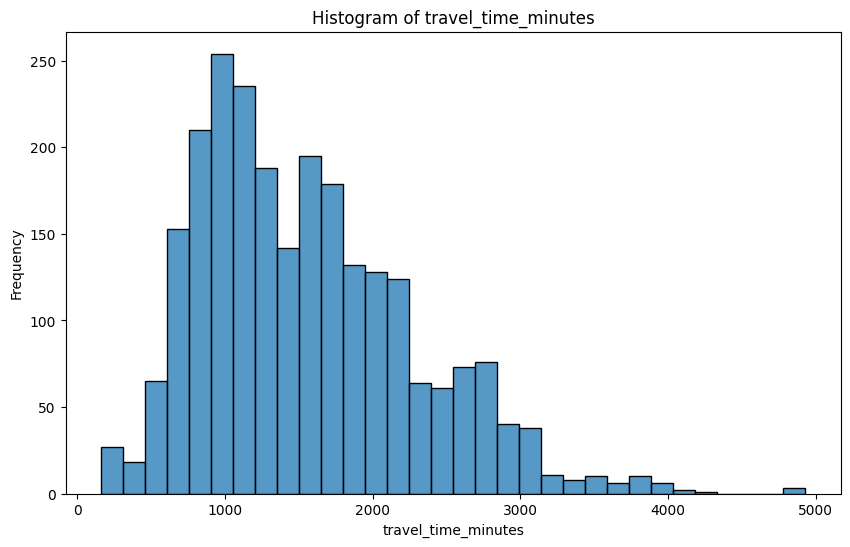

Statistics for 1st_stop_wait_minutes:
Count Non Nulls: 2401
Count Unique: 495
Mean: 510.9
Median: 424.0
Mode: 130.0
Standard Deviation: 376.5
Variance: 141722.5
Minimum: 39.0
Maximum: 1440.0
Range: 1401.0



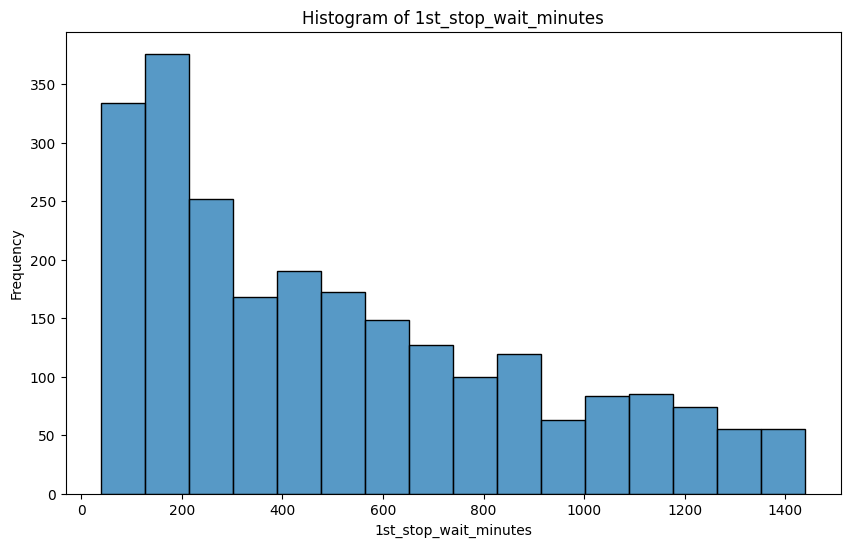

Statistics for 2nd_stop_wait_minutes:
Count Non Nulls: 654
Count Unique: 209
Mean: 426.1
Median: 260.0
Mode: 240.0
Standard Deviation: 351.5
Variance: 123567.9
Minimum: 50.0
Maximum: 1435.0
Range: 1385.0



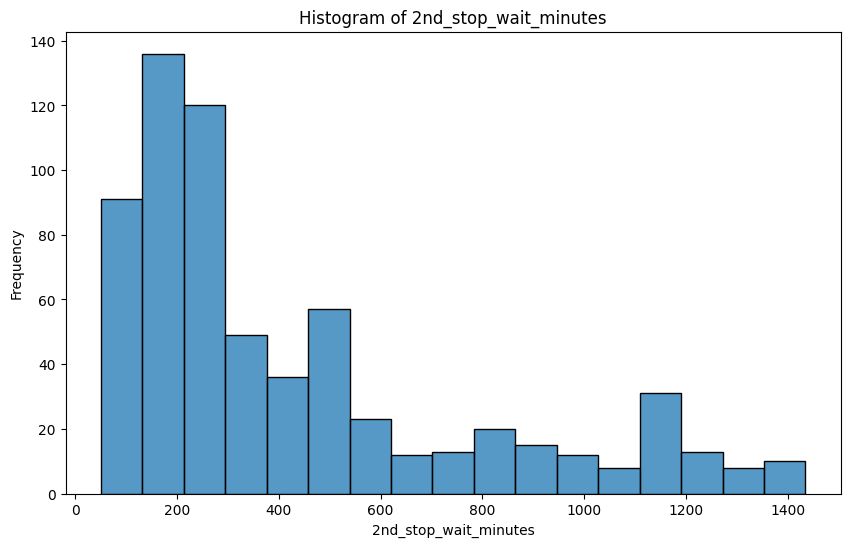

Statistics for 3rd_stop_wait_minutes:
Count Non Nulls: 17
Count Unique: 5
Mean: 356.8
Median: 200.0
Mode: 200.0
Standard Deviation: 392.0
Variance: 153626.8
Minimum: 176.0
Maximum: 1385.0
Range: 1209.0



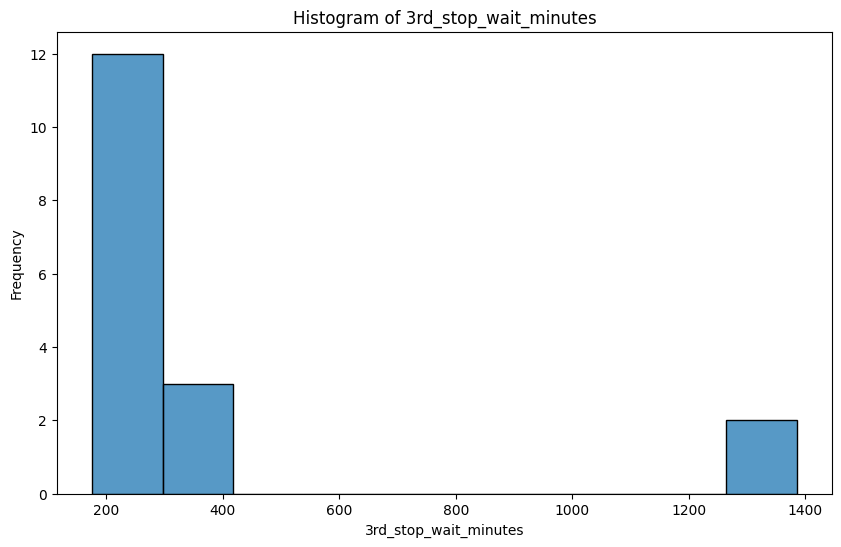

Statistics for stops:
Count Non Nulls: 2459
Count Unique: 4
Mean: 1.3
Median: 1.0
Mode: 1.0
Standard Deviation: 0.5
Variance: 0.3
Minimum: 0.0
Maximum: 3.0
Range: 3.0



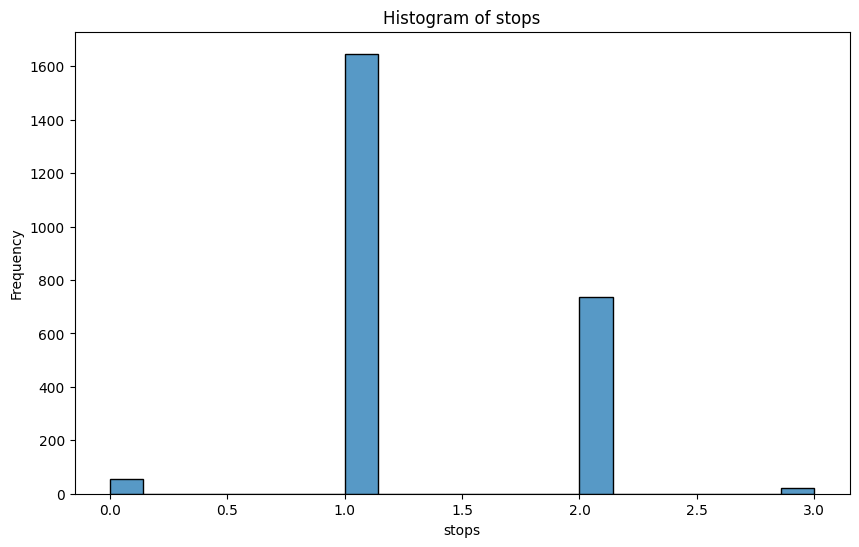

Statistics for ticket_price_usd:
Count Non Nulls: 2461
Count Unique: 767
Mean: 1316.5
Median: 1128.0
Mode: 1508.0
Standard Deviation: 884.8
Variance: 782879.3
Minimum: 135.0
Maximum: 7867.0
Range: 7732.0



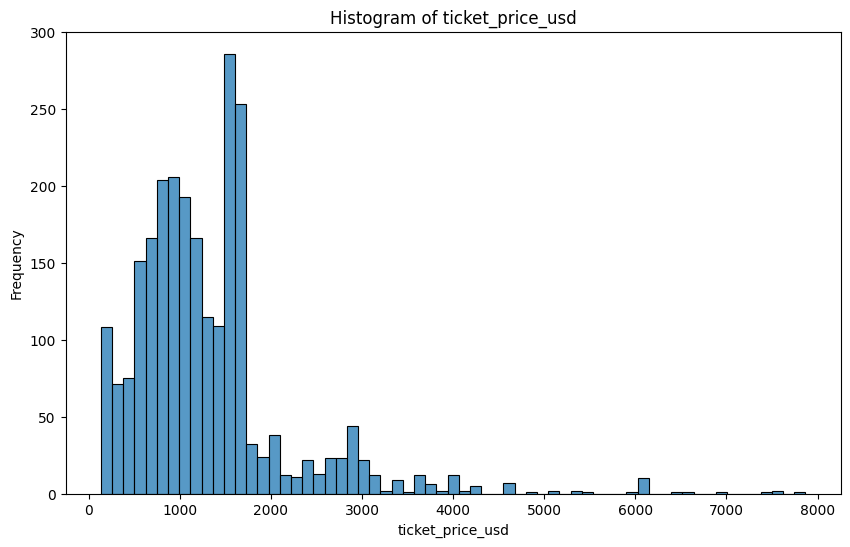

In [7]:
'''PRICE LINE DATASET'''
fname = "priceline_clean_no_encode.csv"
dataset_name = "priceline"
df = pd.read_csv(fname)

n_samples = 1000 # For Swarm Plots
generate_plots(df, sample_amt=n_samples,output_to_pdf=False, kde=False, violins=False, swarms=False, grouped_hists=False, ds_name=dataset_name)

Statistics for ticket_price_usd:
Count Non Nulls: 2461
Count Unique: 767
Mean: 1316.5
Median: 1128.0
Mode: 1508.0
Standard Deviation: 884.8
Variance: 782879.3
Minimum: 135.0
Maximum: 7867.0
Range: 7732.0



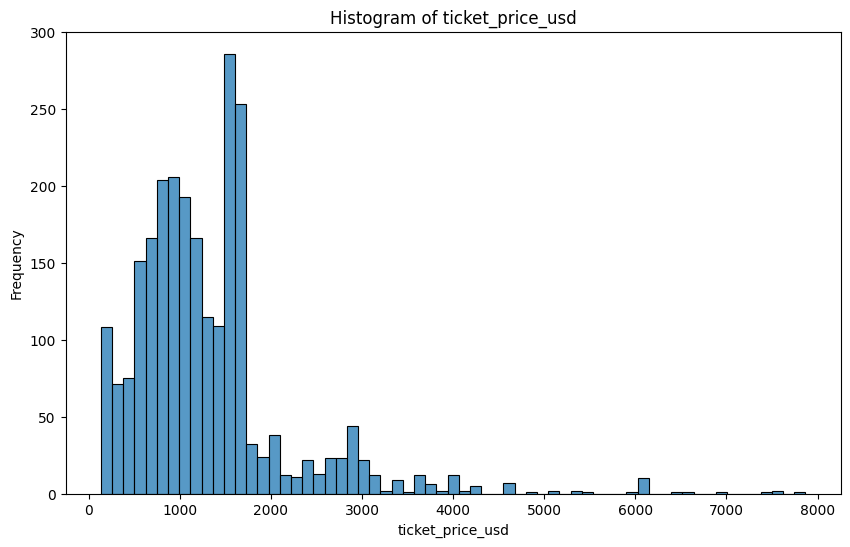

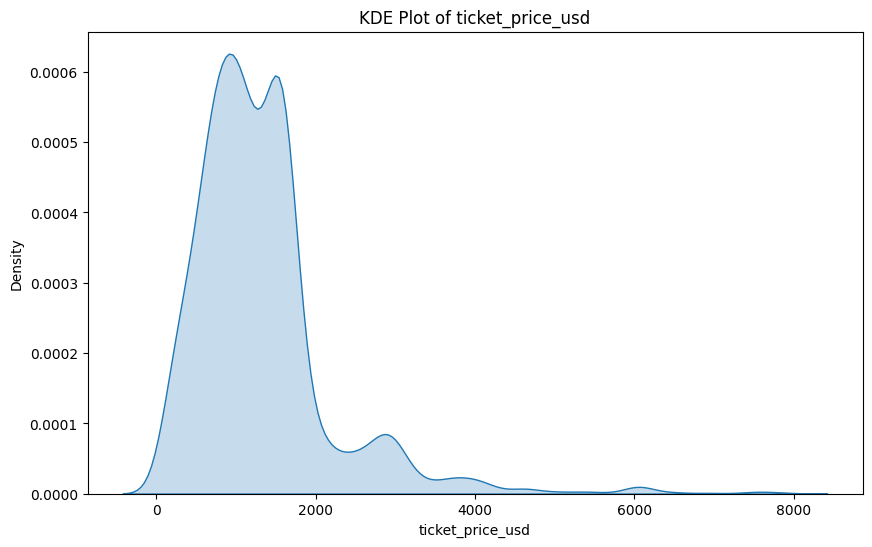

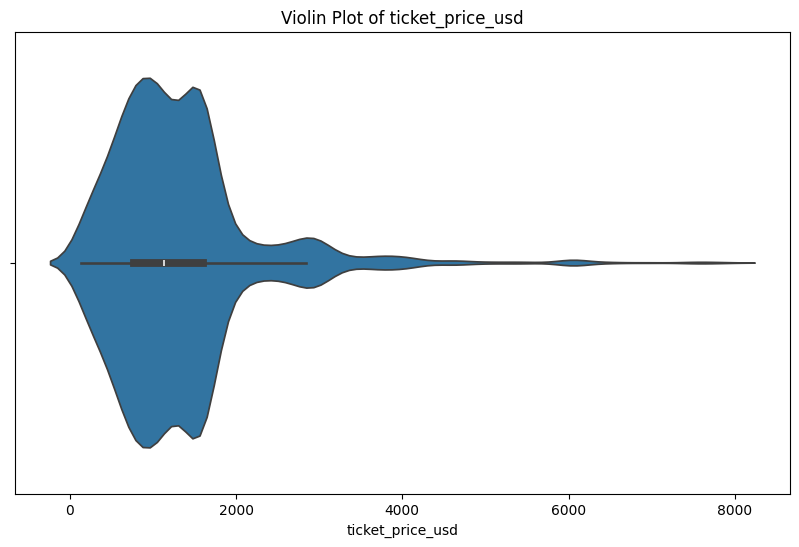

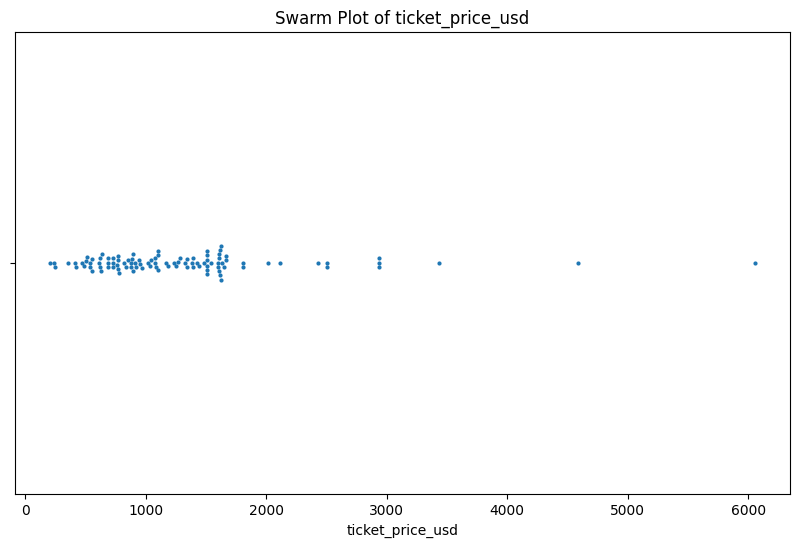

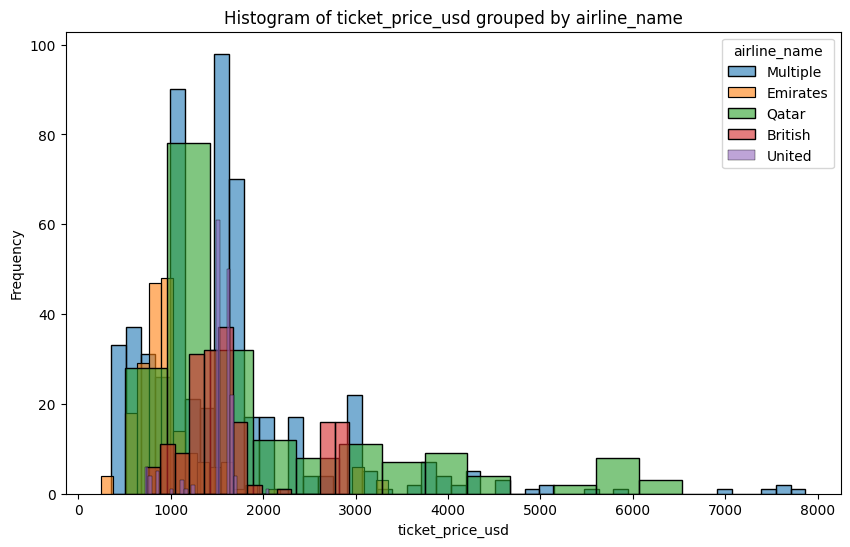

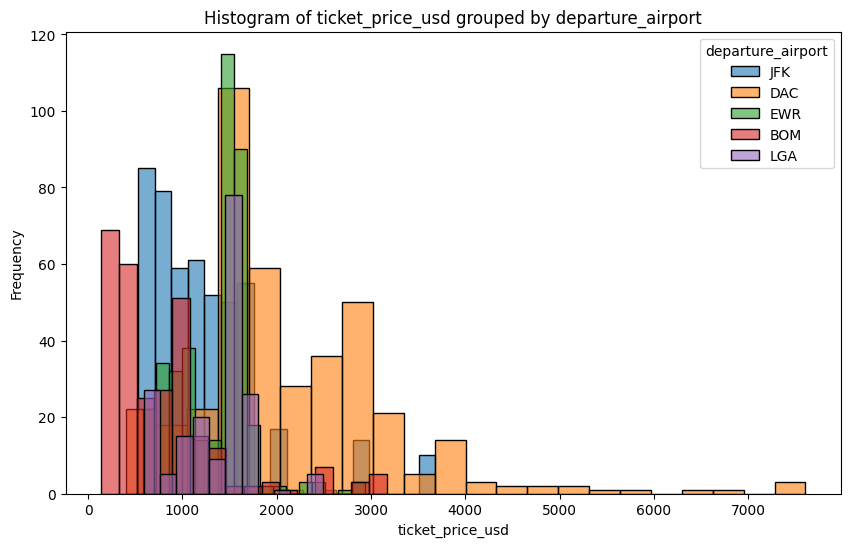

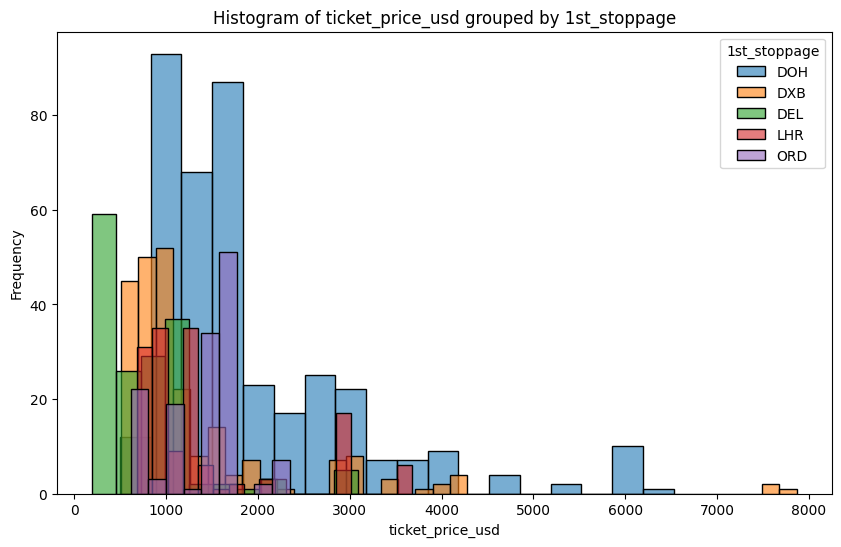

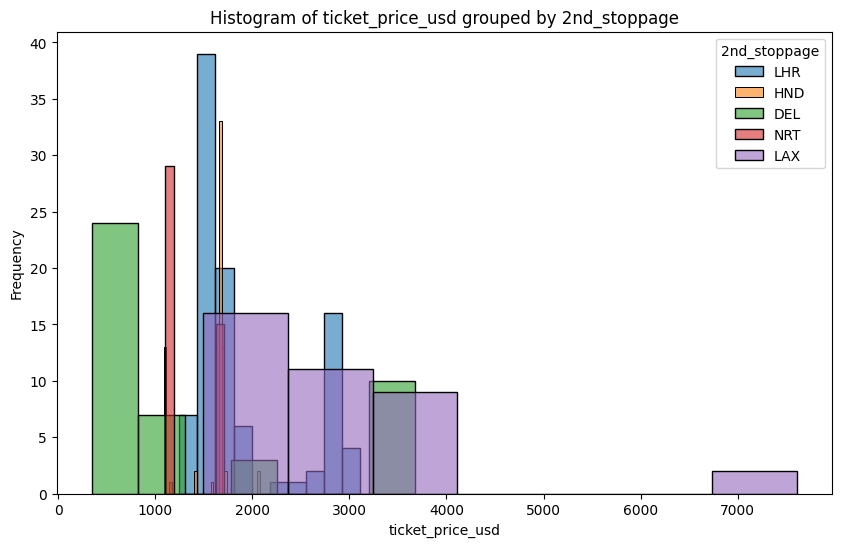

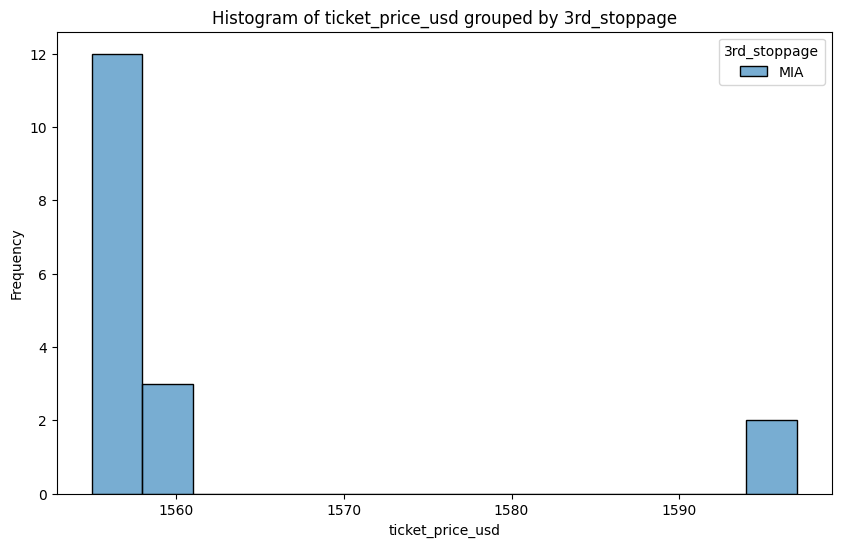

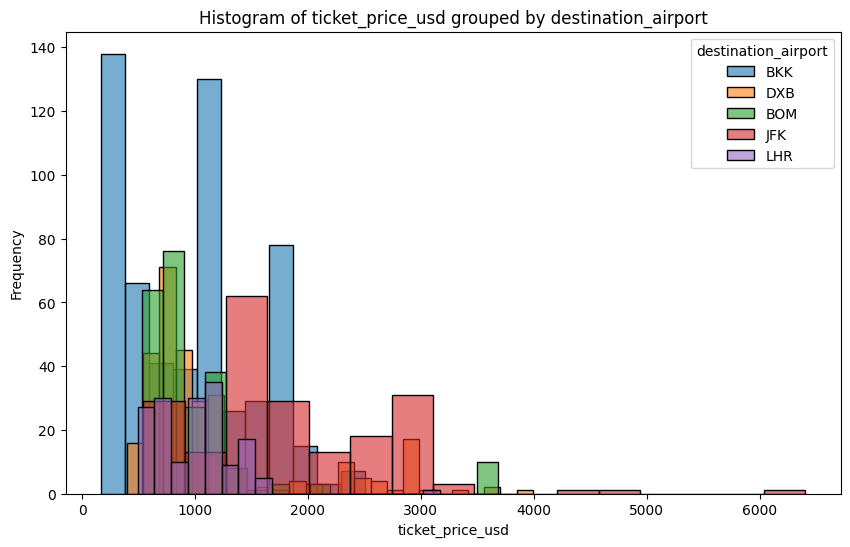

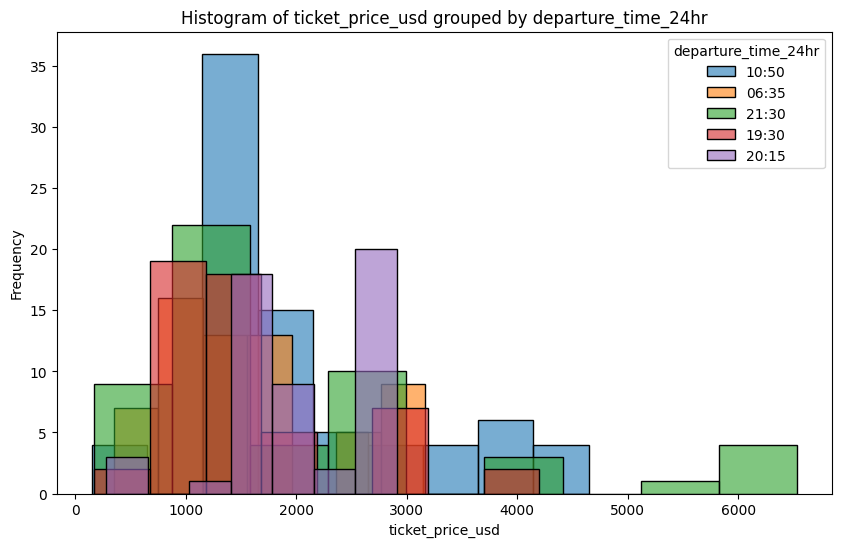

In [8]:

analyze_column(df, 'ticket_price_usd', sample_amt=100, output_to_pdf=False)


# 3.2 FLIGHT DELAY DATASET ANALYSIS

Statistics for depdelay:
Count Non Nulls: 1201664
Count Unique: 803
Mean: 9.4
Median: -1.0
Mode: 0.0
Standard Deviation: 34.8
Variance: 1211.6
Minimum: -866.0
Maximum: 1476.0
Range: 2342.0



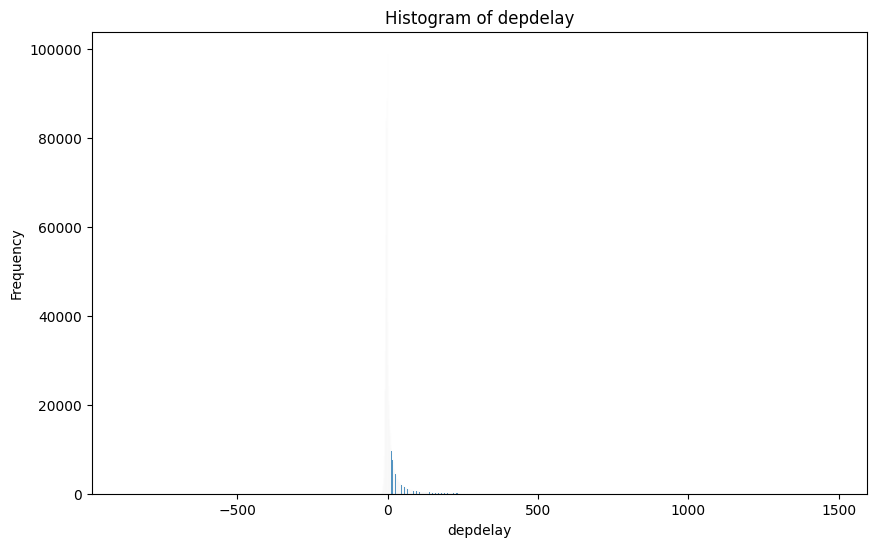

Statistics for arrdelay:
Count Non Nulls: 1198458
Count Unique: 823
Mean: 5.4
Median: -4.0
Mode: -7.0
Standard Deviation: 37.3
Variance: 1394.4
Minimum: -83.0
Maximum: 1452.0
Range: 1535.0



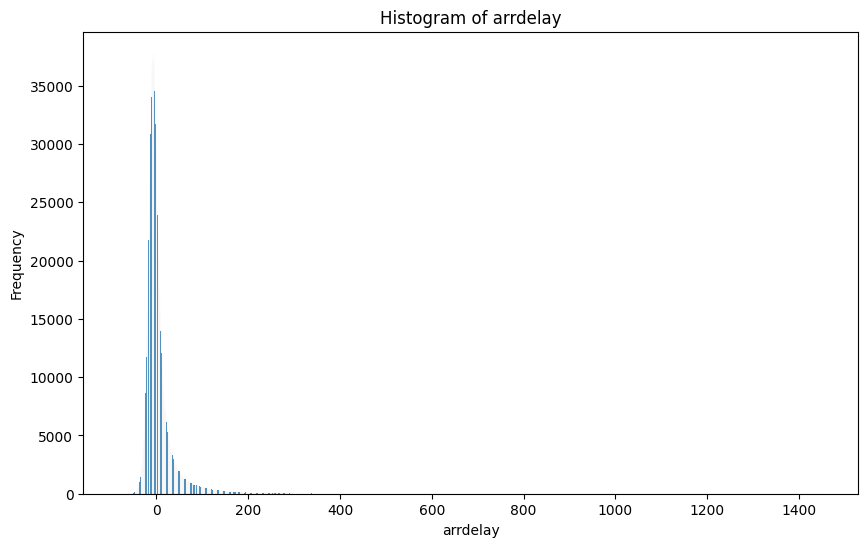

Statistics for marketshareorigin:
Count Non Nulls: 1201664
Count Unique: 108441
Mean: 0.3
Median: 0.3
Mode: 1.0
Standard Deviation: 0.2
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



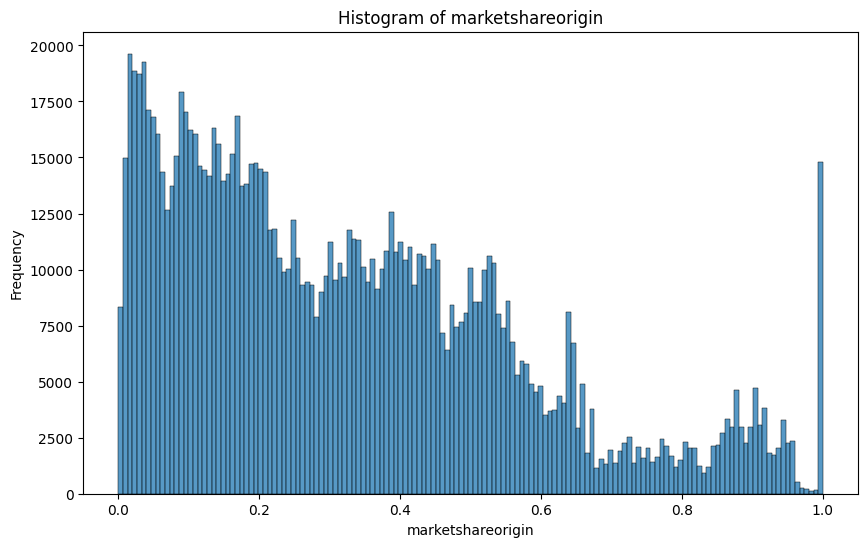

Statistics for marketsharedest:
Count Non Nulls: 1201664
Count Unique: 109659
Mean: 0.3
Median: 0.3
Mode: 1.0
Standard Deviation: 0.2
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



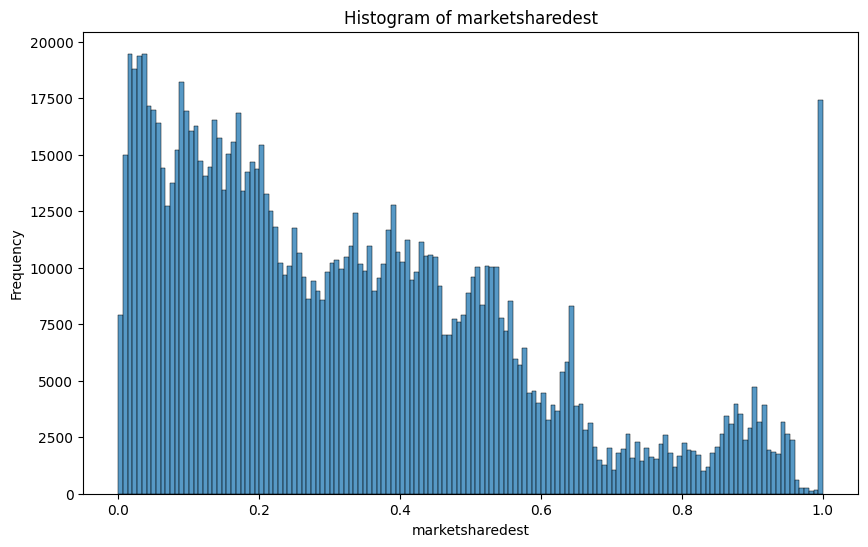

Statistics for hhiorigin:
Count Non Nulls: 1201664
Count Unique: 27136
Mean: 0.3
Median: 0.3
Mode: 1.0
Standard Deviation: 0.2
Variance: 0.0
Minimum: 0.1
Maximum: 1.0
Range: 0.9



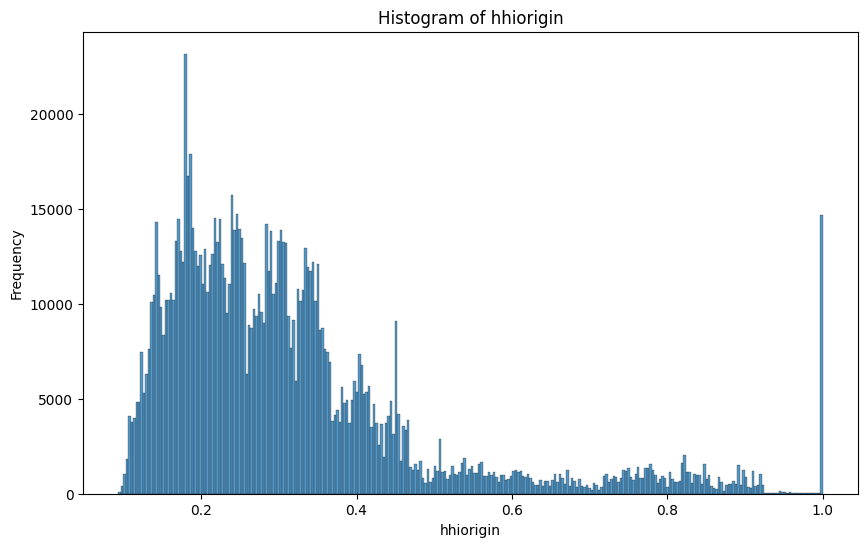

Statistics for hhidest:
Count Non Nulls: 1201664
Count Unique: 27697
Mean: 0.3
Median: 0.3
Mode: 1.0
Standard Deviation: 0.2
Variance: 0.0
Minimum: 0.1
Maximum: 1.0
Range: 0.9



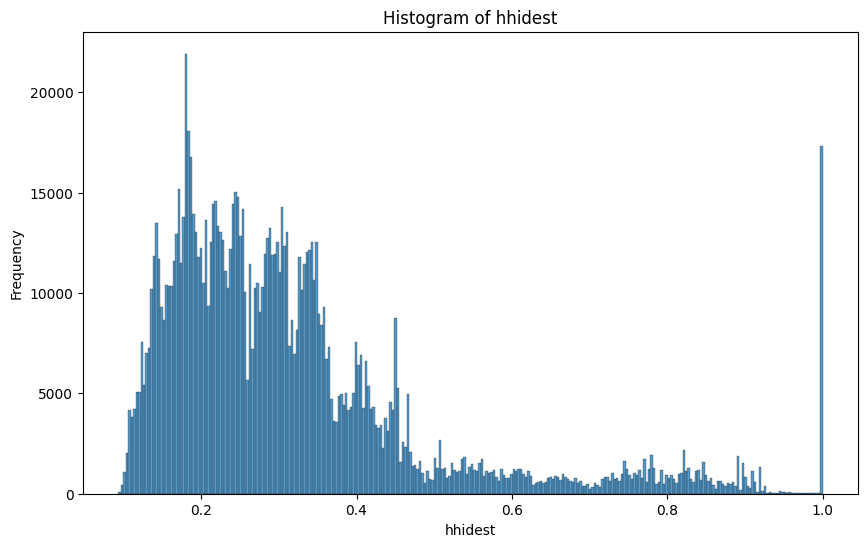

Statistics for nonhubairportorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



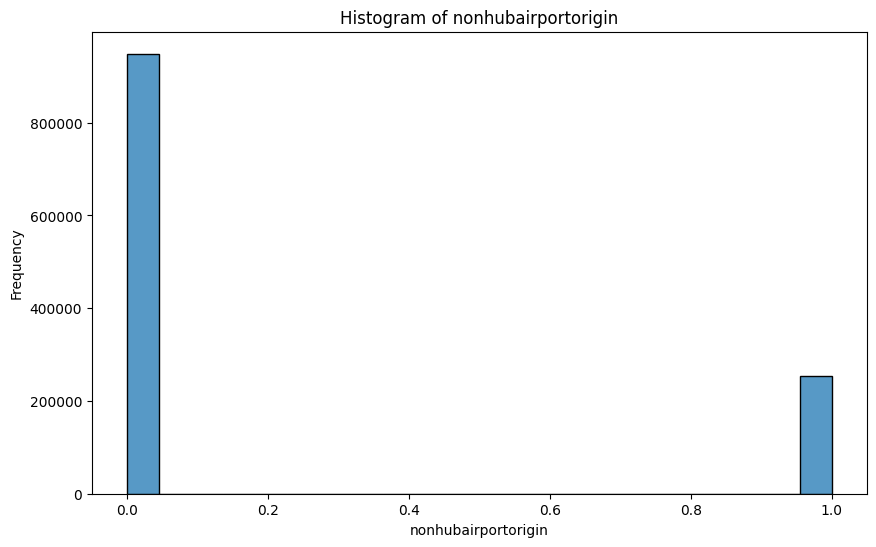

Statistics for smallhubairportorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



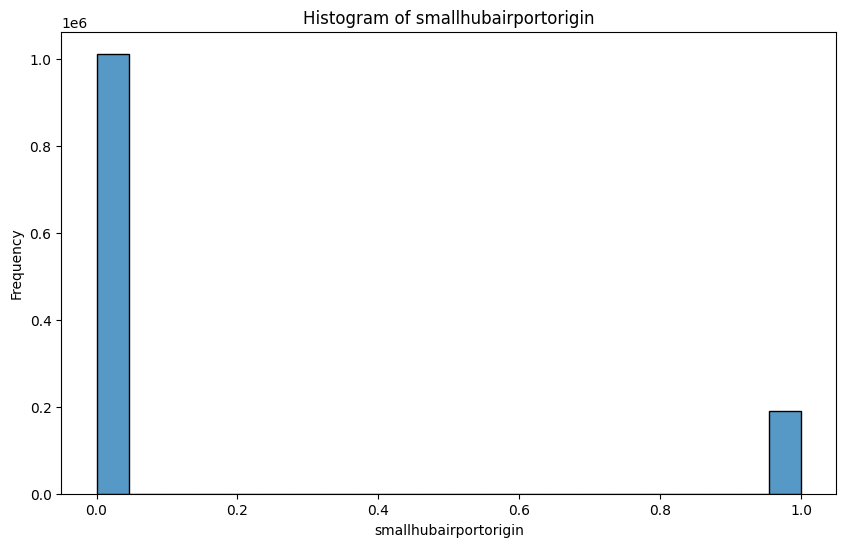

Statistics for mediumhubairportorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



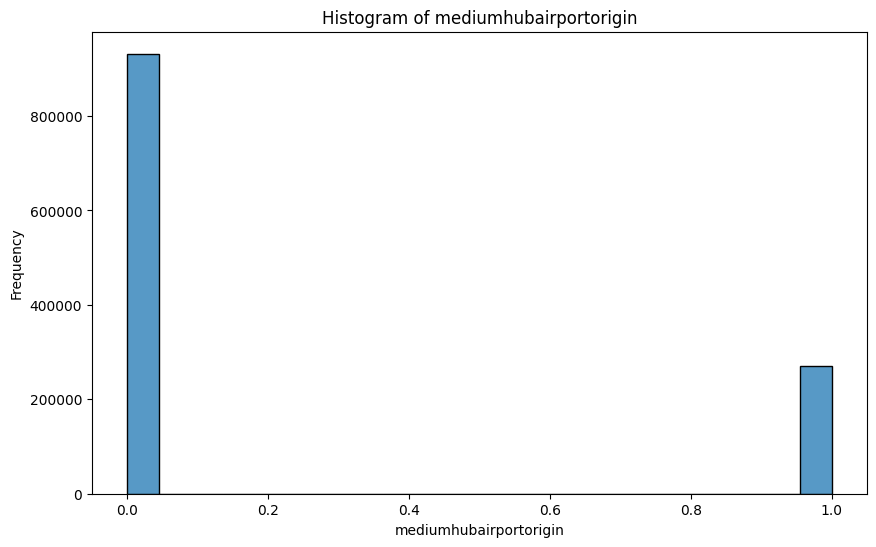

Statistics for largehubairportorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.4
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



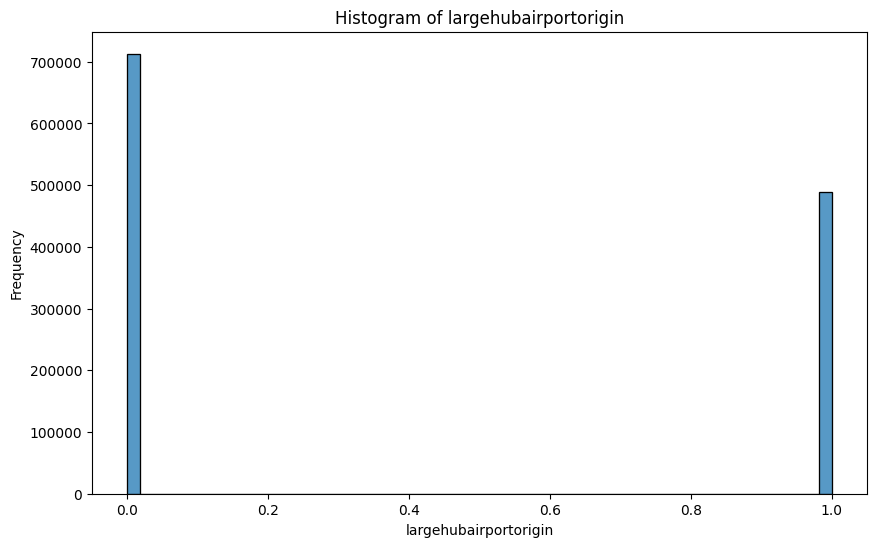

Statistics for nonhubairportdest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



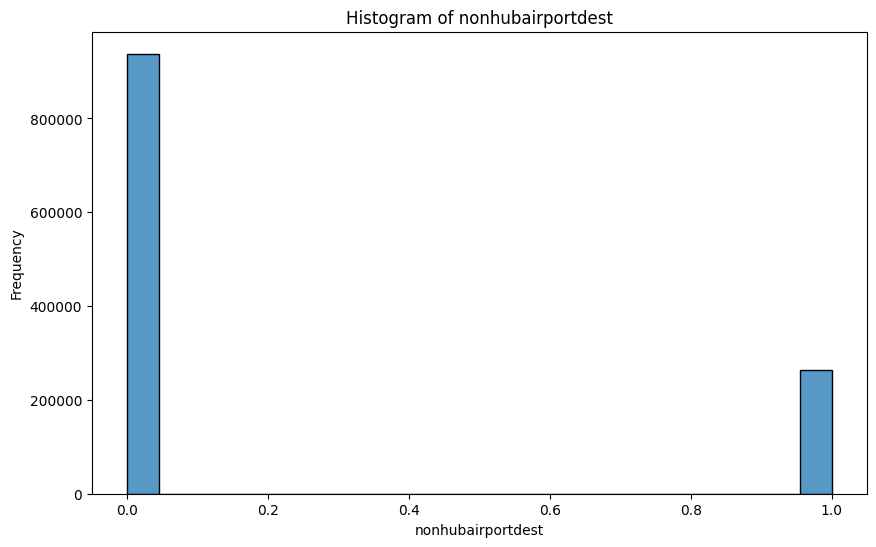

Statistics for smallhubairportdest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



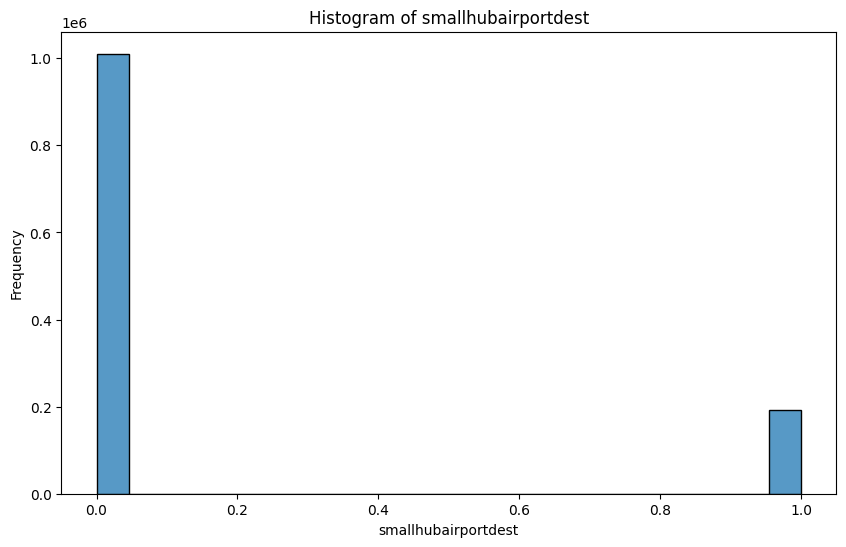

Statistics for mediumhubairportdest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



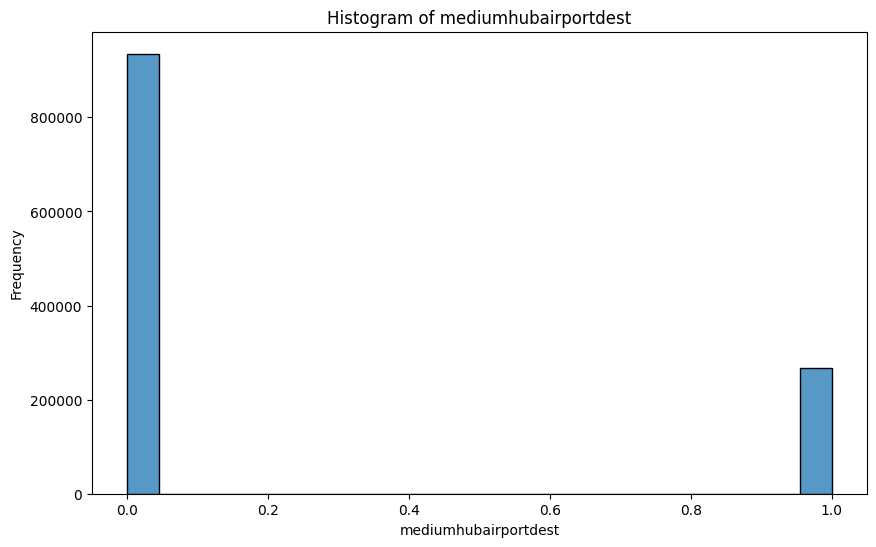

Statistics for largehubairportdest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.4
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



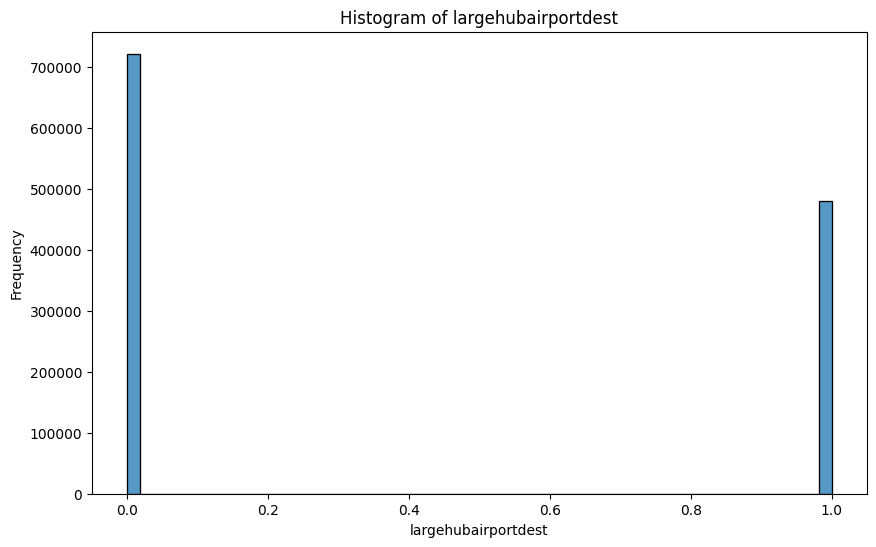

Statistics for nonhubairlineorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.5
Median: 1.0
Mode: 1.0
Standard Deviation: 0.5
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



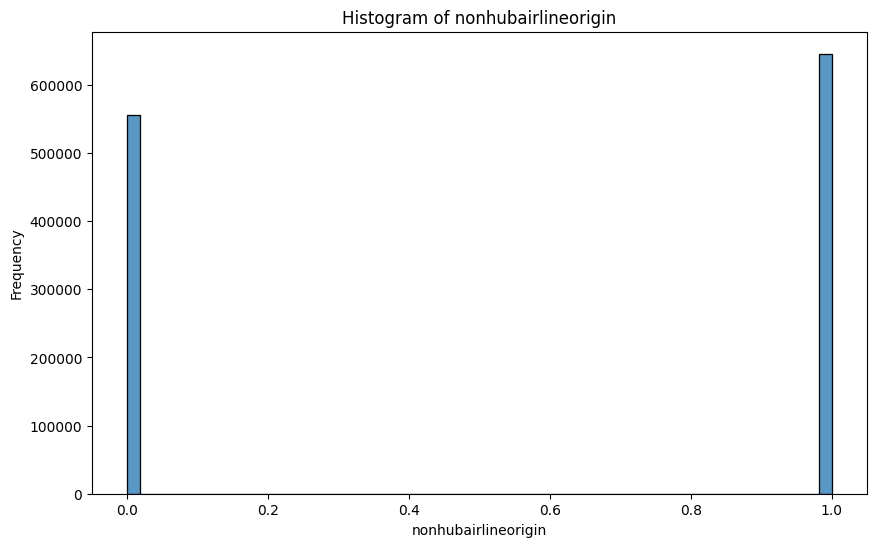

Statistics for smallhubairlineorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



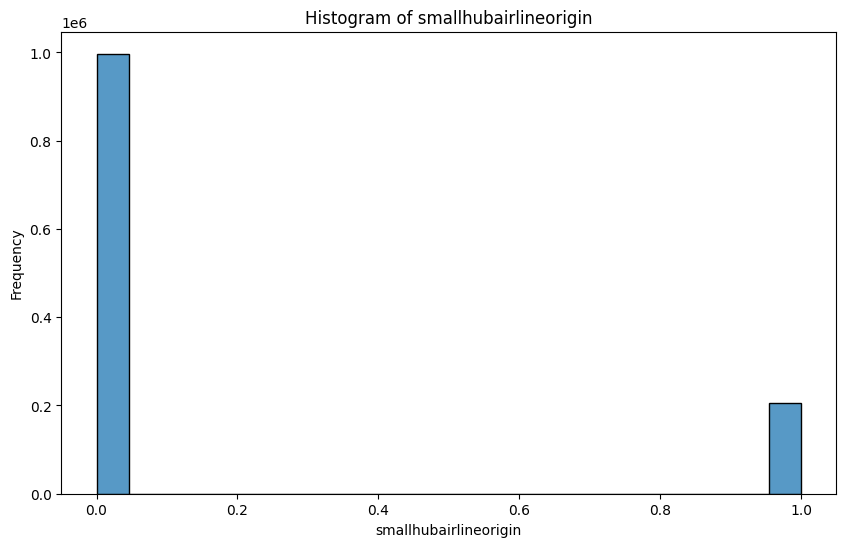

Statistics for mediumhubairlineorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



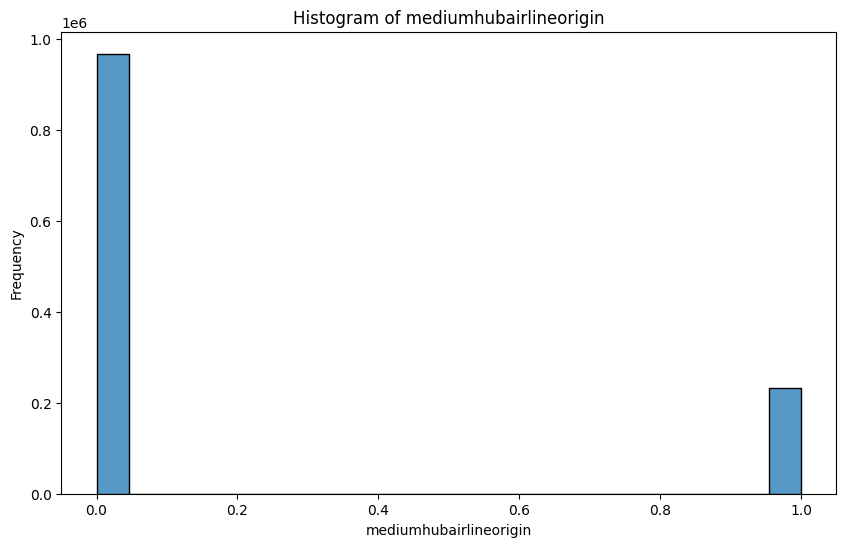

Statistics for largehubairlineorigin:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.1
Median: 0.0
Mode: 0.0
Standard Deviation: 0.3
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



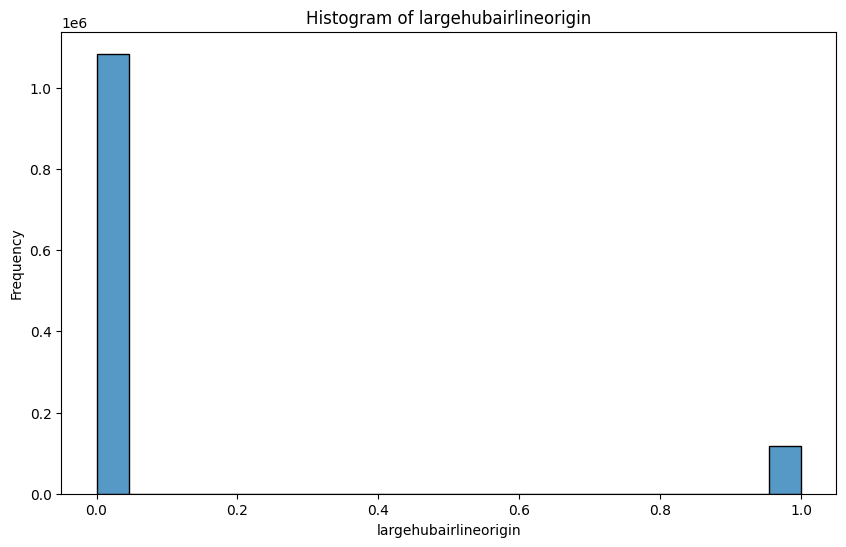

Statistics for nonhubairlinedest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.5
Median: 1.0
Mode: 1.0
Standard Deviation: 0.5
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



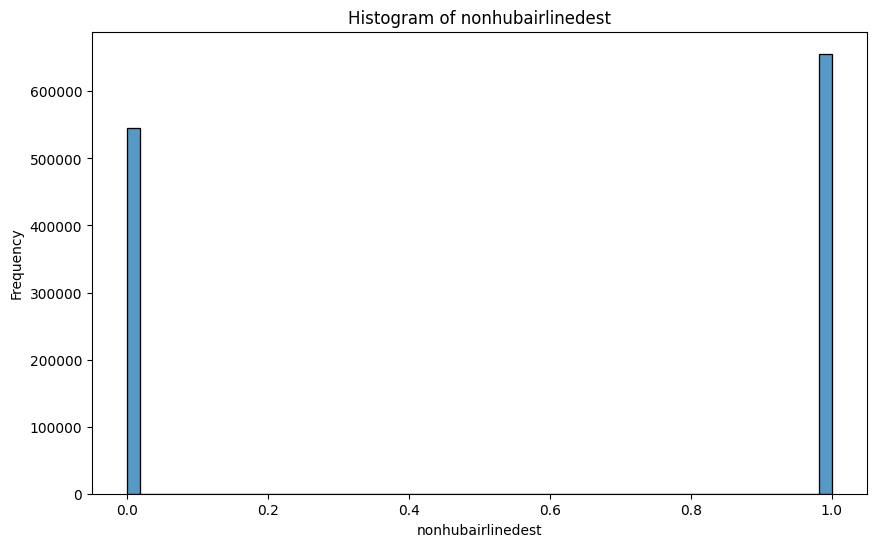

Statistics for smallhubairlinedest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



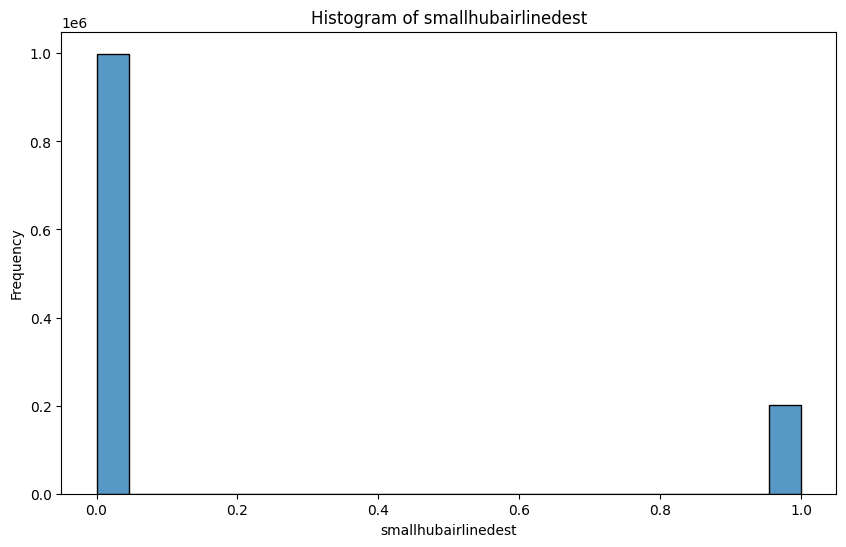

Statistics for mediumhubairlinedest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



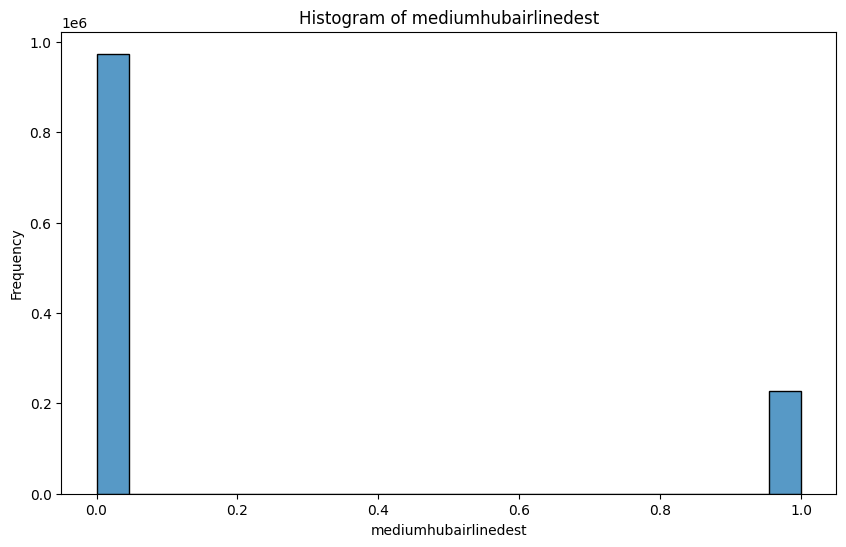

Statistics for largehubairlinedest:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.1
Median: 0.0
Mode: 0.0
Standard Deviation: 0.3
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



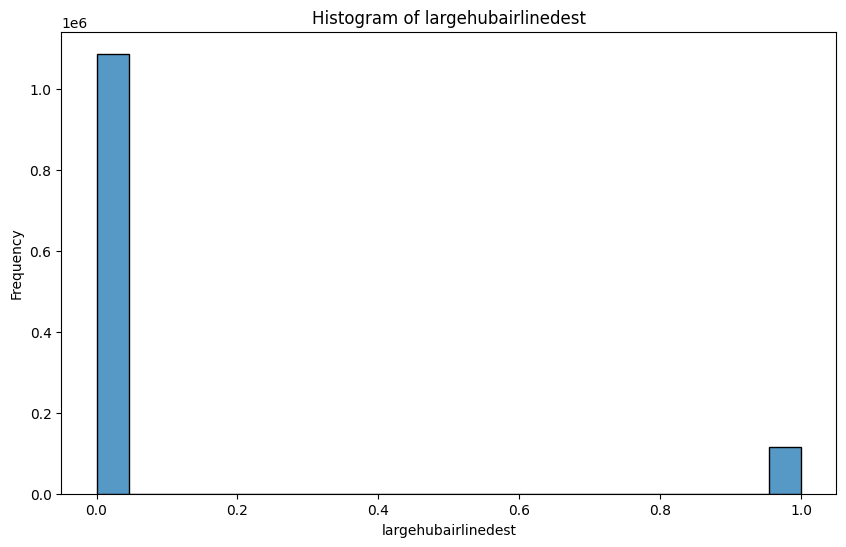

Statistics for year:
Count Non Nulls: 1201664
Count Unique: 14
Mean: 2011.3
Median: 2012.0
Mode: 2016.0
Standard Deviation: 3.9
Variance: 15.0
Minimum: 2004.0
Maximum: 2017.0
Range: 13.0



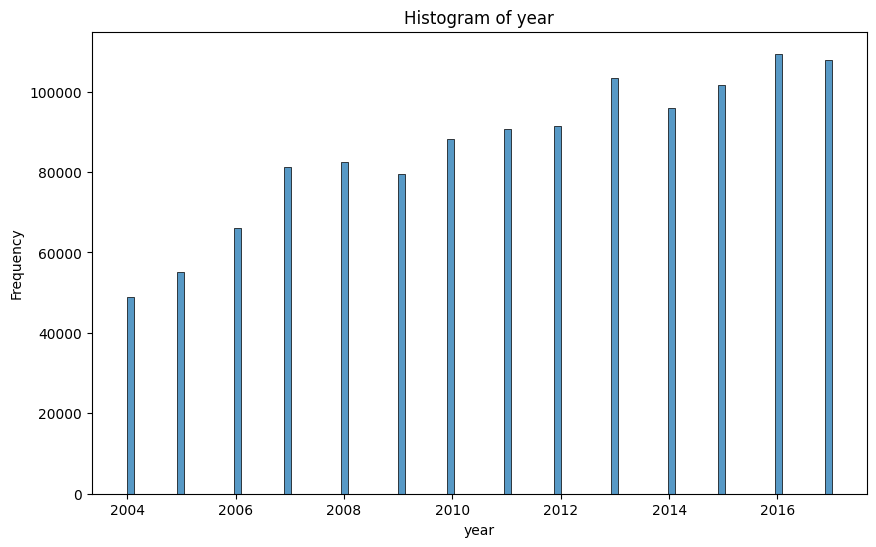

Statistics for month:
Count Non Nulls: 1201664
Count Unique: 12
Mean: 6.6
Median: 7.0
Mode: 7.0
Standard Deviation: 3.4
Variance: 11.5
Minimum: 1.0
Maximum: 12.0
Range: 11.0



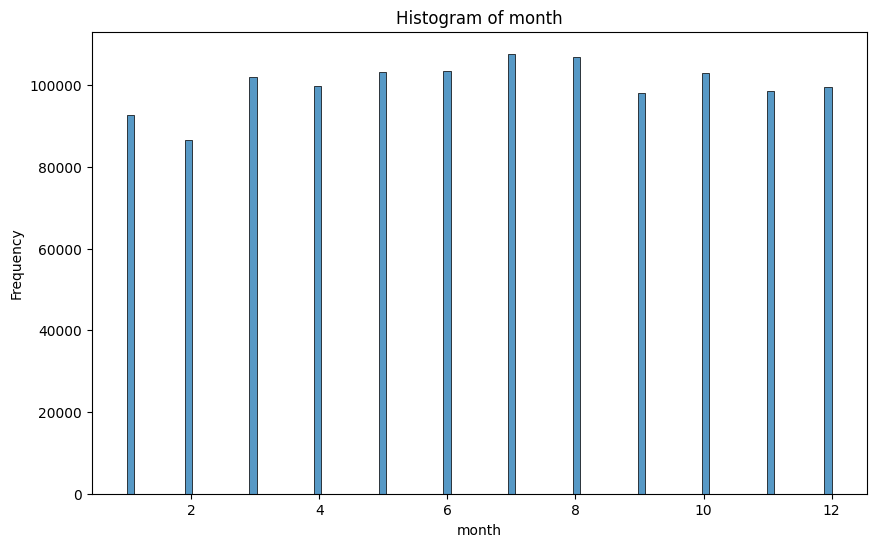

Statistics for dayofmonth:
Count Non Nulls: 1201664
Count Unique: 31
Mean: 15.7
Median: 16.0
Mode: 20.0
Standard Deviation: 8.8
Variance: 77.0
Minimum: 1.0
Maximum: 31.0
Range: 30.0



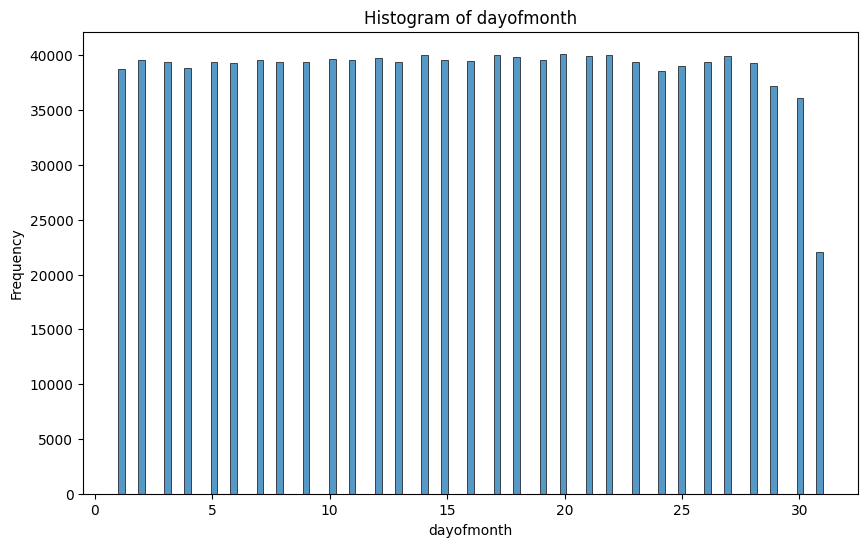

Statistics for dayofweek:
Count Non Nulls: 1201664
Count Unique: 7
Mean: 3.9
Median: 4.0
Mode: 5.0
Standard Deviation: 2.0
Variance: 3.9
Minimum: 1.0
Maximum: 7.0
Range: 6.0



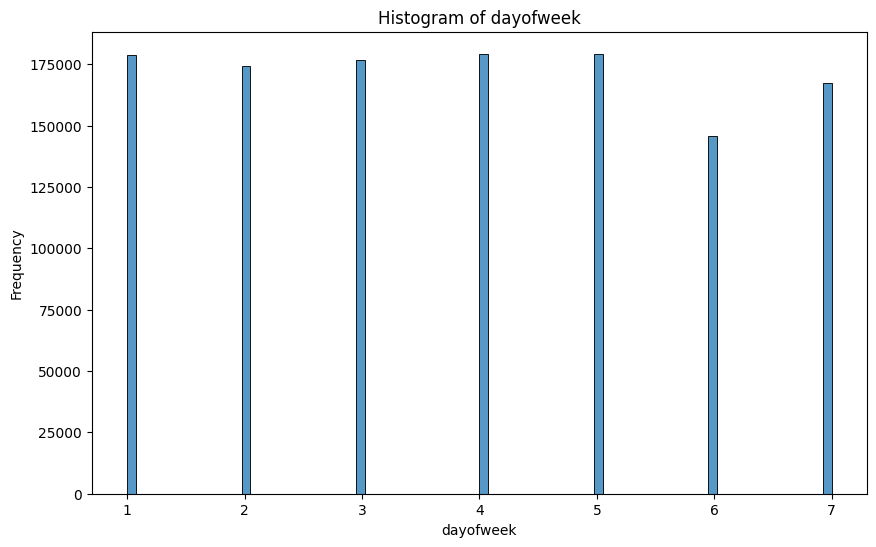

Statistics for scheduledhour:
Count Non Nulls: 1201664
Count Unique: 23
Mean: 13.0
Median: 13.0
Mode: 8.0
Standard Deviation: 4.7
Variance: 22.1
Minimum: 0.0
Maximum: 23.0
Range: 23.0



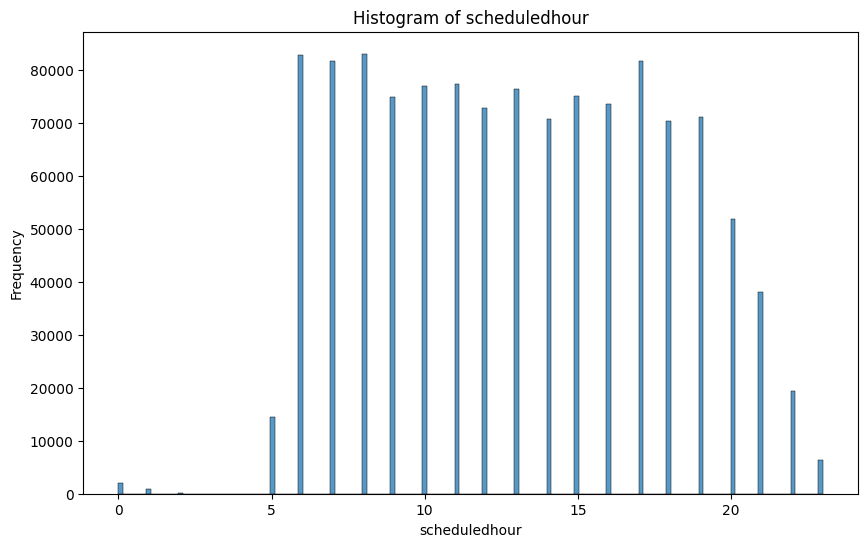

Statistics for originairportid:
Count Non Nulls: 1201664
Count Unique: 259
Mean: 12669.0
Median: 12889.0
Mode: 10397.0
Standard Deviation: 1549.1
Variance: 2399645.9
Minimum: 10135.0
Maximum: 16218.0
Range: 6083.0



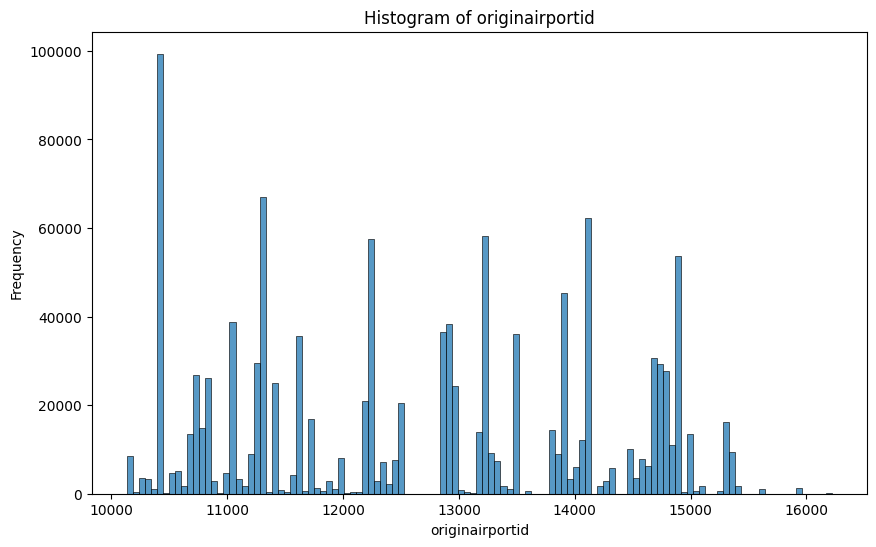

Statistics for destairportid:
Count Non Nulls: 1201664
Count Unique: 330
Mean: 12669.1
Median: 12889.0
Mode: 10397.0
Standard Deviation: 1550.5
Variance: 2404059.1
Minimum: 10135.0
Maximum: 16218.0
Range: 6083.0



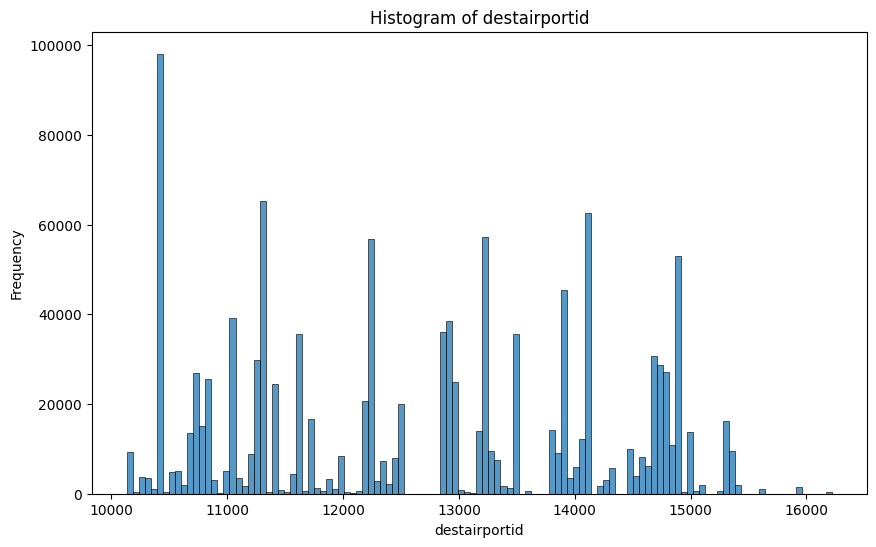

Statistics for capacity:
Count Non Nulls: 1201664
Count Unique: 82
Mean: 128.0
Median: 140.0
Mode: 140.0
Standard Deviation: 59.3
Variance: 3513.9
Minimum: 1.0
Maximum: 552.0
Range: 551.0



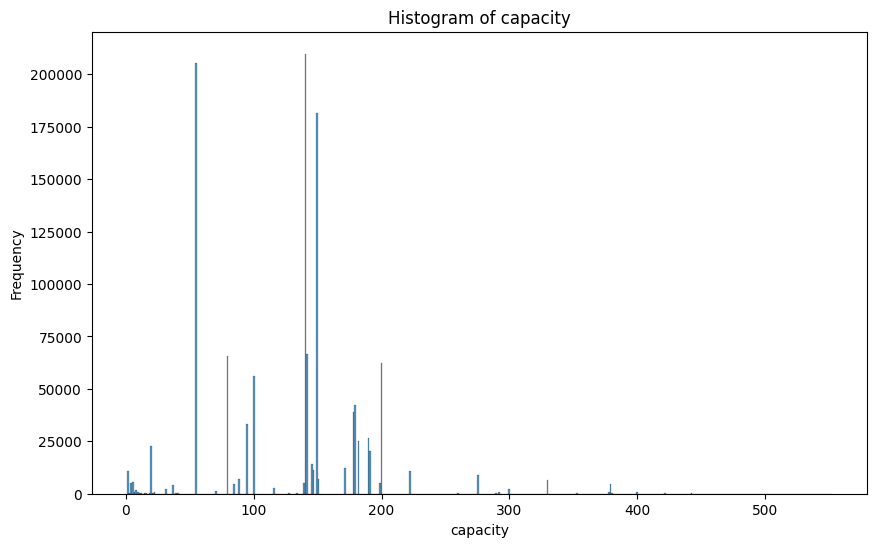

Statistics for loadfactor:
Count Non Nulls: 1201664
Count Unique: 413375
Mean: 0.8
Median: 0.8
Mode: 0.8
Standard Deviation: 0.1
Variance: 0.0
Minimum: 0.0
Maximum: 1.0
Range: 1.0



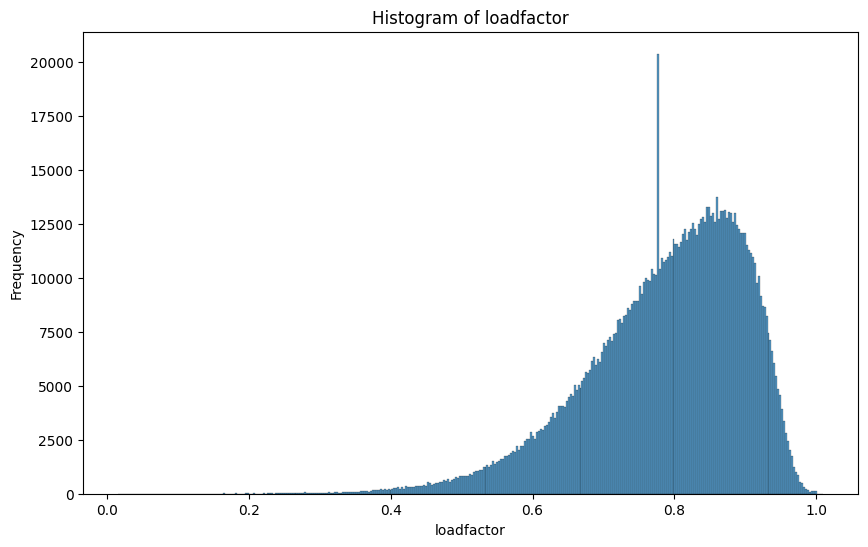

Statistics for numflights:
Count Non Nulls: 1201664
Count Unique: 3682
Mean: 17.5
Median: 17.3
Mode: 16.4
Standard Deviation: 2.1
Variance: 4.2
Minimum: 9.8
Maximum: 21.8
Range: 12.0



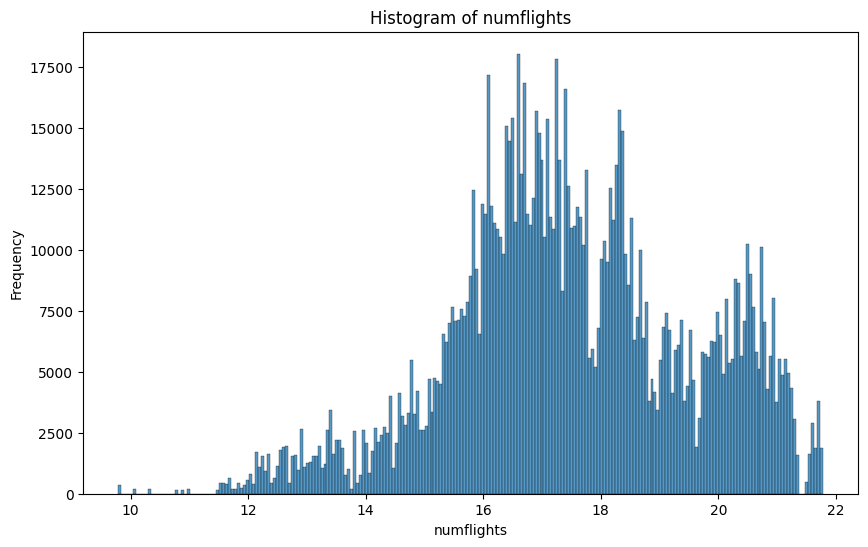

Statistics for distance:
Count Non Nulls: 1201664
Count Unique: 1592
Mean: 774.1
Median: 612.0
Mode: 337.0
Standard Deviation: 565.7
Variance: 319968.4
Minimum: 28.0
Maximum: 4983.0
Range: 4955.0



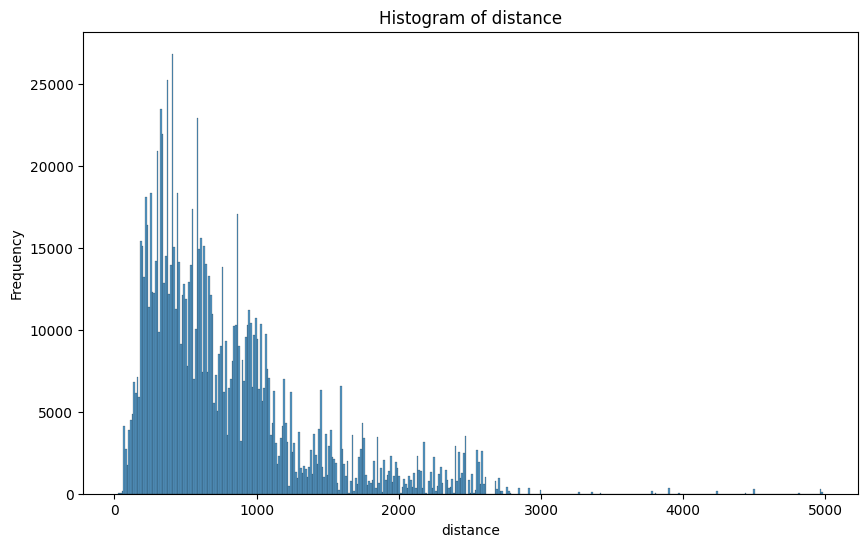

Statistics for monopolyroute:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.4
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



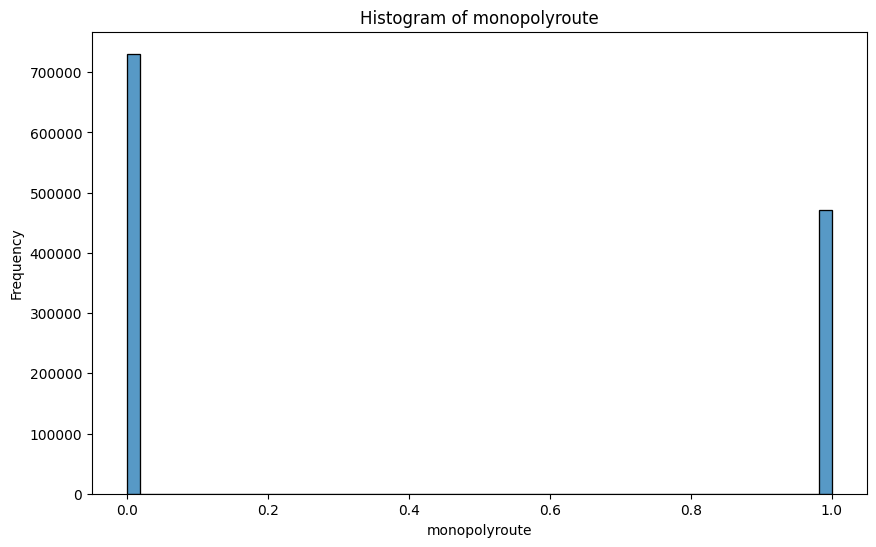

Statistics for temperature:
Count Non Nulls: 1201204
Count Unique: 103118
Mean: 17.2
Median: 18.3
Mode: 15.0
Standard Deviation: 10.5
Variance: 109.4
Minimum: -42.2
Maximum: 47.6
Range: 89.8



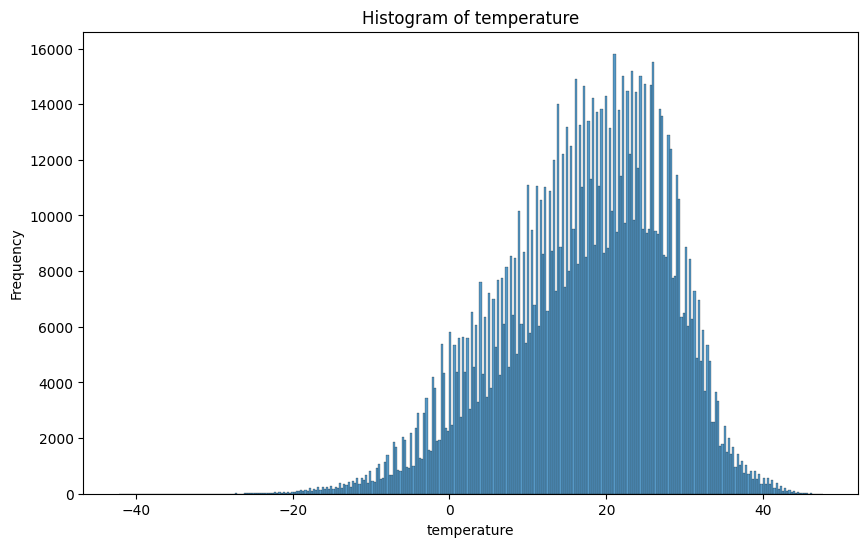

Statistics for temp_ninfty_n10:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.1
Variance: 0.0
Minimum: 0.0
Maximum: 1.0
Range: 1.0



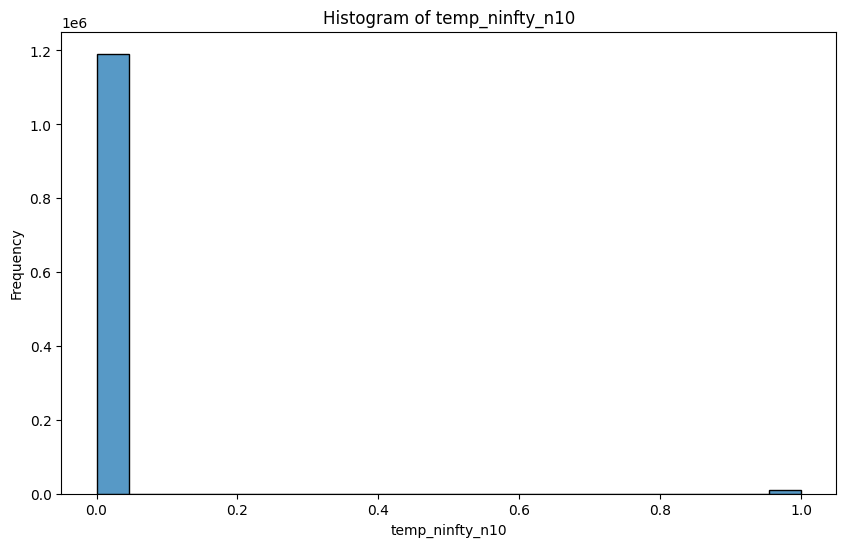

Statistics for temp_n10_0:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.1
Median: 0.0
Mode: 0.0
Standard Deviation: 0.2
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



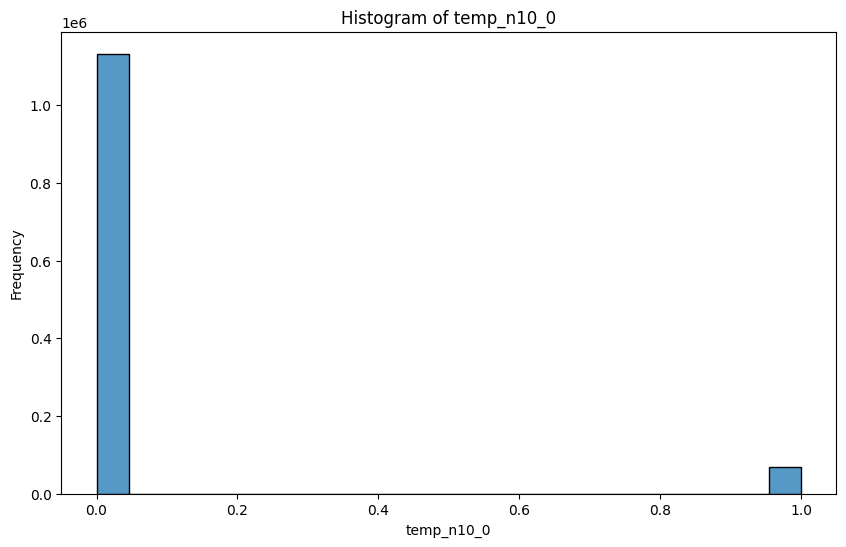

Statistics for temp_0_10:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



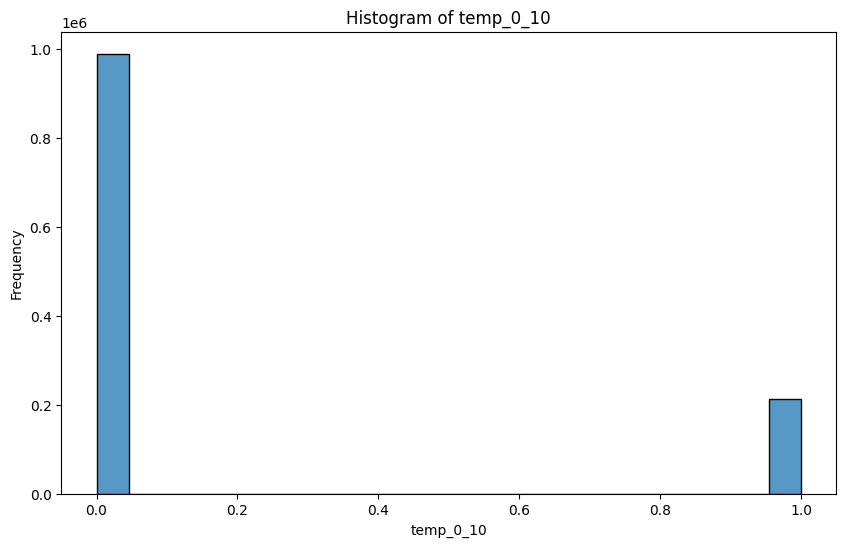

Statistics for temp_10_20:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.3
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



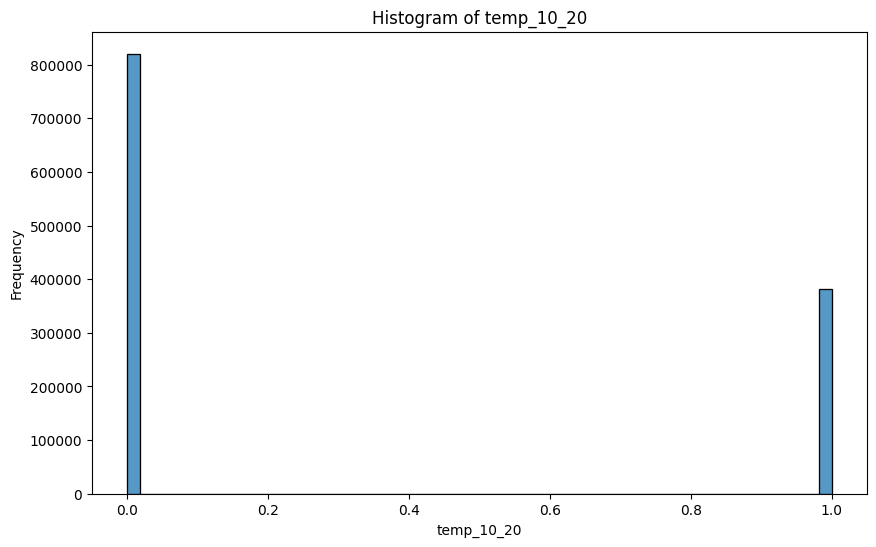

Statistics for temp_20_30:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.3
Median: 0.0
Mode: 0.0
Standard Deviation: 0.5
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



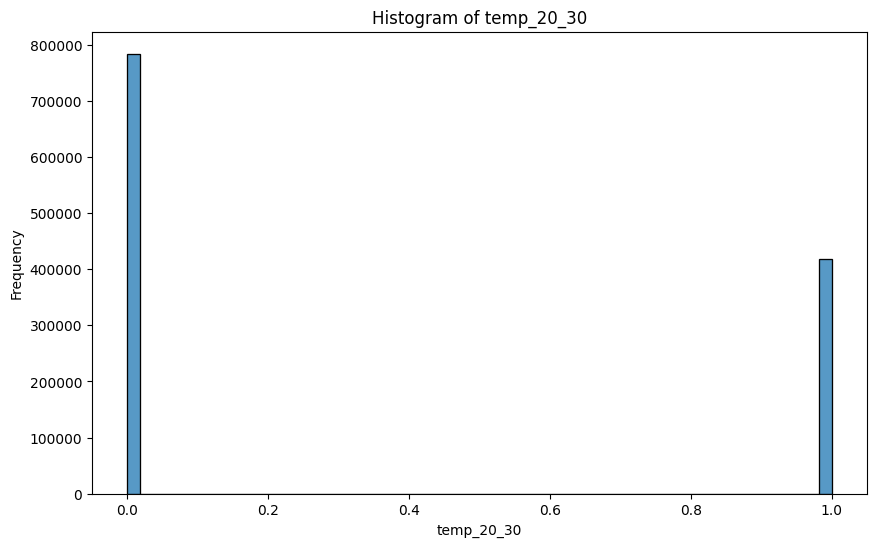

Statistics for temp_30_40:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.1
Median: 0.0
Mode: 0.0
Standard Deviation: 0.3
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



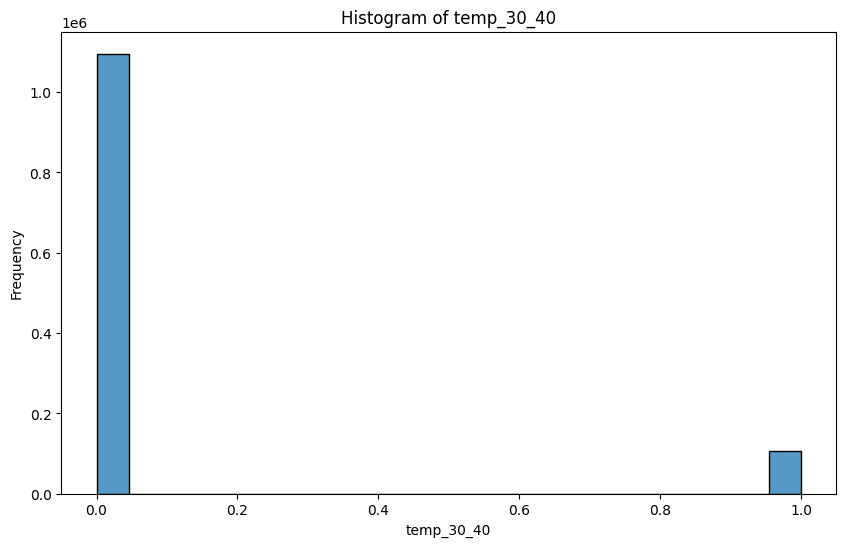

Statistics for temp_40_infty:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.1
Variance: 0.0
Minimum: 0.0
Maximum: 1.0
Range: 1.0



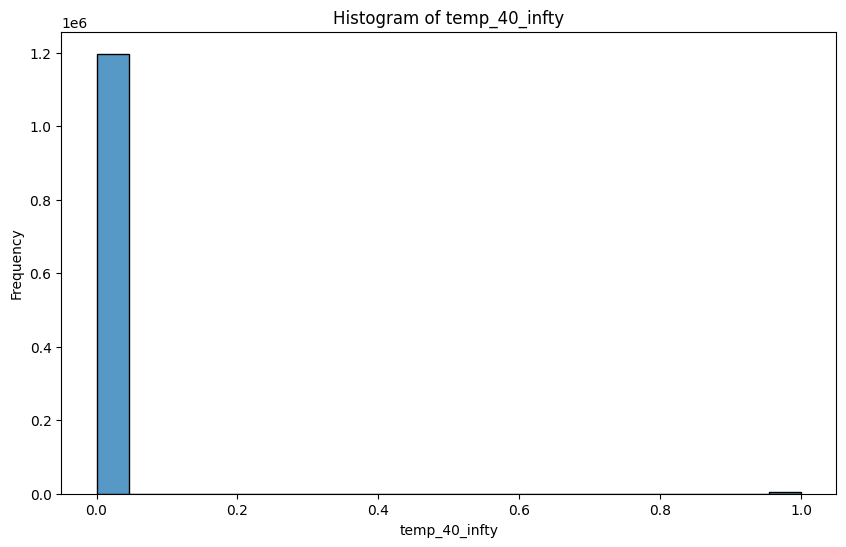

Statistics for windspeed:
Count Non Nulls: 1201204
Count Unique: 21967
Mean: 8.8
Median: 8.0
Mode: 0.0
Standard Deviation: 5.3
Variance: 28.1
Minimum: 0.0
Maximum: 58.7
Range: 58.7



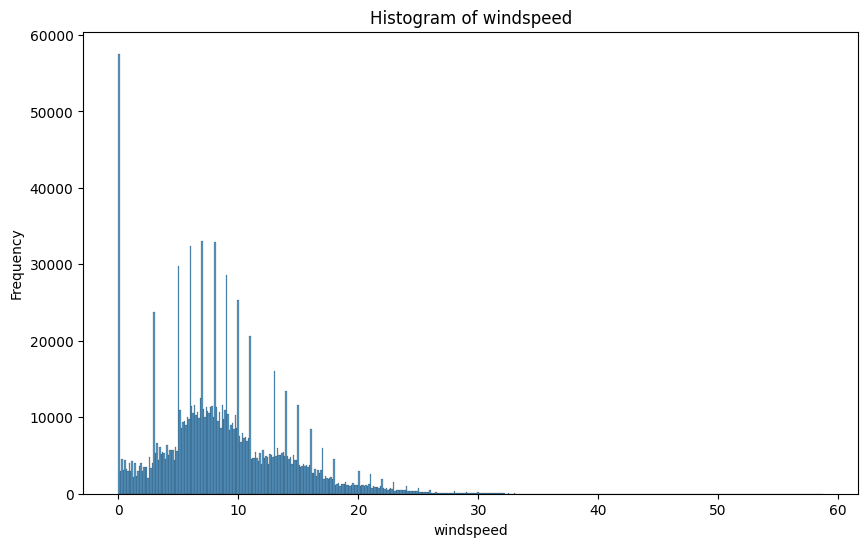

Statistics for windspeedsquare:
Count Non Nulls: 1201204
Count Unique: 22760
Mean: 105.5
Median: 64.5
Mode: 0.0
Standard Deviation: 121.8
Variance: 14844.1
Minimum: 0.0
Maximum: 3449.6
Range: 3449.6



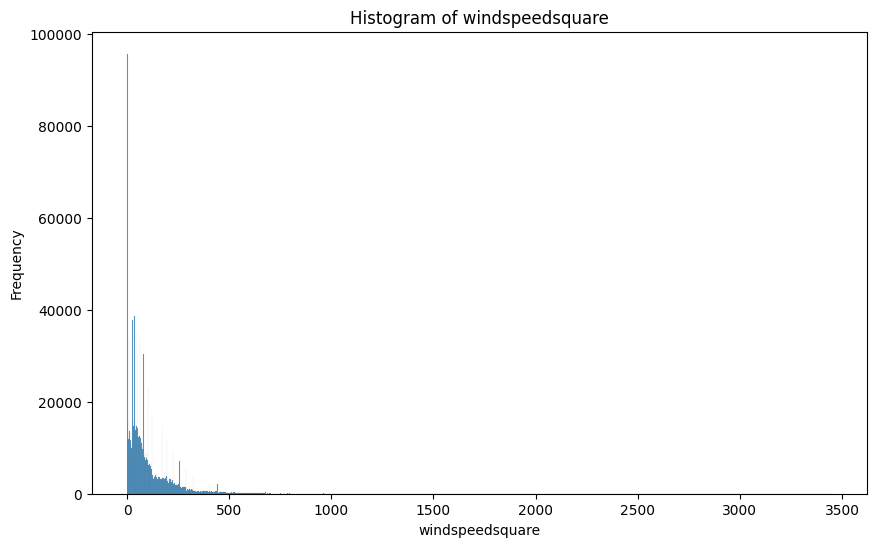

Statistics for windgustdummy:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



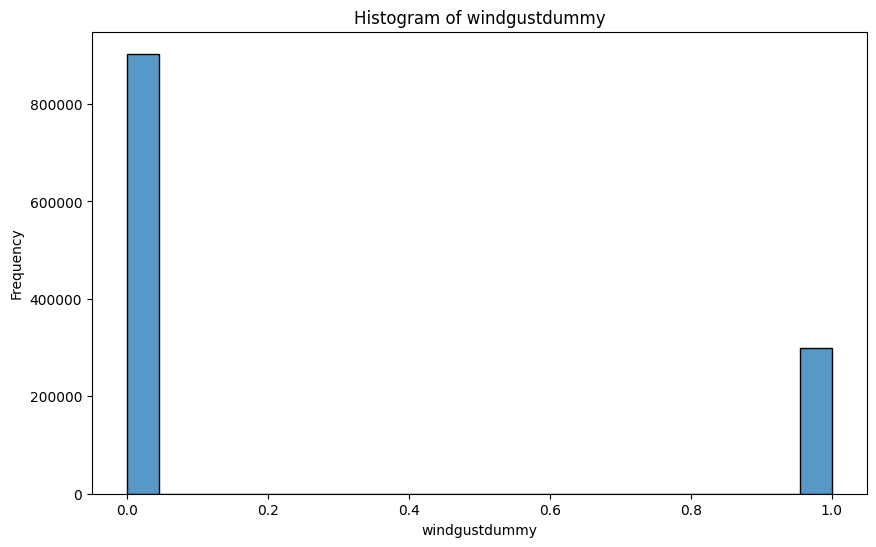

Statistics for windgustspeed:
Count Non Nulls: 1201204
Count Unique: 13148
Mean: 3.1
Median: 0.0
Mode: 0.0
Standard Deviation: 7.8
Variance: 61.5
Minimum: 0.0
Maximum: 74.5
Range: 74.5



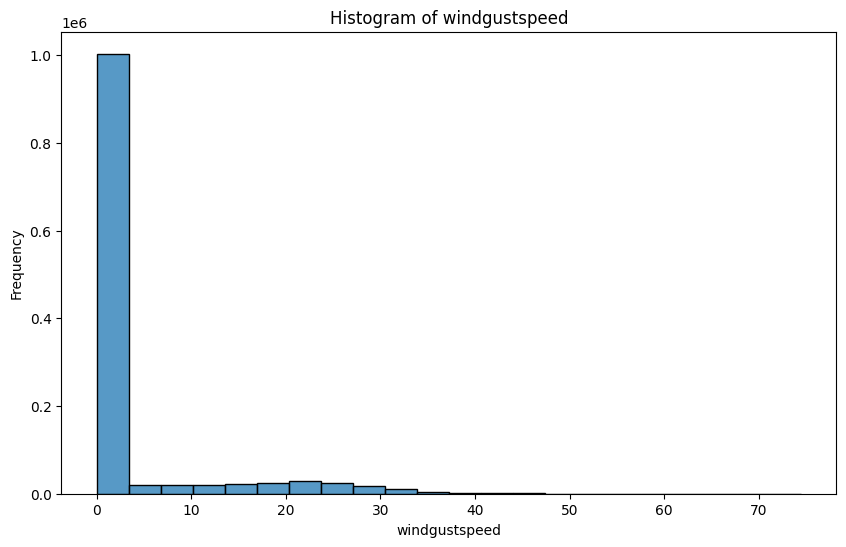

Statistics for raindummy:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.1
Median: 0.0
Mode: 0.0
Standard Deviation: 0.3
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



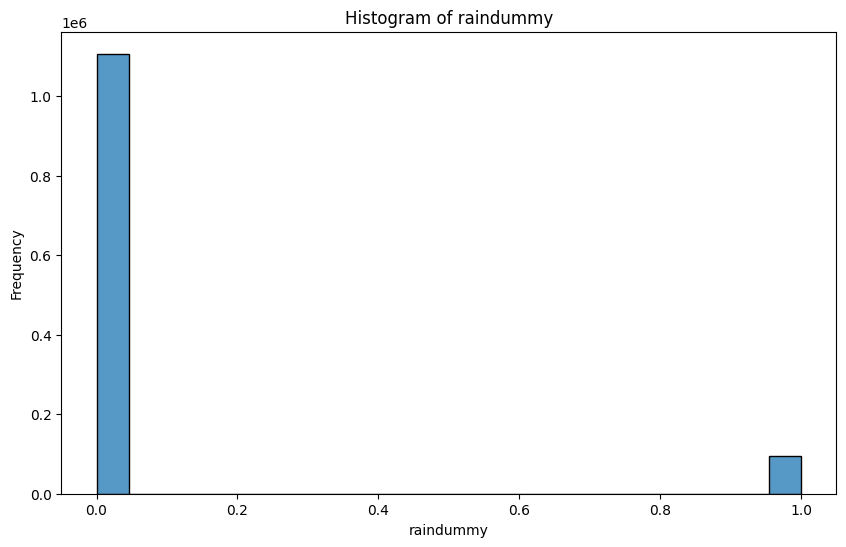

Statistics for raintracedummy:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.1
Median: 0.0
Mode: 0.0
Standard Deviation: 0.2
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



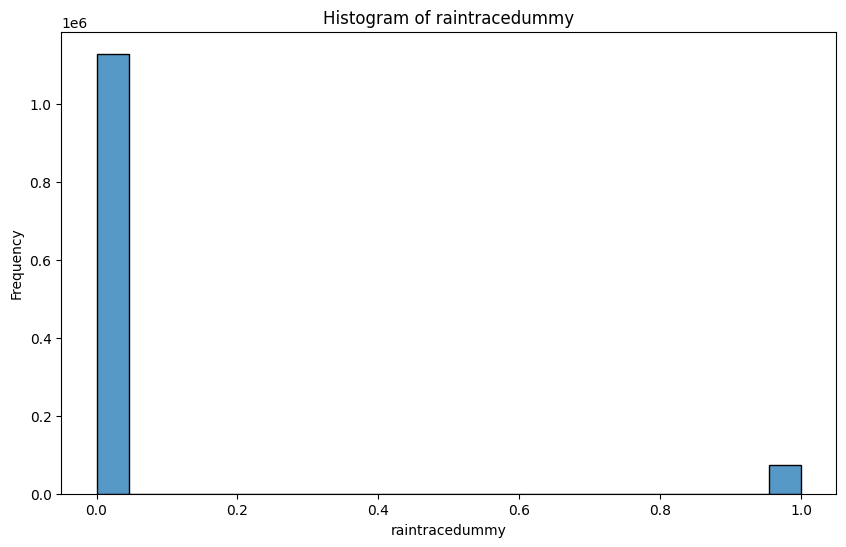

Statistics for snowdummy:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.1
Variance: 0.0
Minimum: 0.0
Maximum: 1.0
Range: 1.0



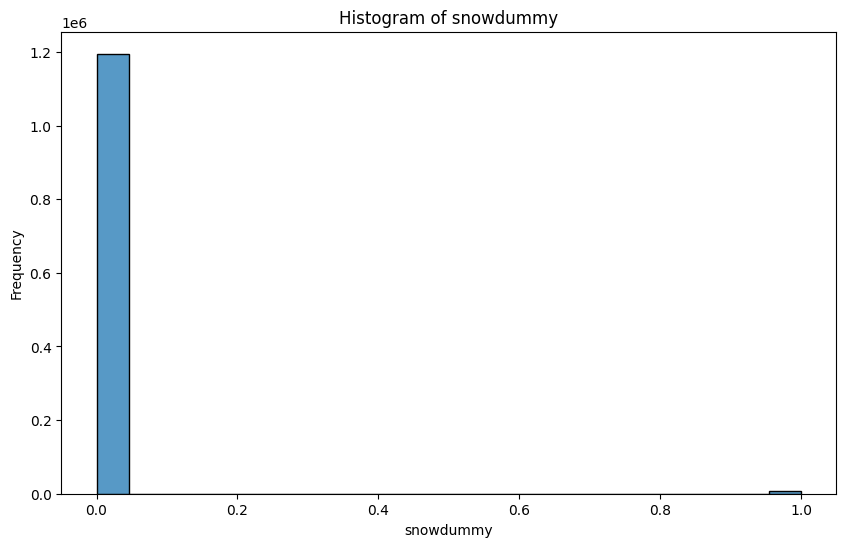

Statistics for snowtracedummy:
Count Non Nulls: 1201664
Count Unique: 2
Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.1
Variance: 0.0
Minimum: 0.0
Maximum: 1.0
Range: 1.0



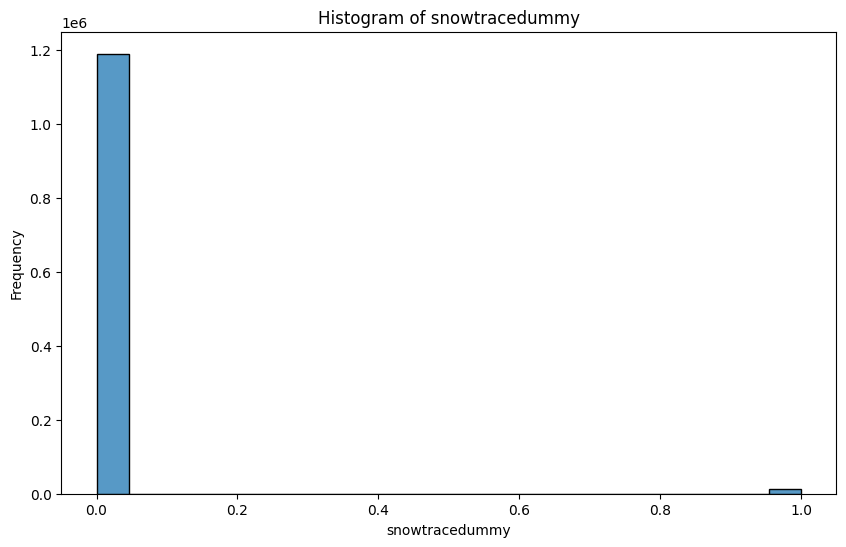

Statistics for originmetropop:
Count Non Nulls: 1201664
Count Unique: 2670
Mean: 4861219.7
Median: 3356637.0
Mode: 5884736.0
Standard Deviation: 4752626.6
Variance: 22587459858693.1
Minimum: 0.0
Maximum: 20320876.0
Range: 20320876.0



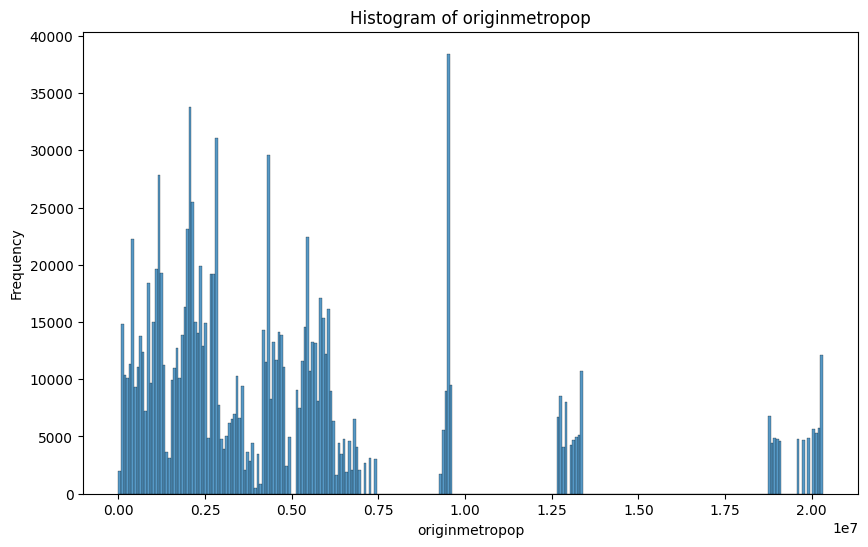

Statistics for originmetrogdppercapita:
Count Non Nulls: 1201664
Count Unique: 2700
Mean: 59155.1
Median: 57826.5
Mode: 65515.6
Standard Deviation: 14426.9
Variance: 208135325.2
Minimum: 17239.8
Maximum: 227924.0
Range: 210684.3



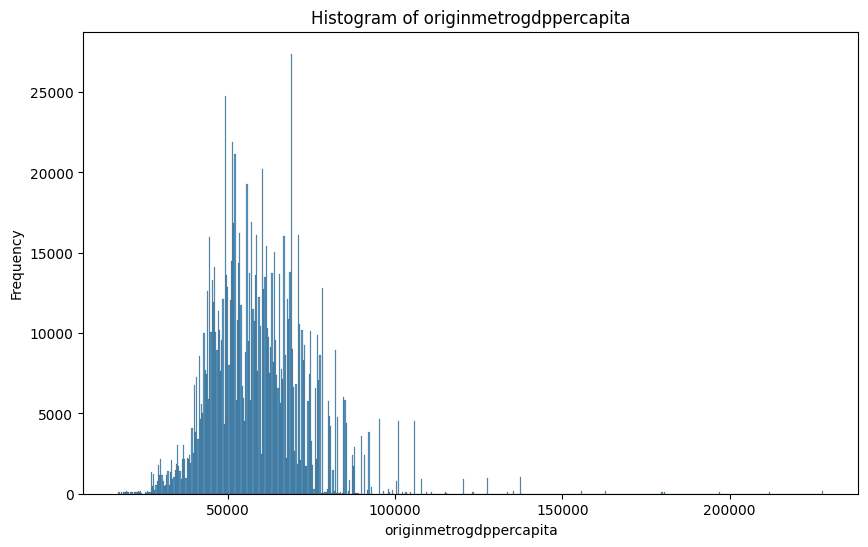

Statistics for destmetropop:
Count Non Nulls: 1201664
Count Unique: 2727
Mean: 4825368.6
Median: 3317200.0
Mode: 5795723.0
Standard Deviation: 4754789.0
Variance: 22608017989883.3
Minimum: 0.0
Maximum: 20320876.0
Range: 20320876.0



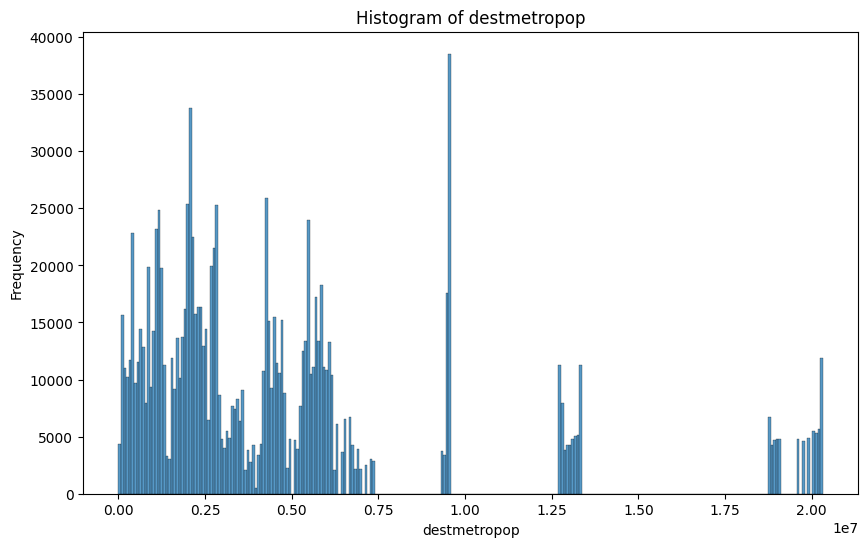

Statistics for destmetrogdppercapita:
Count Non Nulls: 1201664
Count Unique: 2758
Mean: 58897.8
Median: 57661.9
Mode: 63806.7
Standard Deviation: 14608.2
Variance: 213398152.2
Minimum: 0.0
Maximum: 227924.0
Range: 227924.0



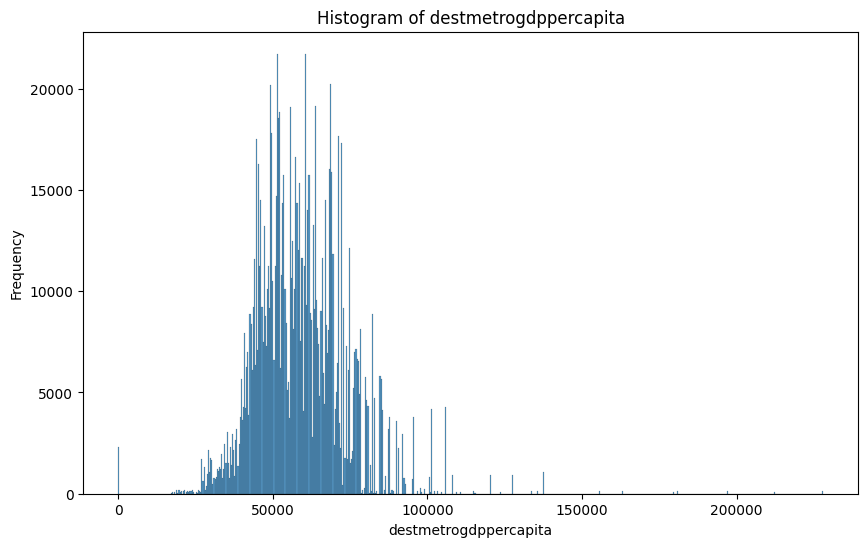

In [9]:
'''FLIGHT DELAY DATASET'''
fname = "delay_data_clean_no_encode.csv"
dataset_name = "delay"
df = pd.read_csv(fname)

n_samples = 1000 # For Swarm Plots
generate_plots(df, sample_amt=n_samples,output_to_pdf=False, kde=False, violins=False, swarms=False, grouped_hists=False, ds_name=dataset_name)

# 3.3 USDOT ONTIME DATASET ANALYSIS

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_27152\27252057.py:4: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fname)


Statistics for year:
Count Non Nulls: 504884
Count Unique: 1
Mean: 2025.0
Median: 2025.0
Mode: 2025.0
Standard Deviation: 0.0
Variance: 0.0
Minimum: 2025.0
Maximum: 2025.0
Range: 0.0



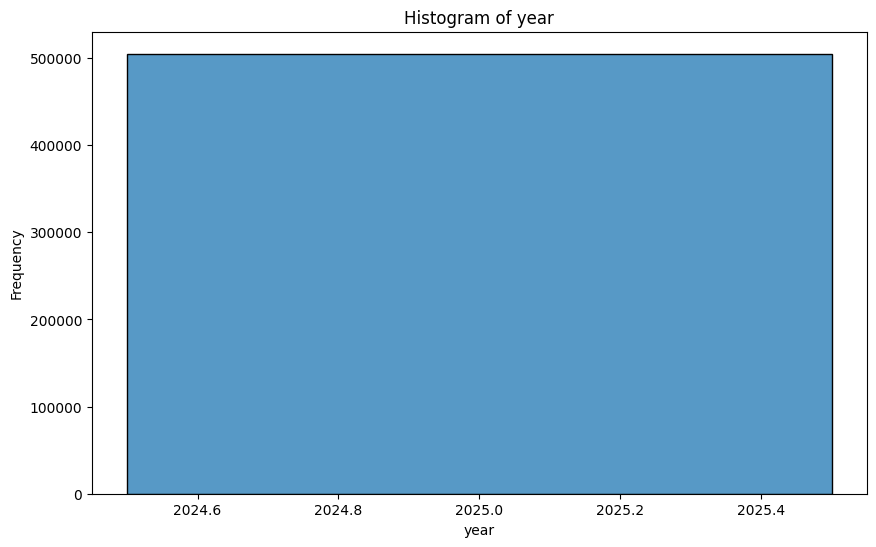

Statistics for quarter:
Count Non Nulls: 504884
Count Unique: 1
Mean: 1.0
Median: 1.0
Mode: 1.0
Standard Deviation: 0.0
Variance: 0.0
Minimum: 1.0
Maximum: 1.0
Range: 0.0



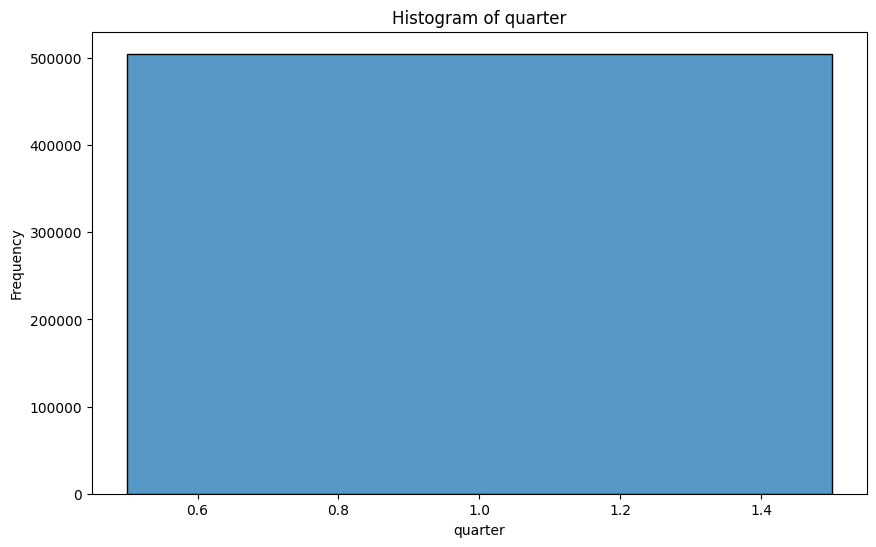

Statistics for month:
Count Non Nulls: 504884
Count Unique: 1
Mean: 2.0
Median: 2.0
Mode: 2.0
Standard Deviation: 0.0
Variance: 0.0
Minimum: 2.0
Maximum: 2.0
Range: 0.0



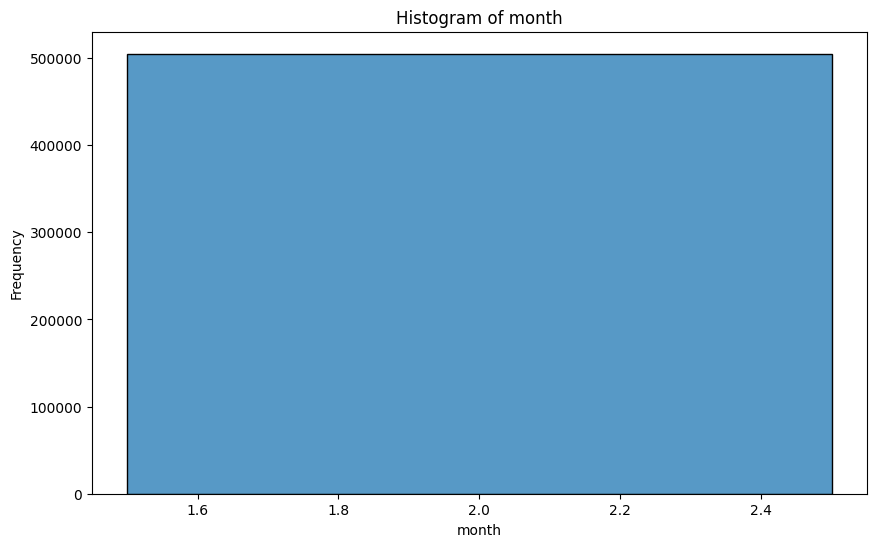

Statistics for day_of_month:
Count Non Nulls: 504884
Count Unique: 28
Mean: 14.8
Median: 15.0
Mode: 14.0
Standard Deviation: 8.0
Variance: 64.7
Minimum: 1.0
Maximum: 28.0
Range: 27.0



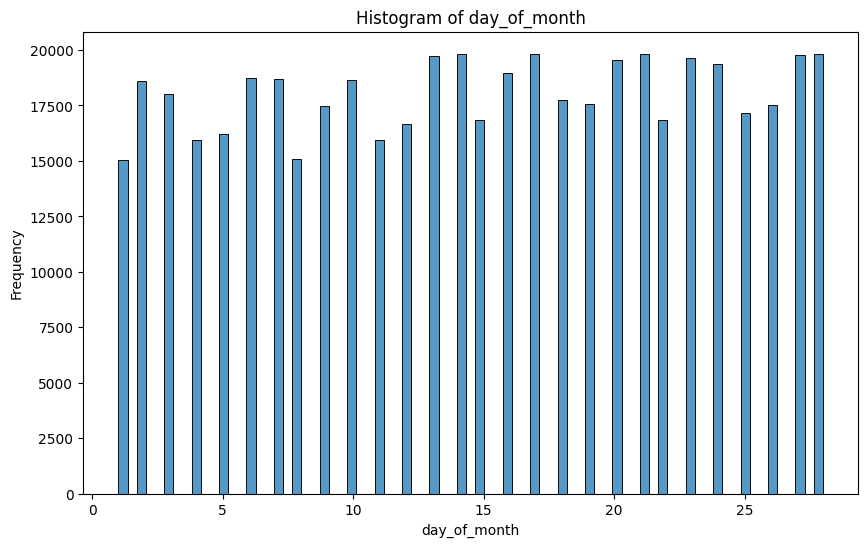

Statistics for day_of_week:
Count Non Nulls: 504884
Count Unique: 7
Mean: 4.0
Median: 4.0
Mode: 5.0
Standard Deviation: 2.0
Variance: 4.0
Minimum: 1.0
Maximum: 7.0
Range: 6.0



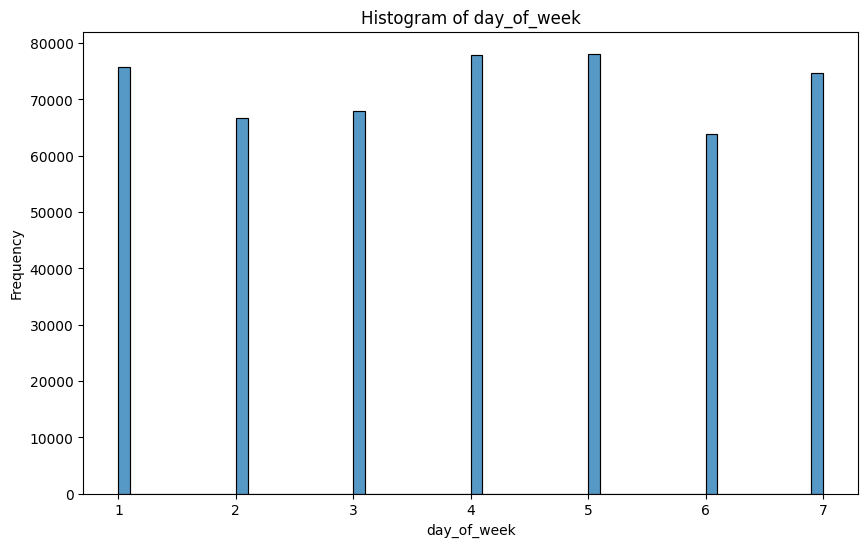

Statistics for op_carrier_airline_id:
Count Non Nulls: 504884
Count Unique: 14
Mean: 19952.1
Median: 19930.0
Mode: 19393.0
Standard Deviation: 370.2
Variance: 137055.7
Minimum: 19393.0
Maximum: 20452.0
Range: 1059.0



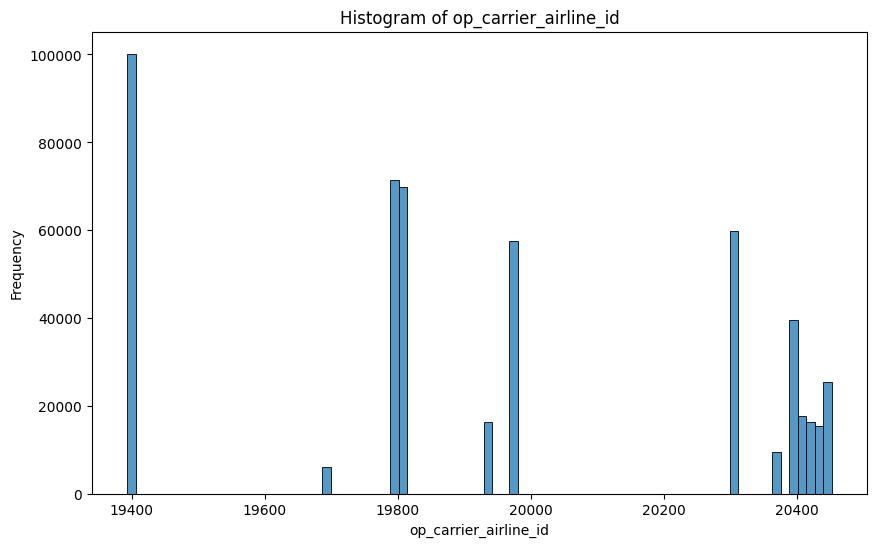

Statistics for op_carrier_fl_num:
Count Non Nulls: 504884
Count Unique: 6340
Mean: 2494.9
Median: 2210.0
Mode: 540.0
Standard Deviation: 1666.2
Variance: 2776190.5
Minimum: 1.0
Maximum: 8818.0
Range: 8817.0



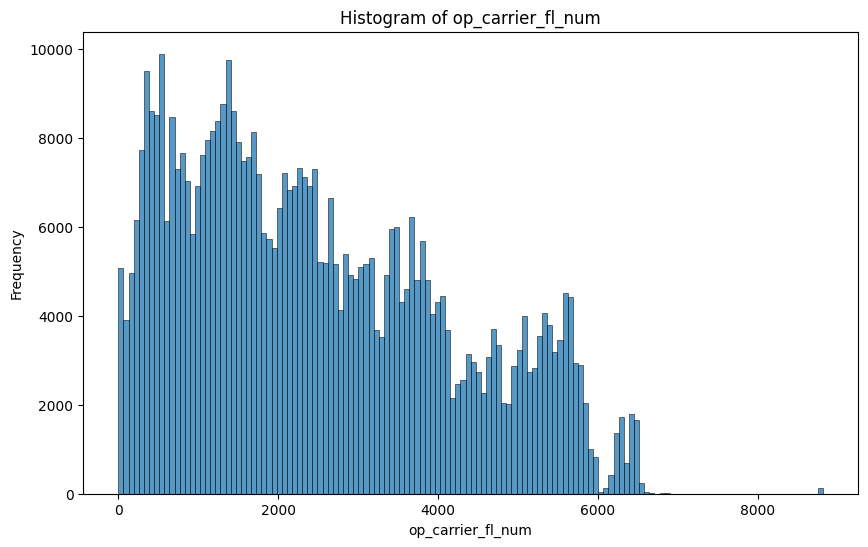

Statistics for origin_airport_id:
Count Non Nulls: 504884
Count Unique: 330
Mean: 12667.9
Median: 12889.0
Mode: 11298.0
Standard Deviation: 1530.3
Variance: 2341857.8
Minimum: 10135.0
Maximum: 16869.0
Range: 6734.0



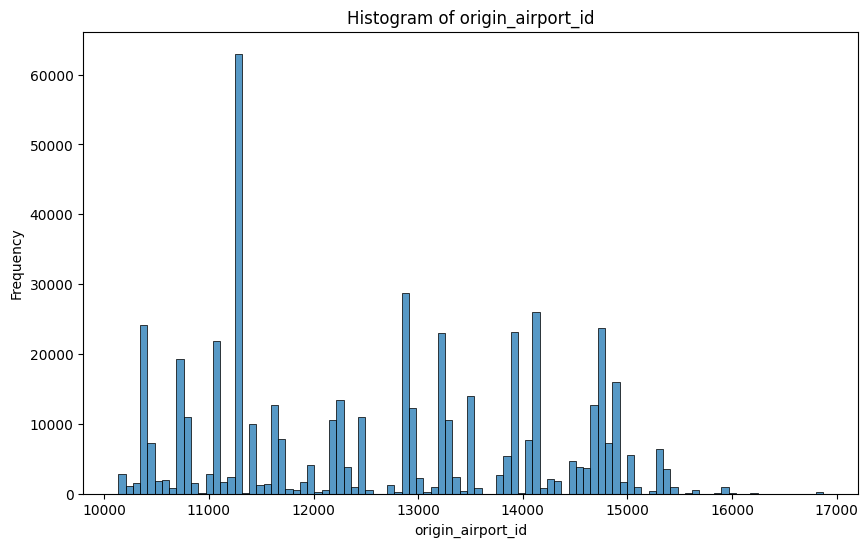

Statistics for origin_airport_seq_id:
Count Non Nulls: 504884
Count Unique: 330
Mean: 1266795.0
Median: 1288904.0
Mode: 1129806.0
Standard Deviation: 153031.1
Variance: 23418520715.3
Minimum: 1013506.0
Maximum: 1686902.0
Range: 673396.0



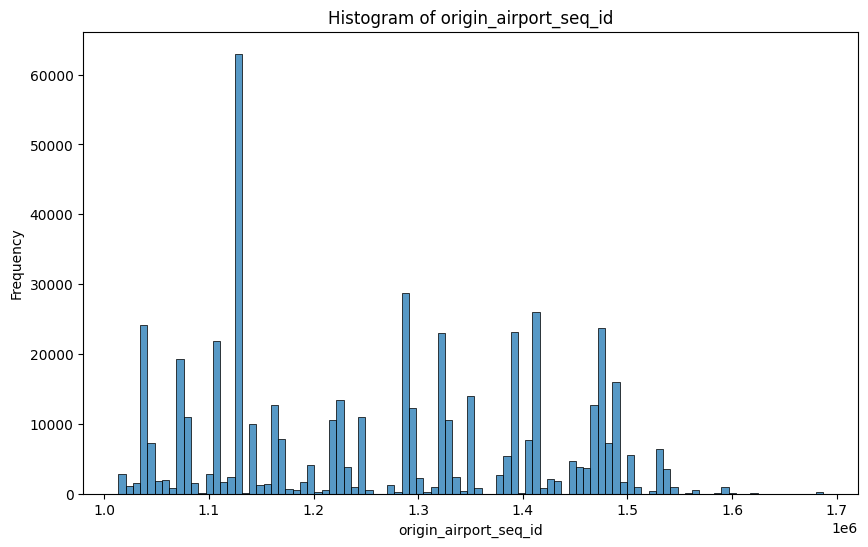

Statistics for origin_city_market_id:
Count Non Nulls: 504884
Count Unique: 307
Mean: 31747.0
Median: 31453.0
Mode: 31703.0
Standard Deviation: 1327.6
Variance: 1762529.9
Minimum: 30070.0
Maximum: 35991.0
Range: 5921.0



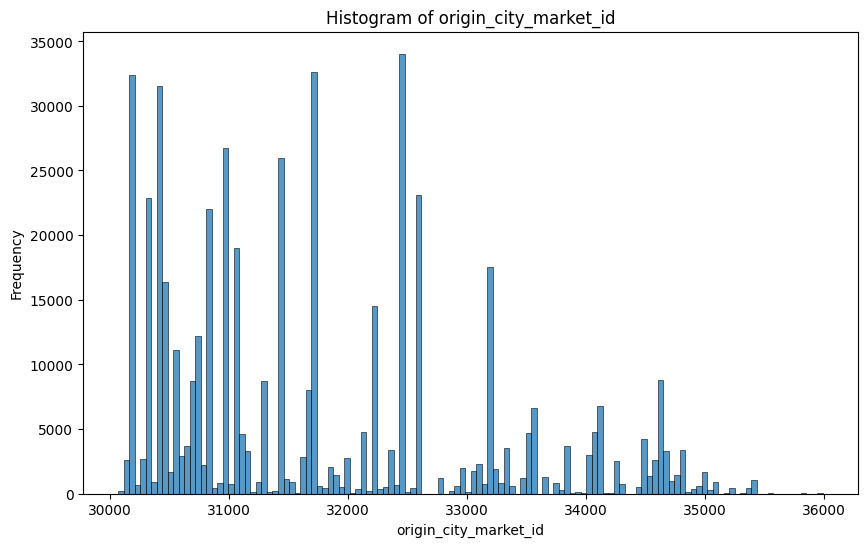

Statistics for origin_state_fips:
Count Non Nulls: 504884
Count Unique: 52
Mean: 26.6
Median: 25.0
Mode: 48.0
Standard Deviation: 16.9
Variance: 284.1
Minimum: 1.0
Maximum: 78.0
Range: 77.0



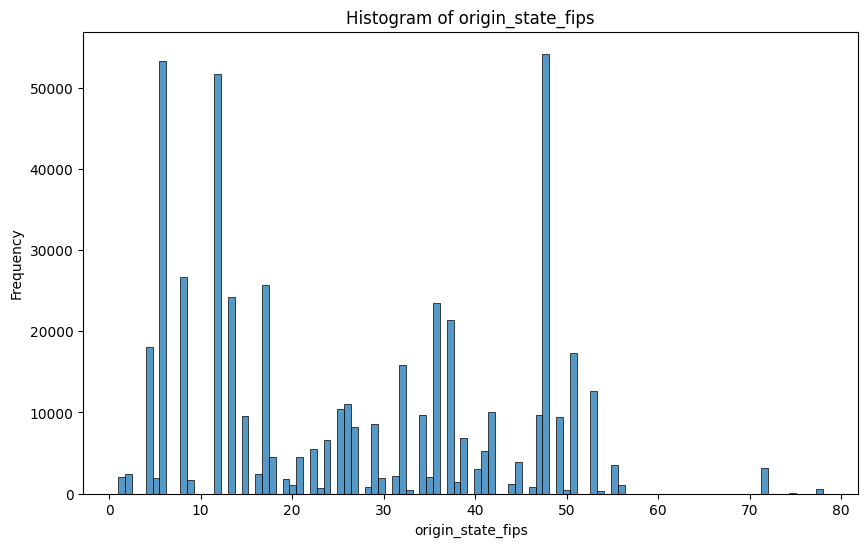

Statistics for origin_wac:
Count Non Nulls: 504884
Count Unique: 52
Mean: 55.1
Median: 51.0
Mode: 74.0
Standard Deviation: 26.7
Variance: 711.3
Minimum: 1.0
Maximum: 93.0
Range: 92.0



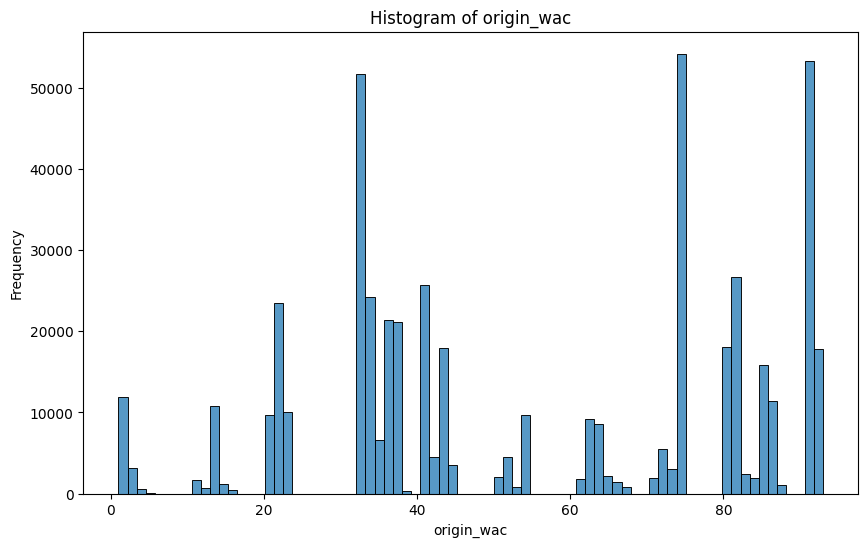

Statistics for dest_airport_id:
Count Non Nulls: 504884
Count Unique: 330
Mean: 12667.9
Median: 12889.0
Mode: 11298.0
Standard Deviation: 1530.4
Variance: 2342054.3
Minimum: 10135.0
Maximum: 16869.0
Range: 6734.0



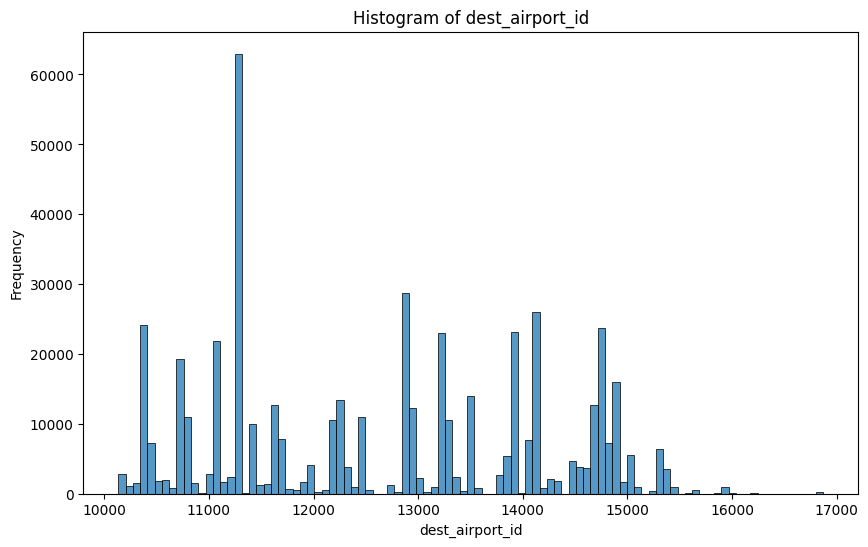

Statistics for dest_airport_seq_id:
Count Non Nulls: 504884
Count Unique: 330
Mean: 1266794.2
Median: 1288904.0
Mode: 1129806.0
Standard Deviation: 153037.5
Variance: 23420485588.5
Minimum: 1013506.0
Maximum: 1686902.0
Range: 673396.0



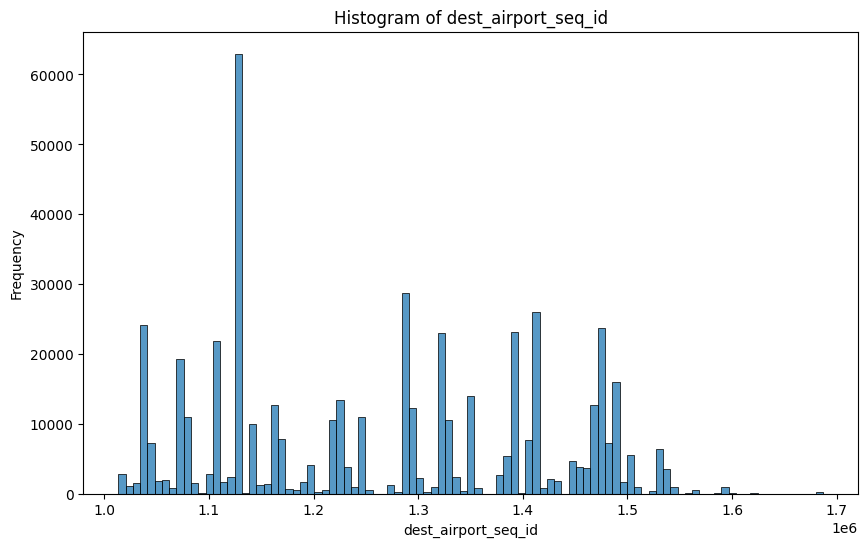

Statistics for dest_city_market_id:
Count Non Nulls: 504884
Count Unique: 307
Mean: 31747.1
Median: 31453.0
Mode: 31703.0
Standard Deviation: 1327.7
Variance: 1762669.2
Minimum: 30070.0
Maximum: 35991.0
Range: 5921.0



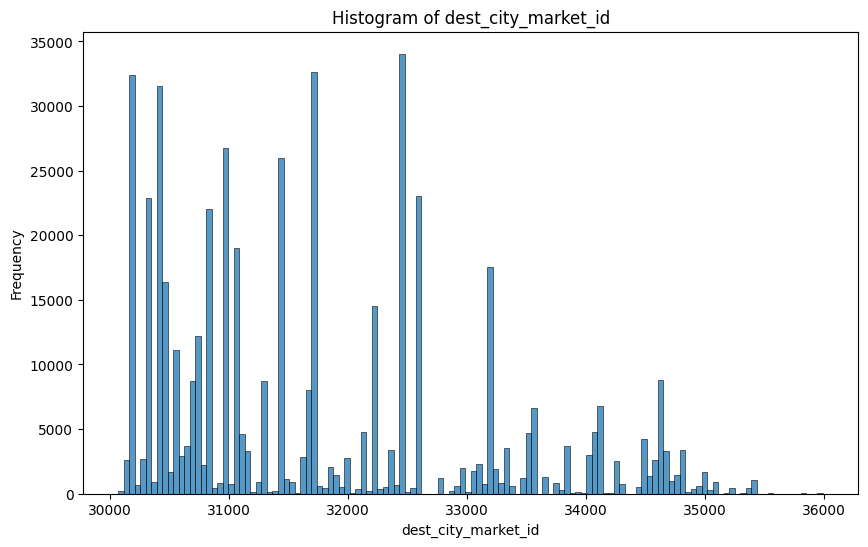

Statistics for dest_state_fips:
Count Non Nulls: 504884
Count Unique: 52
Mean: 26.6
Median: 25.0
Mode: 48.0
Standard Deviation: 16.9
Variance: 284.1
Minimum: 1.0
Maximum: 78.0
Range: 77.0



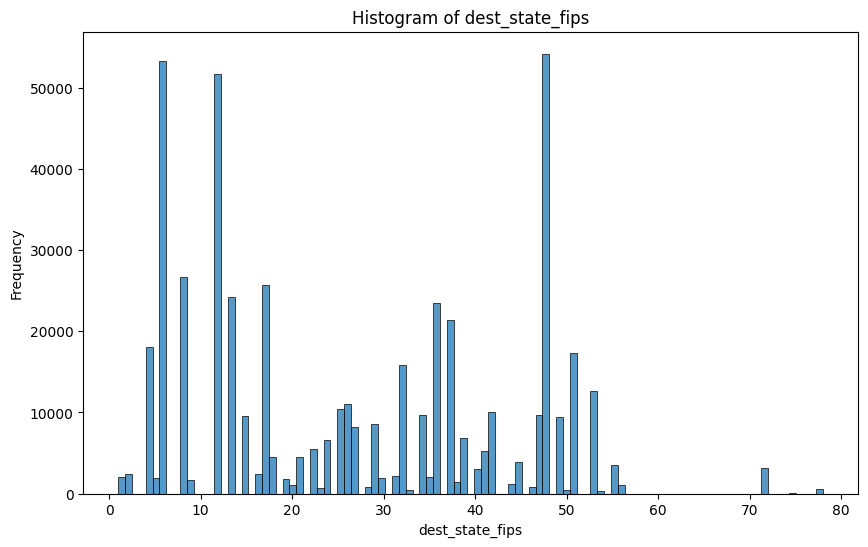

Statistics for dest_wac:
Count Non Nulls: 504884
Count Unique: 52
Mean: 55.1
Median: 51.0
Mode: 74.0
Standard Deviation: 26.7
Variance: 711.4
Minimum: 1.0
Maximum: 93.0
Range: 92.0



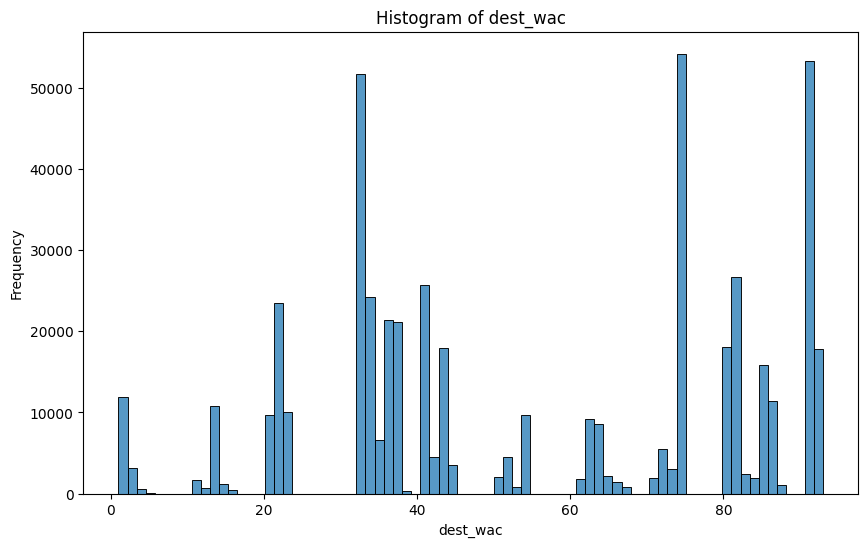

Statistics for crs_dep_time:
Count Non Nulls: 504884
Count Unique: 1195
Mean: 1319.6
Median: 1315.0
Mode: 600.0
Standard Deviation: 484.2
Variance: 234419.7
Minimum: 1.0
Maximum: 2359.0
Range: 2358.0



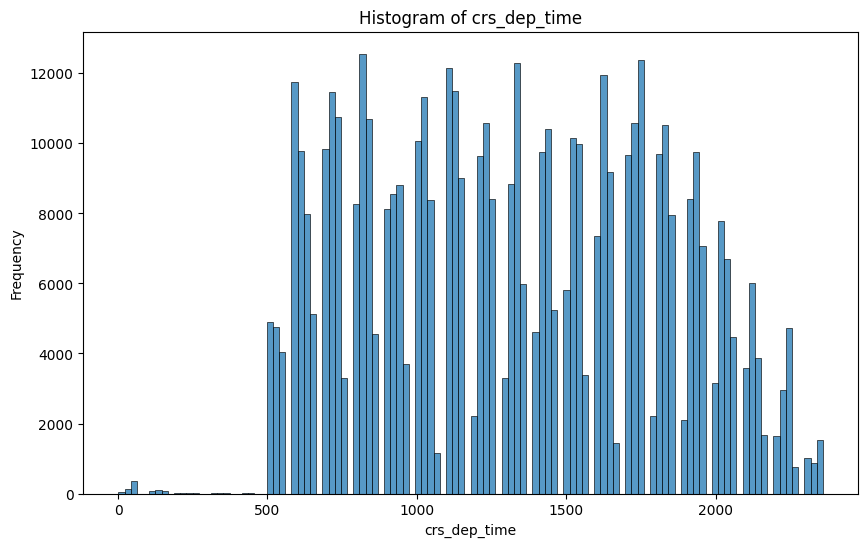

Statistics for dep_time:
Count Non Nulls: 497793
Count Unique: 1386
Mean: 1325.3
Median: 1322.0
Mode: 555.0
Standard Deviation: 498.2
Variance: 248172.0
Minimum: 1.0
Maximum: 2400.0
Range: 2399.0



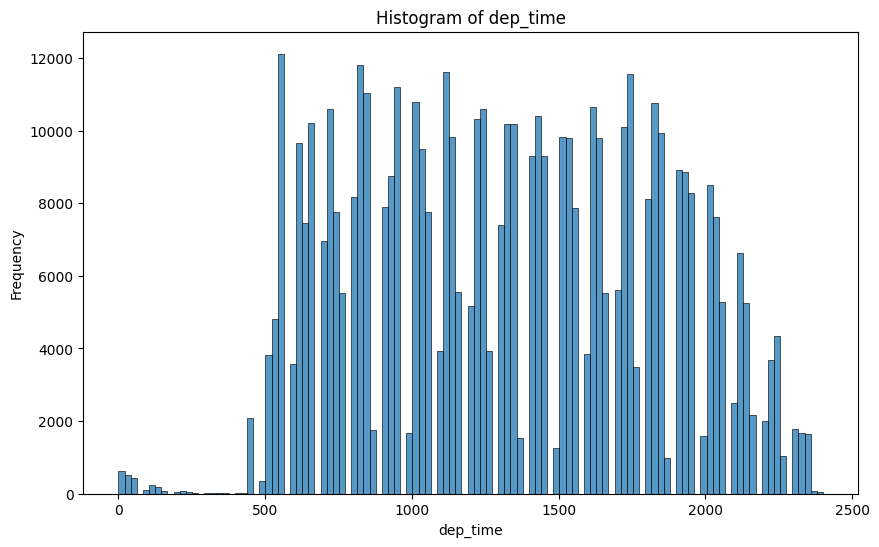

Statistics for dep_delay:
Count Non Nulls: 497745
Count Unique: 1096
Mean: 11.7
Median: -3.0
Mode: -5.0
Standard Deviation: 56.0
Variance: 3138.5
Minimum: -50.0
Maximum: 3403.0
Range: 3453.0



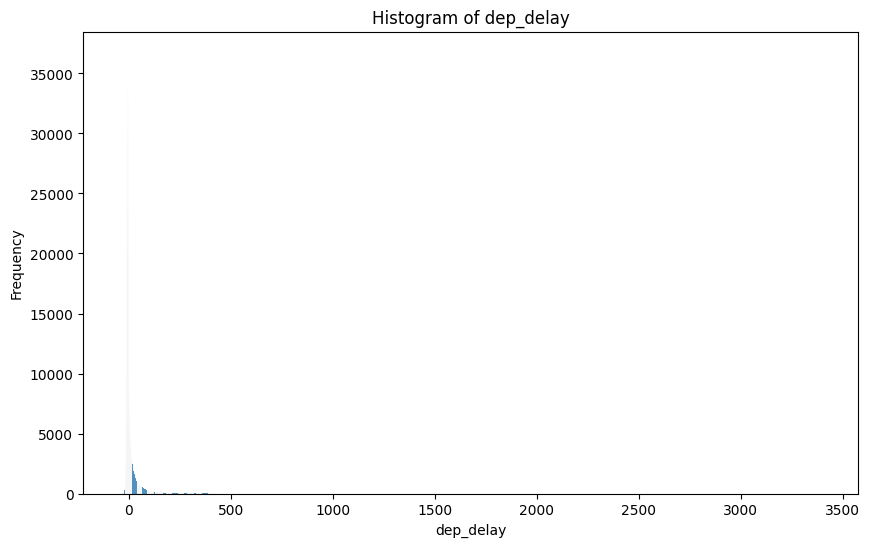

Statistics for dep_delay_new:
Count Non Nulls: 497745
Count Unique: 1055
Mean: 15.4
Median: 0.0
Mode: 0.0
Standard Deviation: 54.9
Variance: 3009.0
Minimum: 0.0
Maximum: 3403.0
Range: 3403.0



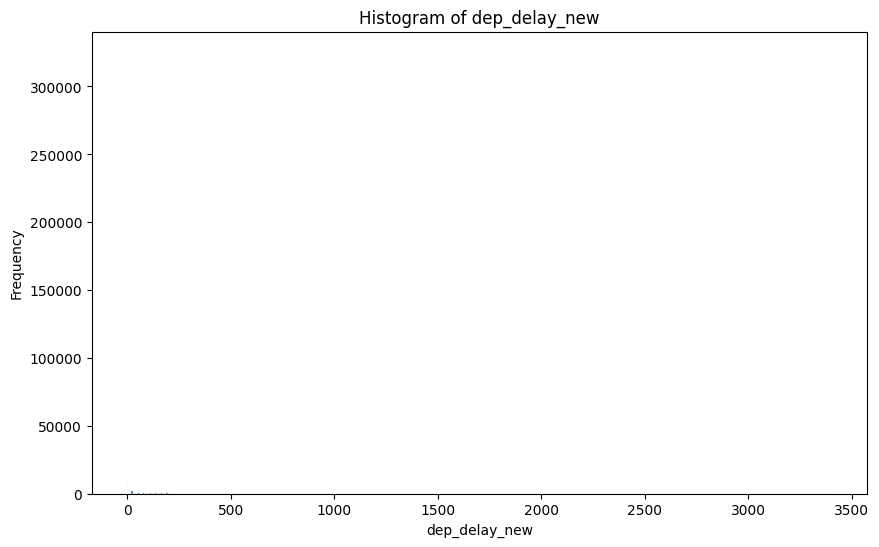

Statistics for dep_del15:
Count Non Nulls: 497745
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



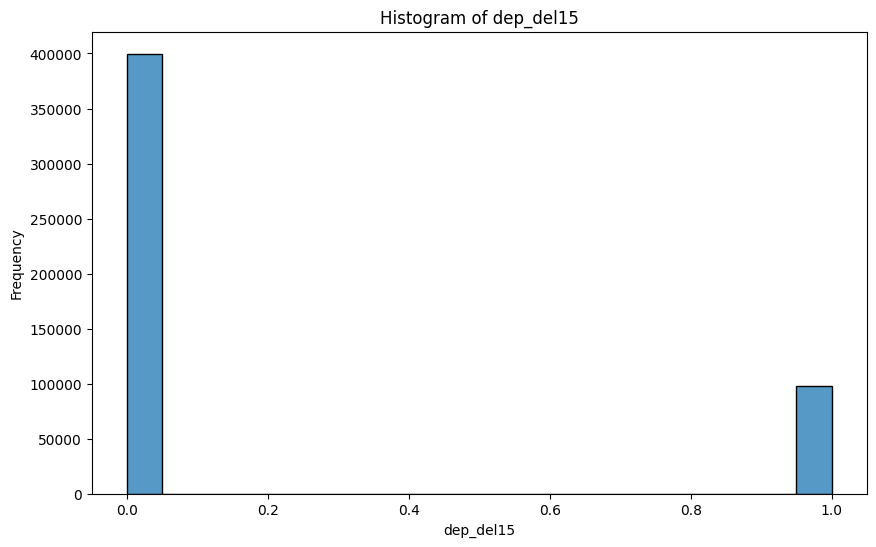

Statistics for dep_delay_group:
Count Non Nulls: 497745
Count Unique: 15
Mean: 0.1
Median: -1.0
Mode: -1.0
Standard Deviation: 2.4
Variance: 5.6
Minimum: -2.0
Maximum: 12.0
Range: 14.0



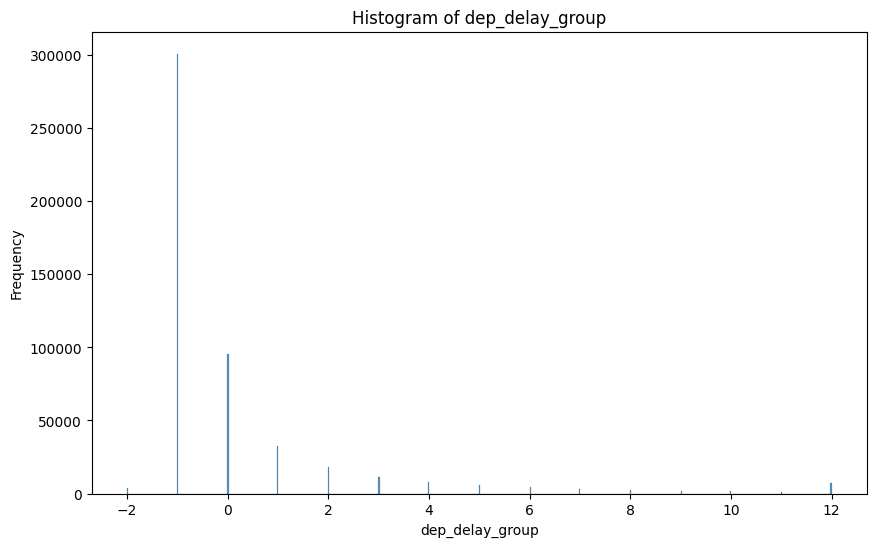

Statistics for taxi_out:
Count Non Nulls: 497569
Count Unique: 171
Mean: 19.2
Median: 16.0
Mode: 13.0
Standard Deviation: 11.5
Variance: 132.0
Minimum: 1.0
Maximum: 291.0
Range: 290.0



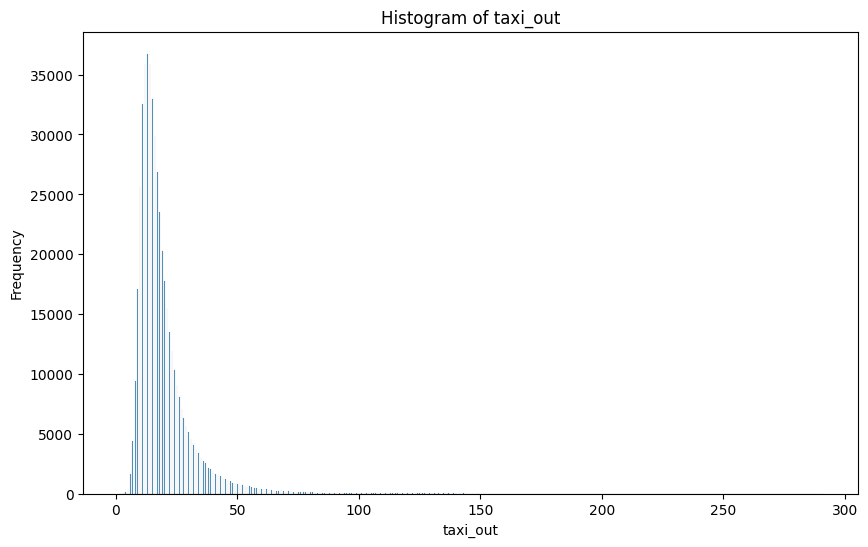

Statistics for wheels_off:
Count Non Nulls: 497569
Count Unique: 1401
Mean: 1351.1
Median: 1337.0
Mode: 609.0
Standard Deviation: 499.4
Variance: 249388.6
Minimum: 1.0
Maximum: 2400.0
Range: 2399.0



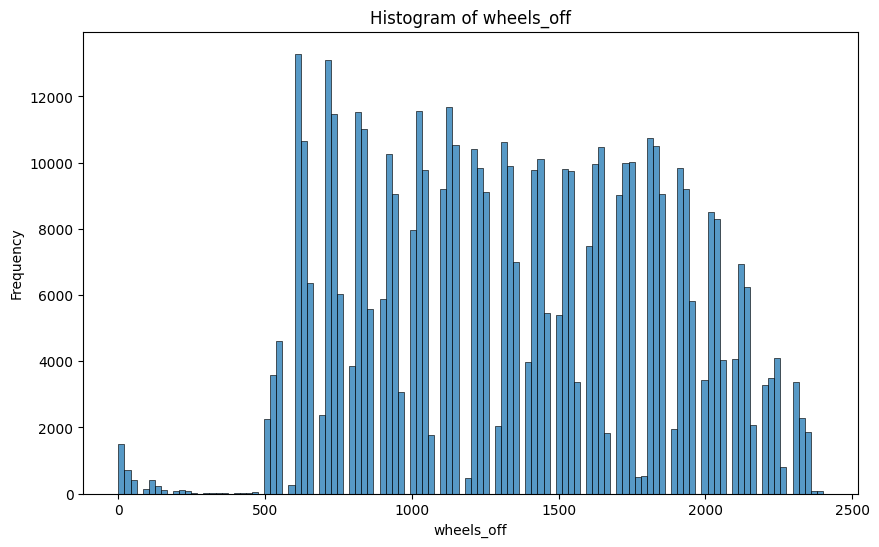

Statistics for wheels_on:
Count Non Nulls: 497343
Count Unique: 1440
Mean: 1472.3
Median: 1509.0
Mode: 1638.0
Standard Deviation: 526.6
Variance: 277314.0
Minimum: 1.0
Maximum: 2400.0
Range: 2399.0



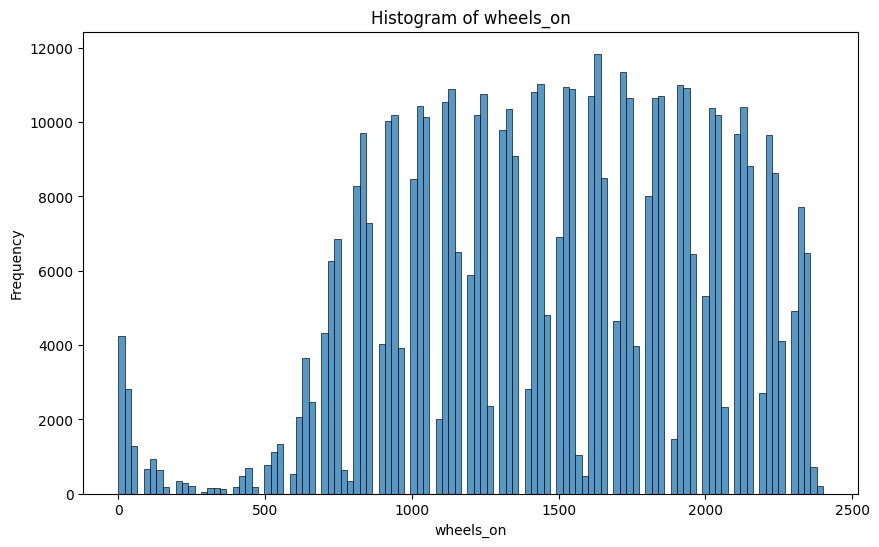

Statistics for taxi_in:
Count Non Nulls: 497343
Count Unique: 144
Mean: 8.3
Median: 6.0
Mode: 4.0
Standard Deviation: 6.6
Variance: 43.2
Minimum: 1.0
Maximum: 293.0
Range: 292.0



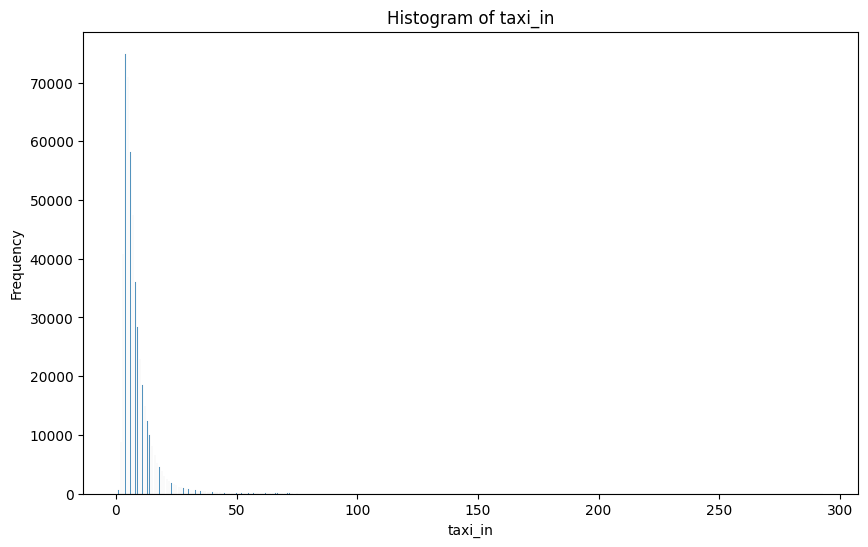

Statistics for crs_arr_time:
Count Non Nulls: 504884
Count Unique: 1314
Mean: 1503.1
Median: 1525.0
Mode: 2359.0
Standard Deviation: 507.9
Variance: 257973.9
Minimum: 1.0
Maximum: 2359.0
Range: 2358.0



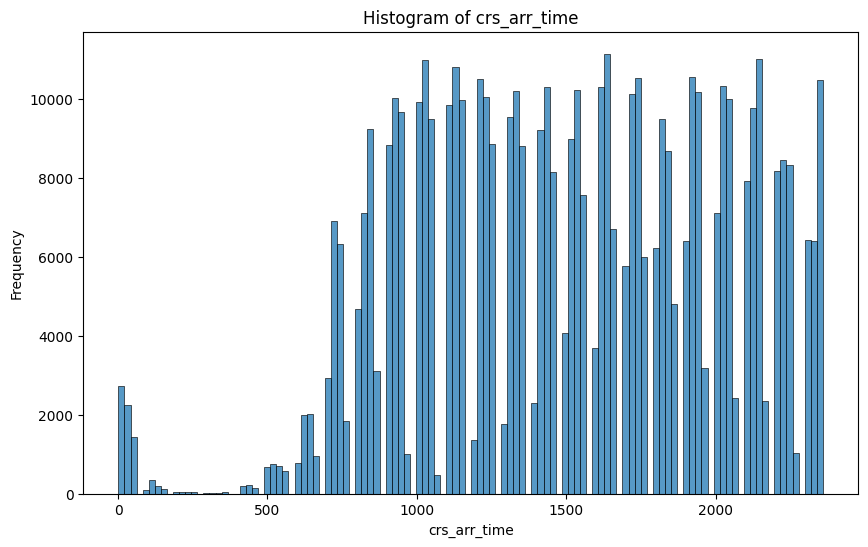

Statistics for arr_time:
Count Non Nulls: 497343
Count Unique: 1440
Mean: 1477.0
Median: 1513.0
Mode: 1638.0
Standard Deviation: 531.5
Variance: 282463.5
Minimum: 1.0
Maximum: 2400.0
Range: 2399.0



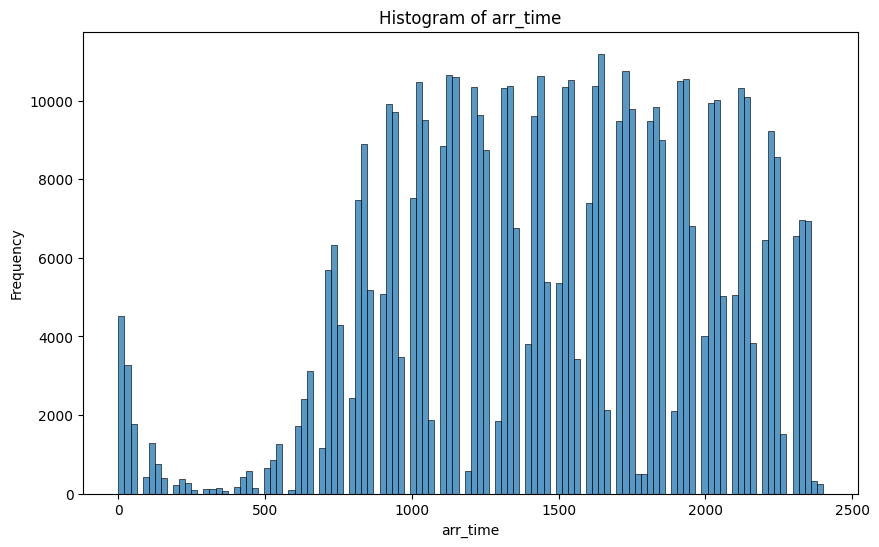

Statistics for arr_delay:
Count Non Nulls: 496476
Count Unique: 1136
Mean: 5.7
Median: -7.0
Mode: -13.0
Standard Deviation: 58.8
Variance: 3460.8
Minimum: -91.0
Maximum: 3407.0
Range: 3498.0



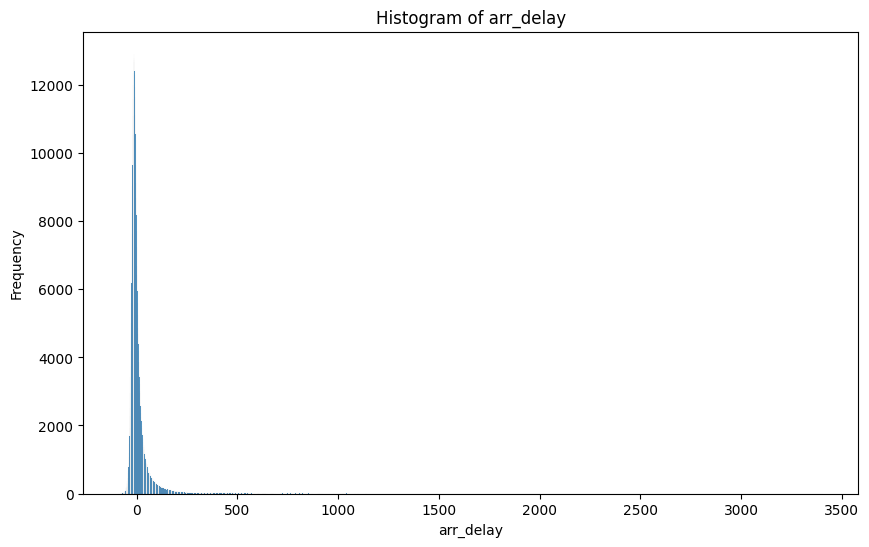

Statistics for arr_delay_new:
Count Non Nulls: 496476
Count Unique: 1051
Mean: 15.9
Median: 0.0
Mode: 0.0
Standard Deviation: 55.0
Variance: 3019.8
Minimum: 0.0
Maximum: 3407.0
Range: 3407.0



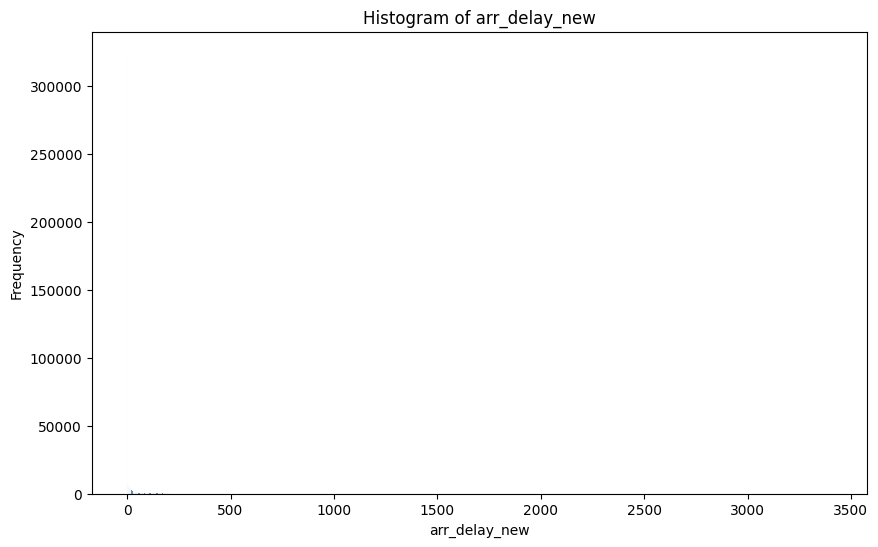

Statistics for arr_del15:
Count Non Nulls: 496476
Count Unique: 2
Mean: 0.2
Median: 0.0
Mode: 0.0
Standard Deviation: 0.4
Variance: 0.2
Minimum: 0.0
Maximum: 1.0
Range: 1.0



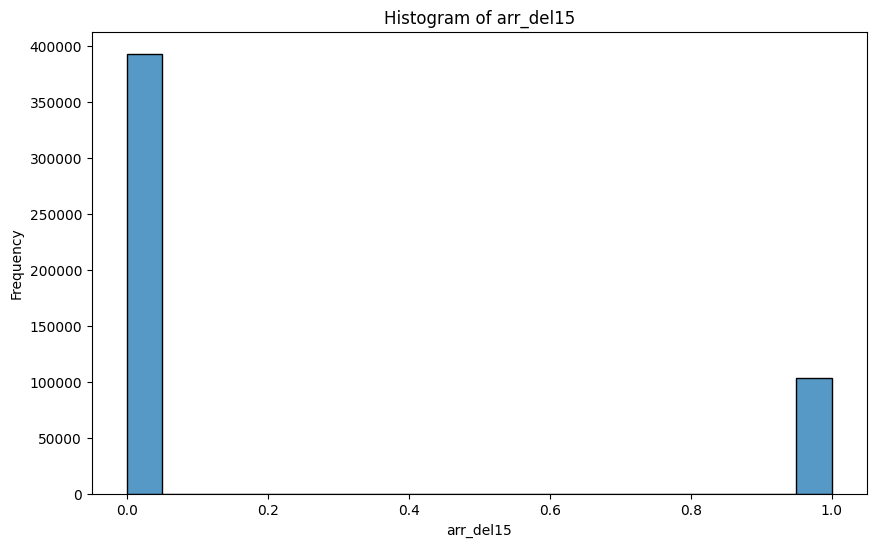

Statistics for arr_delay_group:
Count Non Nulls: 496476
Count Unique: 15
Mean: -0.2
Median: -1.0
Mode: -1.0
Standard Deviation: 2.6
Variance: 6.6
Minimum: -2.0
Maximum: 12.0
Range: 14.0



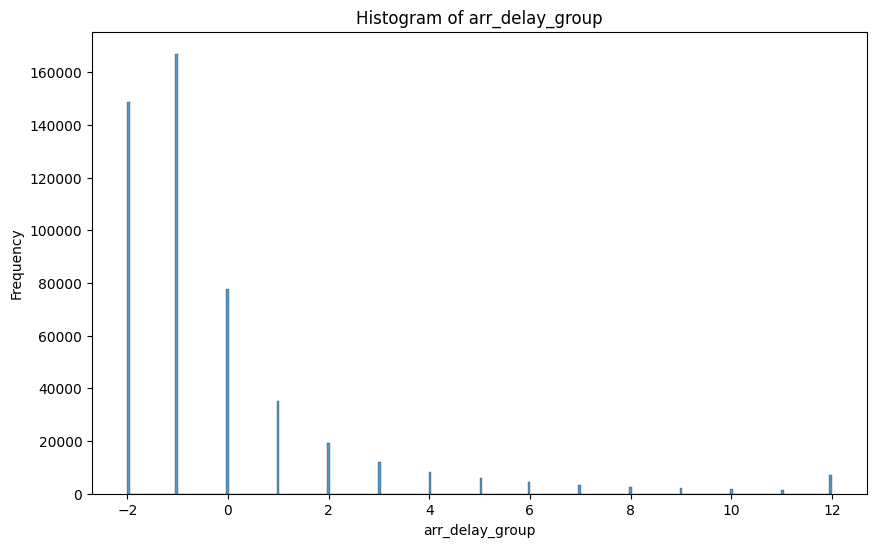

Statistics for cancelled:
Count Non Nulls: 504884
Count Unique: 2
Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.1
Variance: 0.0
Minimum: 0.0
Maximum: 1.0
Range: 1.0



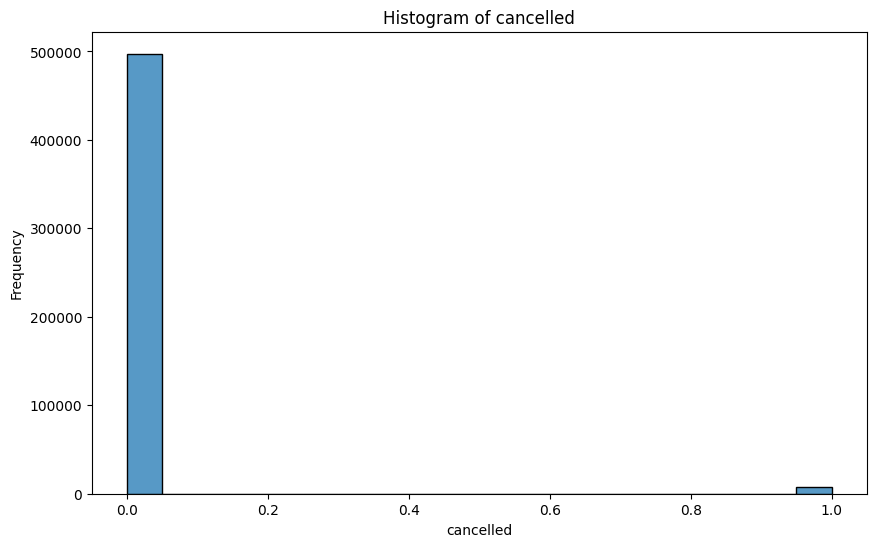

Statistics for diverted:
Count Non Nulls: 504884
Count Unique: 2
Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.0
Variance: 0.0
Minimum: 0.0
Maximum: 1.0
Range: 1.0



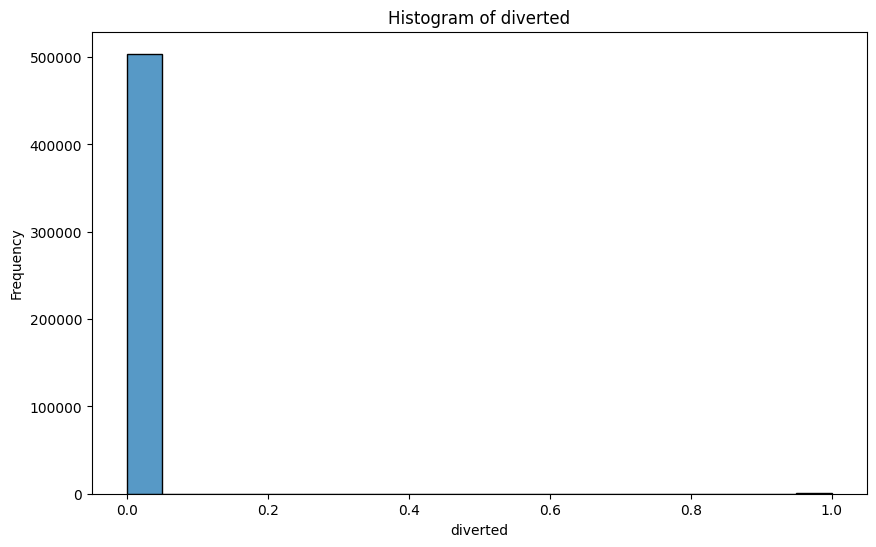

Statistics for crs_elapsed_time:
Count Non Nulls: 504884
Count Unique: 464
Mean: 150.7
Median: 135.0
Mode: 90.0
Standard Deviation: 73.6
Variance: 5413.8
Minimum: 9.0
Maximum: 1358.0
Range: 1349.0



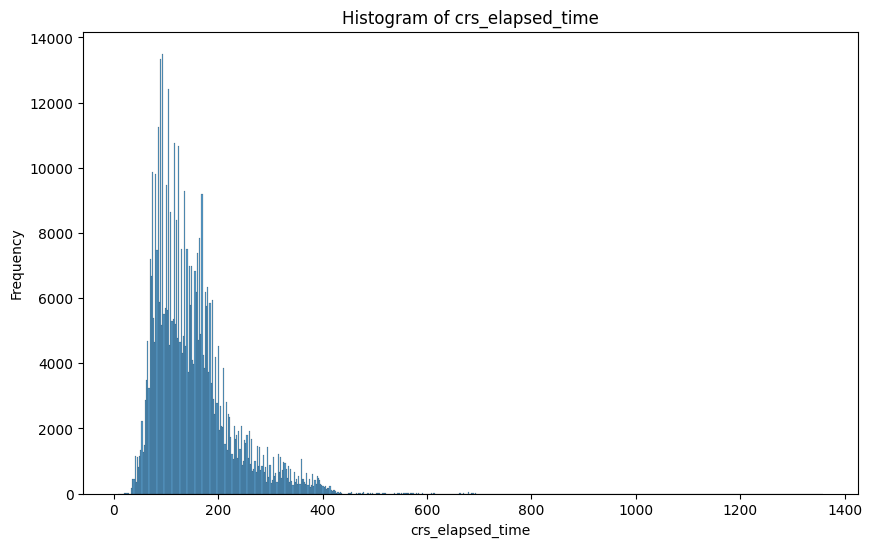

Statistics for actual_elapsed_time:
Count Non Nulls: 496476
Count Unique: 671
Mean: 145.1
Median: 130.0
Mode: 80.0
Standard Deviation: 73.7
Variance: 5432.2
Minimum: 17.0
Maximum: 761.0
Range: 744.0



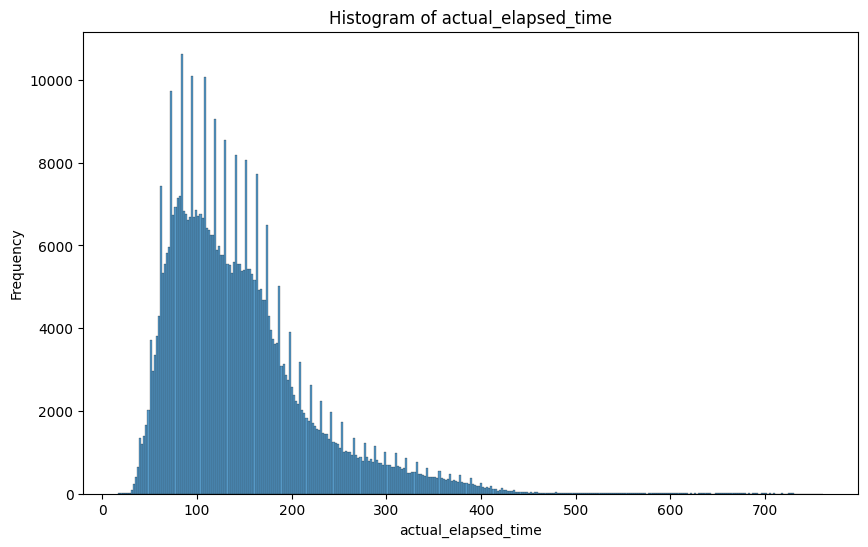

Statistics for air_time:
Count Non Nulls: 496476
Count Unique: 647
Mean: 117.6
Median: 102.0
Mode: 61.0
Standard Deviation: 71.7
Variance: 5142.1
Minimum: 8.0
Maximum: 715.0
Range: 707.0



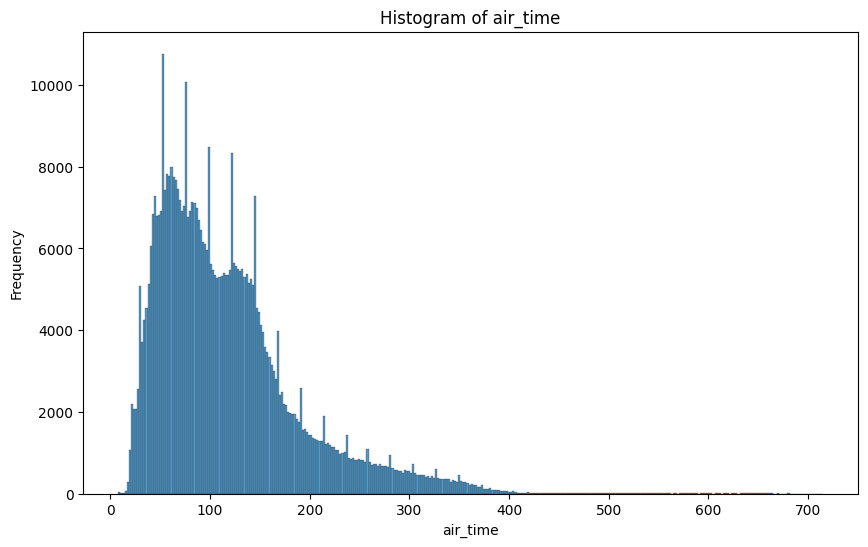

Statistics for flights:
Count Non Nulls: 504884
Count Unique: 1
Mean: 1.0
Median: 1.0
Mode: 1.0
Standard Deviation: 0.0
Variance: 0.0
Minimum: 1.0
Maximum: 1.0
Range: 0.0



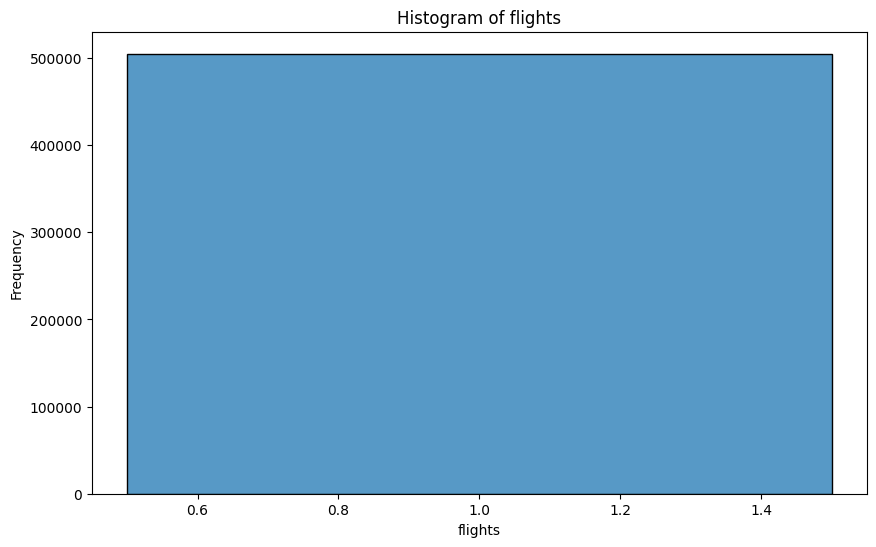

Statistics for distance:
Count Non Nulls: 504884
Count Unique: 1471
Mean: 841.5
Median: 705.0
Mode: 337.0
Standard Deviation: 594.2
Variance: 353103.4
Minimum: 31.0
Maximum: 5095.0
Range: 5064.0



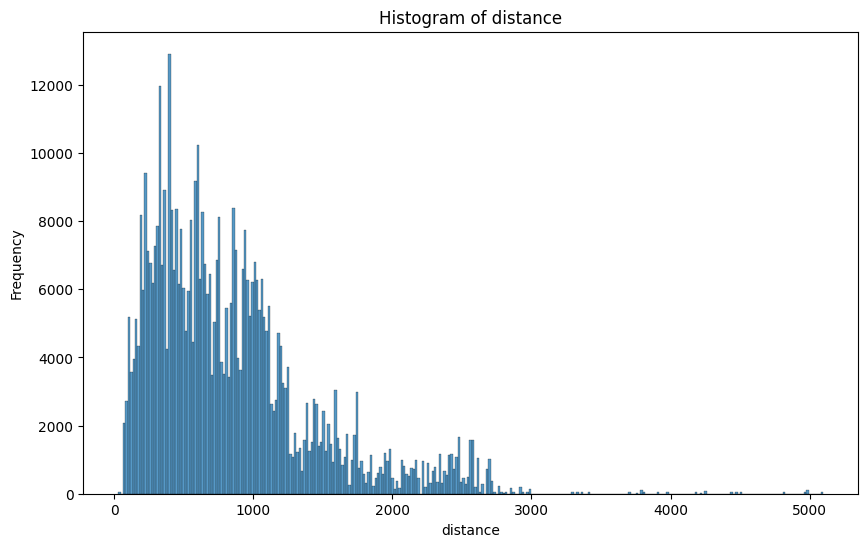

Statistics for distance_group:
Count Non Nulls: 504884
Count Unique: 11
Mean: 3.8
Median: 3.0
Mode: 2.0
Standard Deviation: 2.3
Variance: 5.4
Minimum: 1.0
Maximum: 11.0
Range: 10.0



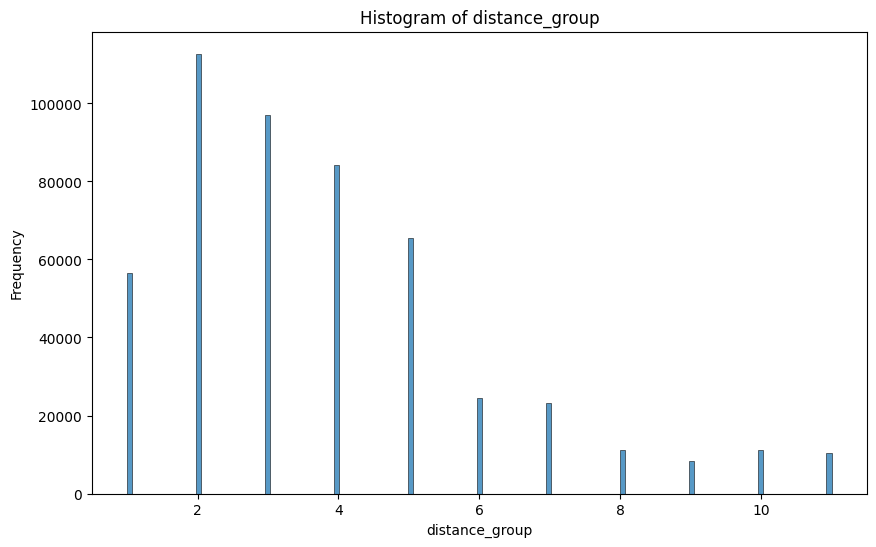

Statistics for carrier_delay:
Count Non Nulls: 103102
Count Unique: 840
Mean: 24.4
Median: 1.0
Mode: 0.0
Standard Deviation: 79.4
Variance: 6309.1
Minimum: 0.0
Maximum: 3403.0
Range: 3403.0



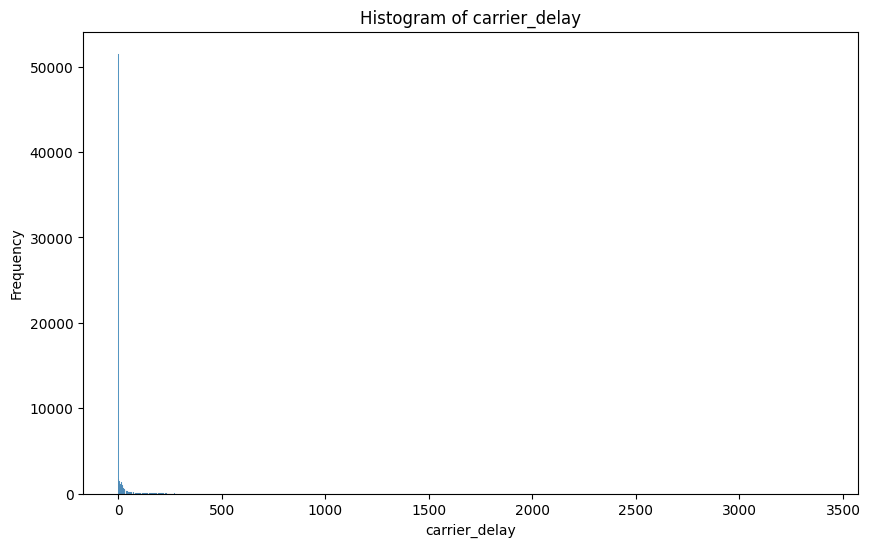

Statistics for weather_delay:
Count Non Nulls: 103102
Count Unique: 492
Mean: 4.7
Median: 0.0
Mode: 0.0
Standard Deviation: 36.0
Variance: 1294.3
Minimum: 0.0
Maximum: 1397.0
Range: 1397.0



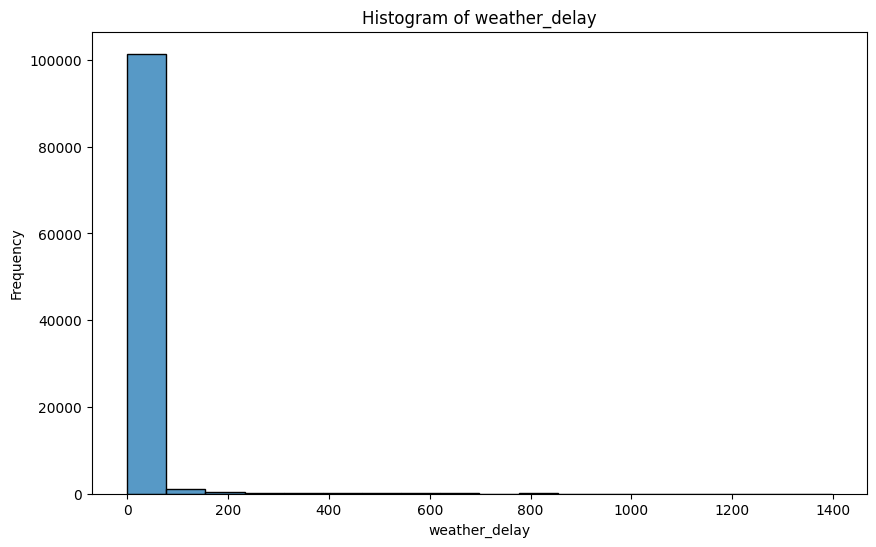

Statistics for nas_delay:
Count Non Nulls: 103102
Count Unique: 376
Mean: 16.2
Median: 3.0
Mode: 0.0
Standard Deviation: 32.6
Variance: 1062.7
Minimum: 0.0
Maximum: 1283.0
Range: 1283.0



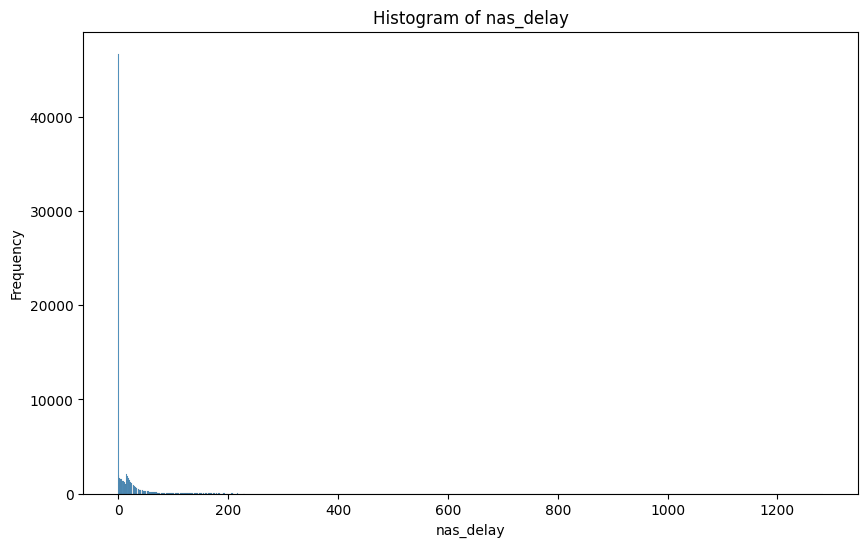

Statistics for security_delay:
Count Non Nulls: 103102
Count Unique: 81
Mean: 0.1
Median: 0.0
Mode: 0.0
Standard Deviation: 2.2
Variance: 4.7
Minimum: 0.0
Maximum: 263.0
Range: 263.0



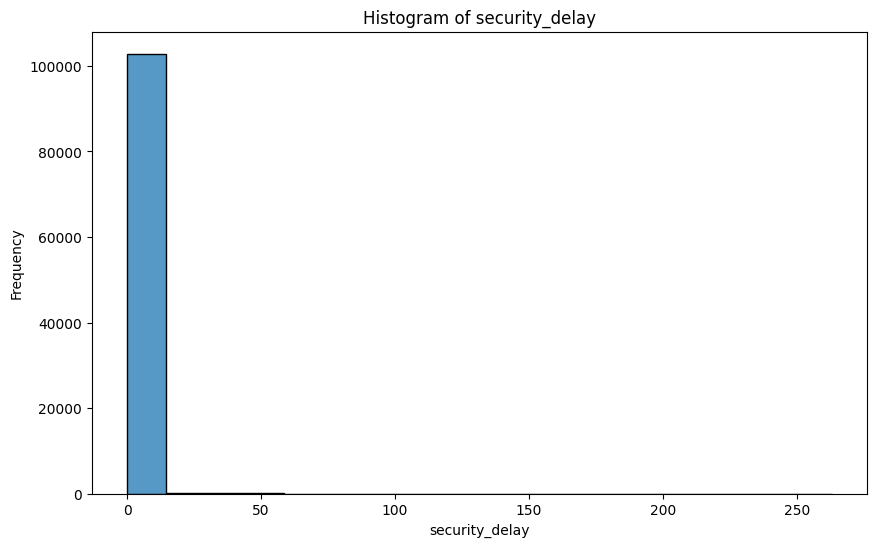

Statistics for late_aircraft_delay:
Count Non Nulls: 103102
Count Unique: 633
Mean: 26.5
Median: 0.0
Mode: 0.0
Standard Deviation: 60.1
Variance: 3615.5
Minimum: 0.0
Maximum: 1820.0
Range: 1820.0



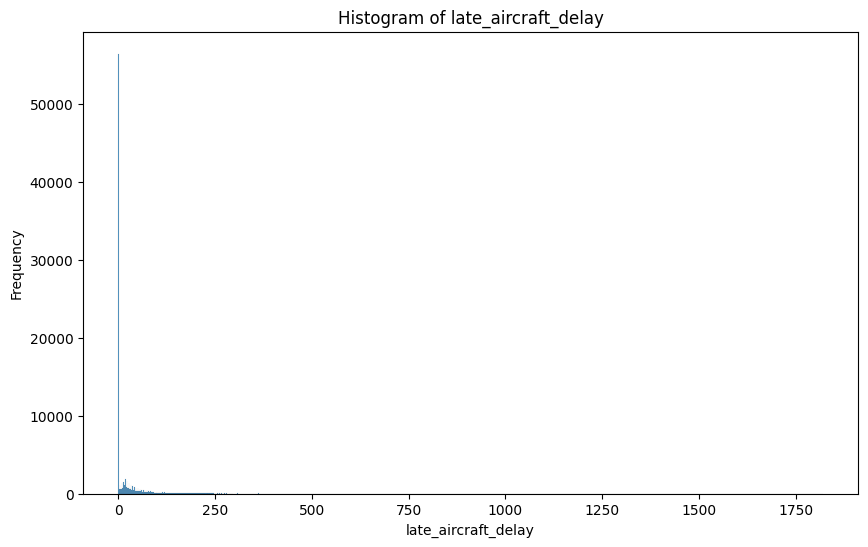

Statistics for first_dep_time:
Count Non Nulls: 3925
Count Unique: 1089
Mean: 1292.2
Median: 1252.0
Mode: 555.0
Standard Deviation: 521.1
Variance: 271565.7
Minimum: 2.0
Maximum: 2400.0
Range: 2398.0



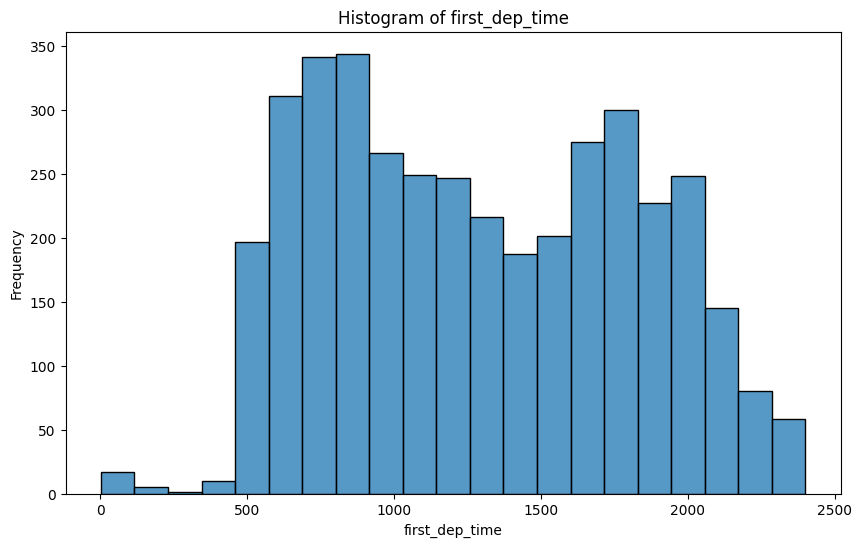

Statistics for total_add_gtime:
Count Non Nulls: 3925
Count Unique: 207
Mean: 43.0
Median: 32.0
Mode: 20.0
Standard Deviation: 36.7
Variance: 1346.7
Minimum: 1.0
Maximum: 350.0
Range: 349.0



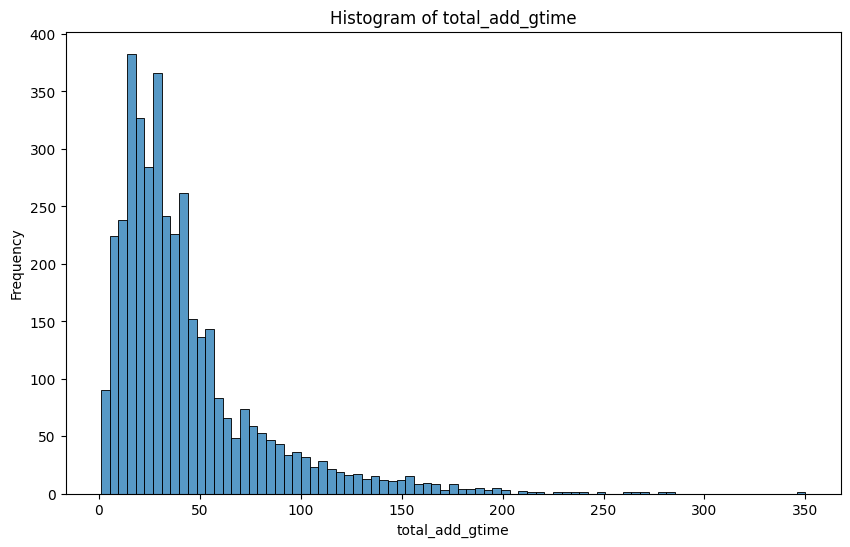

Statistics for longest_add_gtime:
Count Non Nulls: 3925
Count Unique: 193
Mean: 41.9
Median: 32.0
Mode: 16.0
Standard Deviation: 34.4
Variance: 1183.7
Minimum: 1.0
Maximum: 248.0
Range: 247.0



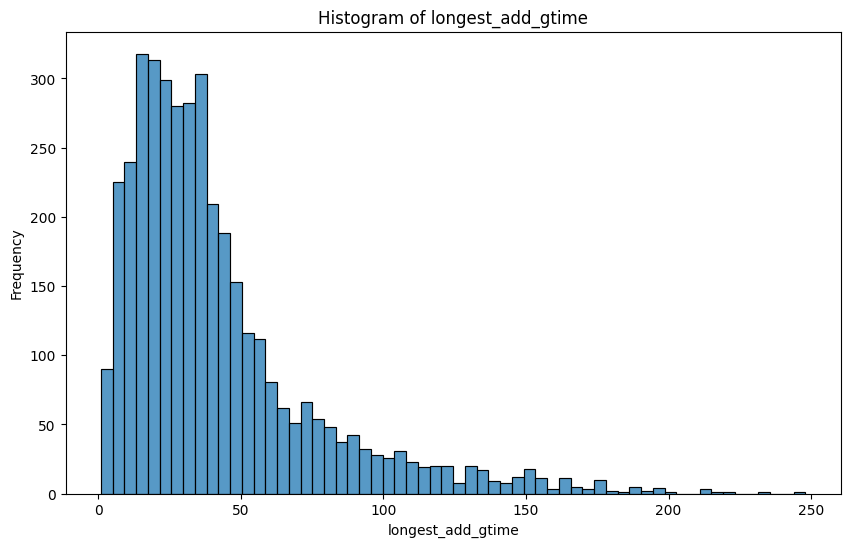

Statistics for div_airport_landings:
Count Non Nulls: 504884
Count Unique: 4
Mean: 0.0
Median: 0.0
Mode: 0.0
Standard Deviation: 0.1
Variance: 0.0
Minimum: 0.0
Maximum: 9.0
Range: 9.0



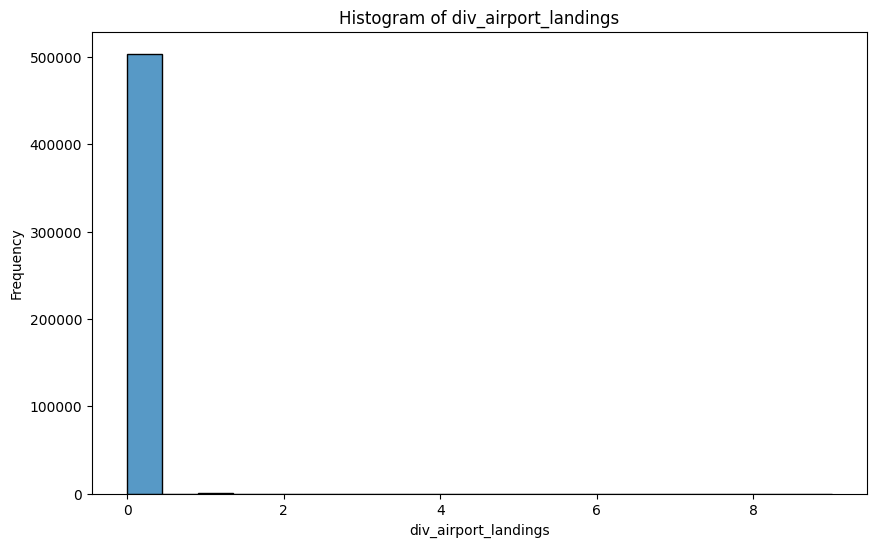

Statistics for div_reached_dest:
Count Non Nulls: 1003
Count Unique: 2
Mean: 0.9
Median: 1.0
Mode: 1.0
Standard Deviation: 0.3
Variance: 0.1
Minimum: 0.0
Maximum: 1.0
Range: 1.0



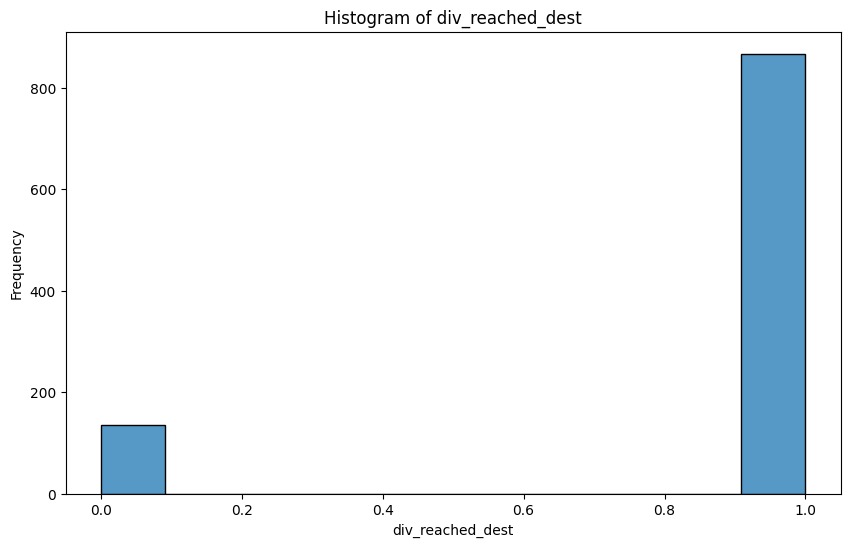

Statistics for div_actual_elapsed_time:
Count Non Nulls: 867
Count Unique: 470
Mean: 463.8
Median: 382.0
Mode: 310.0
Standard Deviation: 278.4
Variance: 77523.2
Minimum: 19.0
Maximum: 2982.0
Range: 2963.0



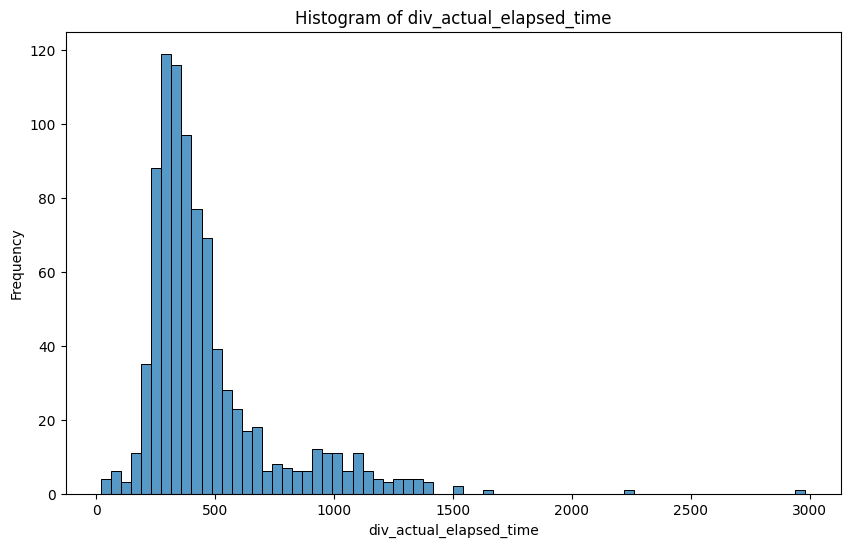

Statistics for div_arr_delay:
Count Non Nulls: 867
Count Unique: 450
Mean: 324.1
Median: 213.0
Mode: 175.0
Standard Deviation: 289.9
Variance: 84039.0
Minimum: -32.0
Maximum: 2819.0
Range: 2851.0



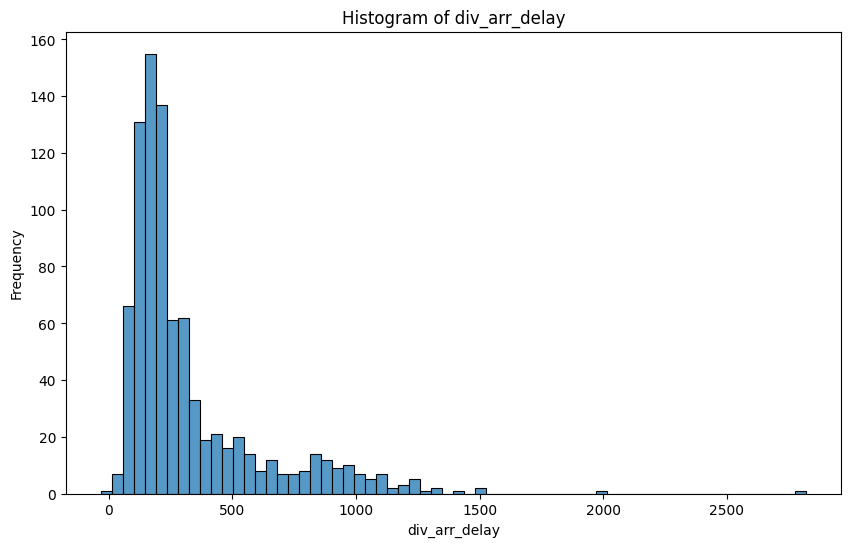

Statistics for div_distance:
Count Non Nulls: 1003
Count Unique: 68
Mean: 32.0
Median: 0.0
Mode: 0.0
Standard Deviation: 161.4
Variance: 26052.5
Minimum: 0.0
Maximum: 2398.0
Range: 2398.0



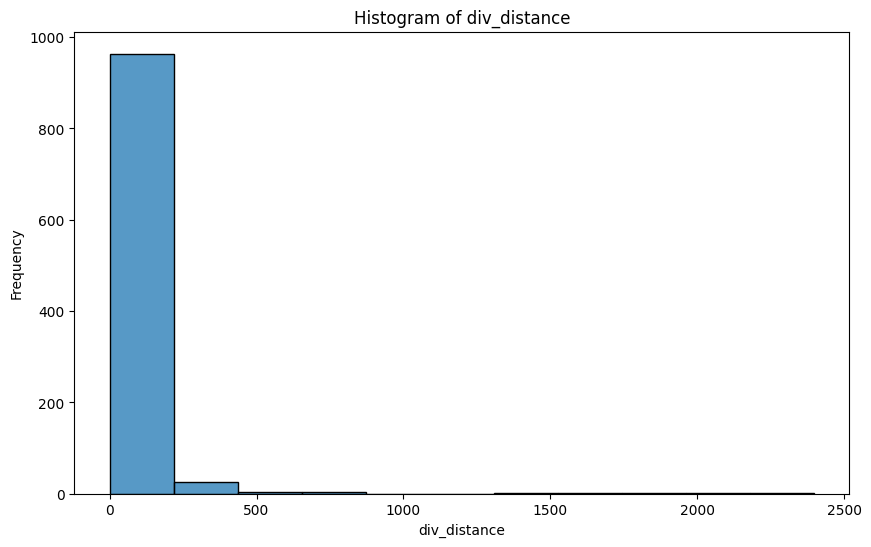

Statistics for div1_airport_id:
Count Non Nulls: 1093
Count Unique: 146
Mean: 12710.1
Median: 12478.0
Mode: 11292.0
Standard Deviation: 1527.0
Variance: 2331716.4
Minimum: 10135.0
Maximum: 16101.0
Range: 5966.0



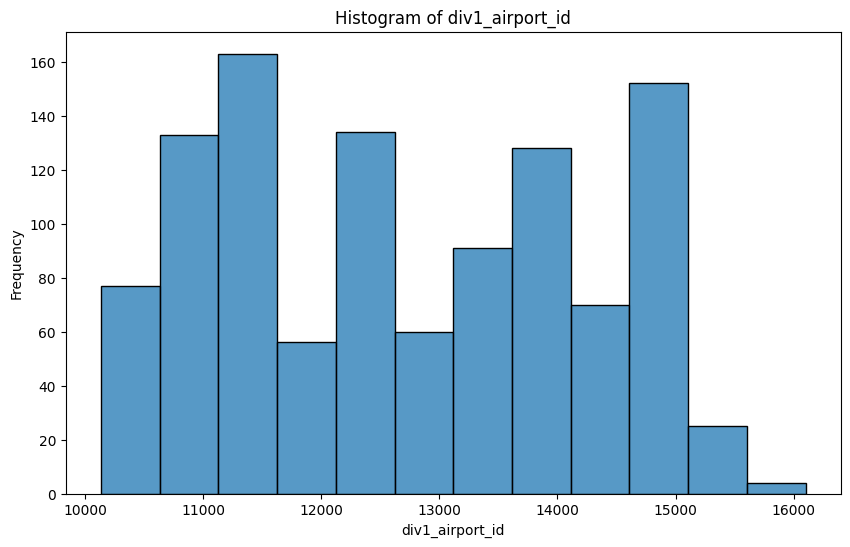

Statistics for div1_airport_seq_id:
Count Non Nulls: 1093
Count Unique: 146
Mean: 1271012.4
Median: 1247805.0
Mode: 1129202.0
Standard Deviation: 152699.4
Variance: 23317115135.1
Minimum: 1013506.0
Maximum: 1610102.0
Range: 596596.0



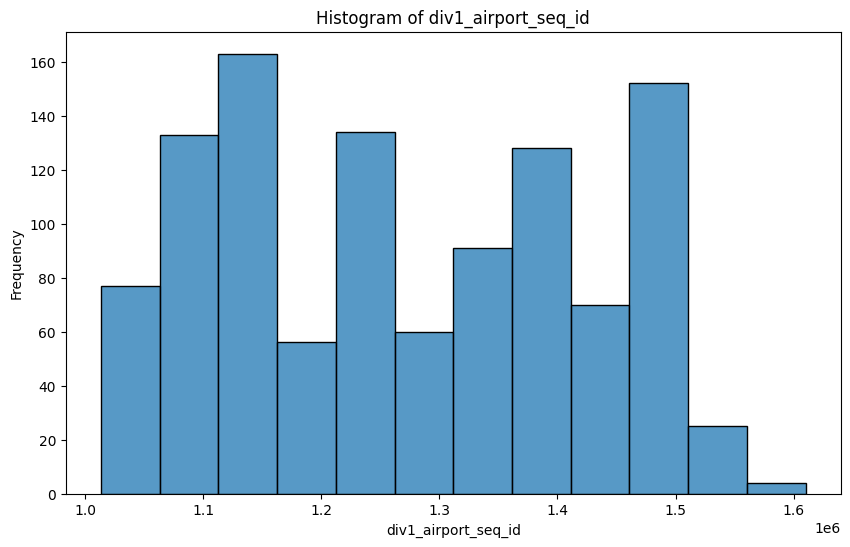

Statistics for div1_wheels_on:
Count Non Nulls: 1093
Count Unique: 711
Mean: 1462.0
Median: 1527.0
Mode: 1506.0
Standard Deviation: 590.6
Variance: 348757.0
Minimum: 2.0
Maximum: 2358.0
Range: 2356.0



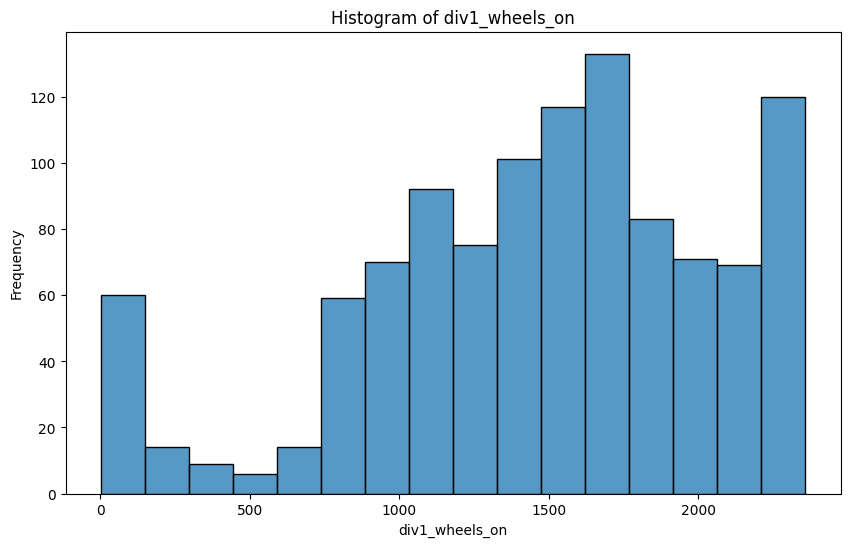

Statistics for div1_total_gtime:
Count Non Nulls: 1093
Count Unique: 137
Mean: 39.7
Median: 28.0
Mode: 23.0
Standard Deviation: 33.2
Variance: 1104.2
Minimum: 2.0
Maximum: 204.0
Range: 202.0



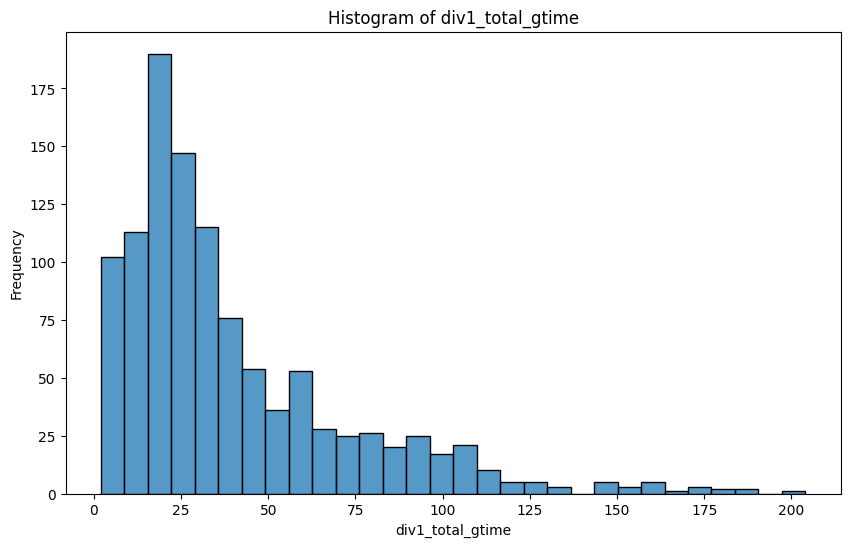

Statistics for div1_longest_gtime:
Count Non Nulls: 1093
Count Unique: 122
Mean: 31.2
Median: 19.0
Mode: 12.0
Standard Deviation: 28.7
Variance: 821.0
Minimum: 2.0
Maximum: 181.0
Range: 179.0



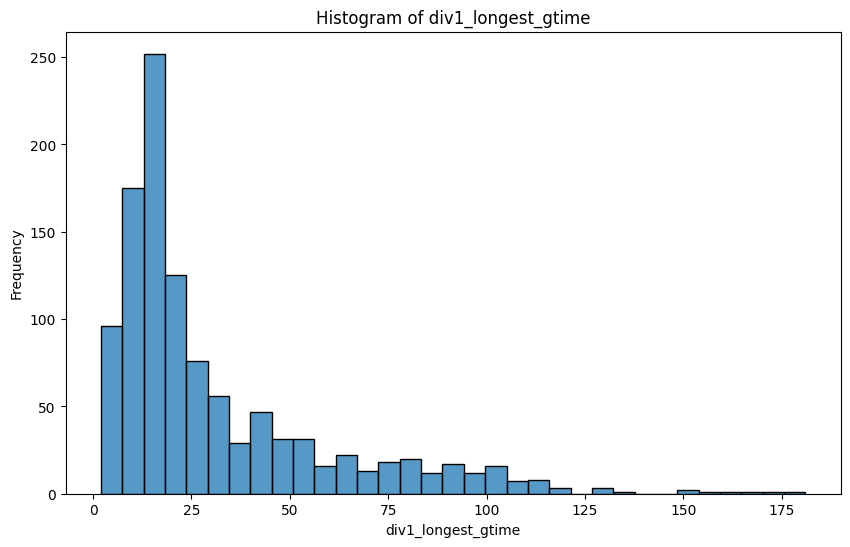

Statistics for div1_wheels_off:
Count Non Nulls: 881
Count Unique: 625
Mean: 1444.0
Median: 1521.0
Mode: 1221.0
Standard Deviation: 589.8
Variance: 347914.4
Minimum: 1.0
Maximum: 2358.0
Range: 2357.0



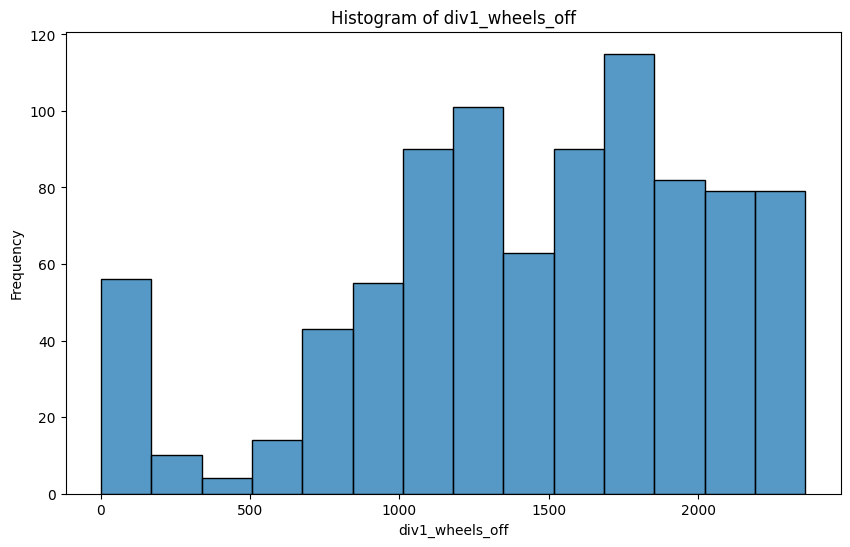

Statistics for div2_airport_id:
Count Non Nulls: 21
Count Unique: 13
Mean: 12985.2
Median: 12892.0
Mode: 11292.0
Standard Deviation: 1609.4
Variance: 2590162.2
Minimum: 10713.0
Maximum: 14893.0
Range: 4180.0



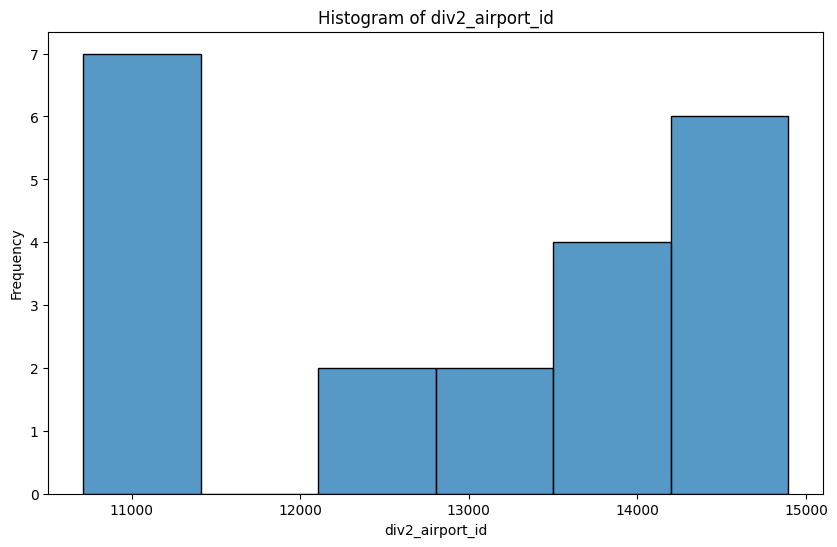

Statistics for div2_airport_seq_id:
Count Non Nulls: 21
Count Unique: 13
Mean: 1298522.7
Median: 1289208.0
Mode: 1129202.0
Standard Deviation: 160940.5
Variance: 25901854607.5
Minimum: 1071302.0
Maximum: 1489302.0
Range: 418000.0



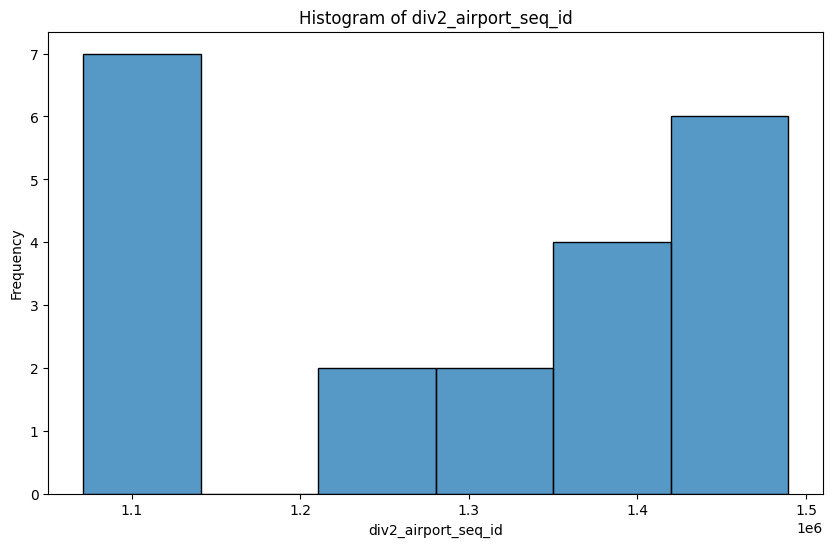

Statistics for div2_wheels_on:
Count Non Nulls: 21
Count Unique: 21
Mean: 1366.4
Median: 1708.0
Mode: 39.0
Standard Deviation: 747.6
Variance: 558898.6
Minimum: 39.0
Maximum: 2300.0
Range: 2261.0



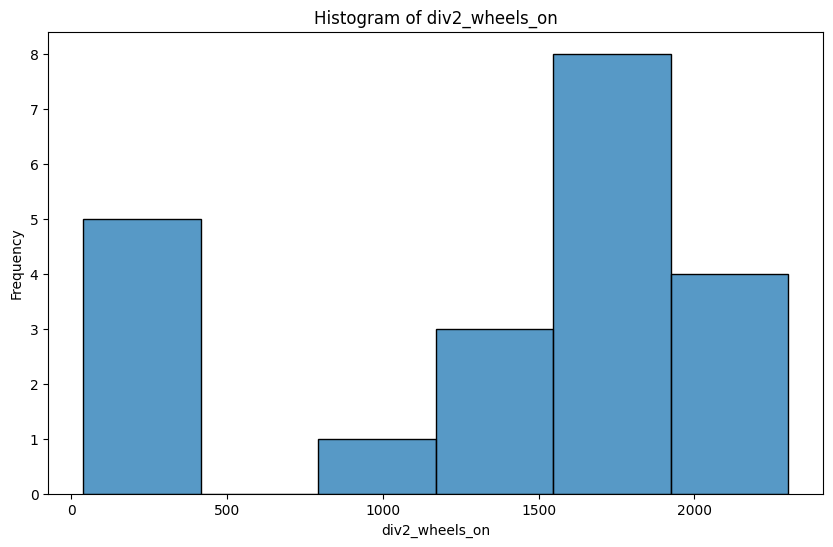

Statistics for div2_total_gtime:
Count Non Nulls: 21
Count Unique: 15
Mean: 21.4
Median: 15.0
Mode: 8.0
Standard Deviation: 14.1
Variance: 200.1
Minimum: 5.0
Maximum: 53.0
Range: 48.0



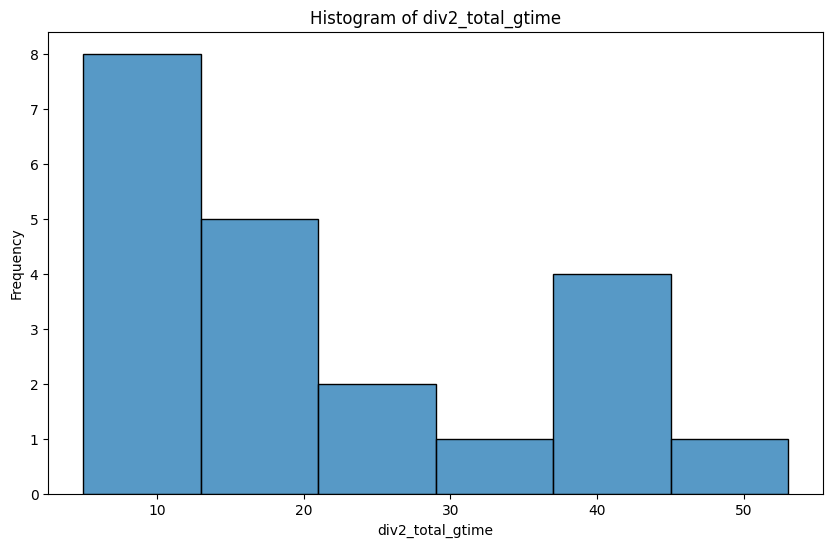

Statistics for div2_longest_gtime:
Count Non Nulls: 21
Count Unique: 13
Mean: 17.8
Median: 15.0
Mode: 8.0
Standard Deviation: 10.5
Variance: 109.6
Minimum: 5.0
Maximum: 40.0
Range: 35.0



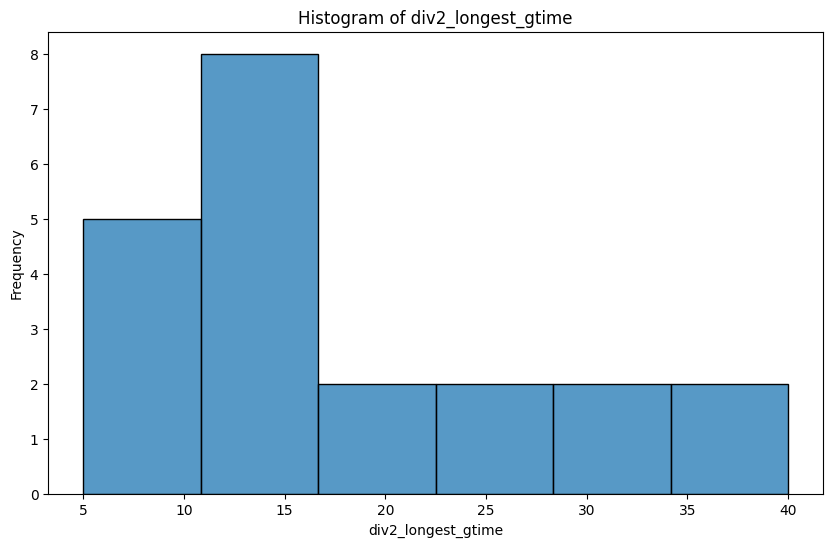

Statistics for div2_wheels_off:
Count Non Nulls: 8
Count Unique: 8
Mean: 1243.6
Median: 1190.0
Mode: 812.0
Standard Deviation: 408.2
Variance: 166658.8
Minimum: 812.0
Maximum: 2058.0
Range: 1246.0



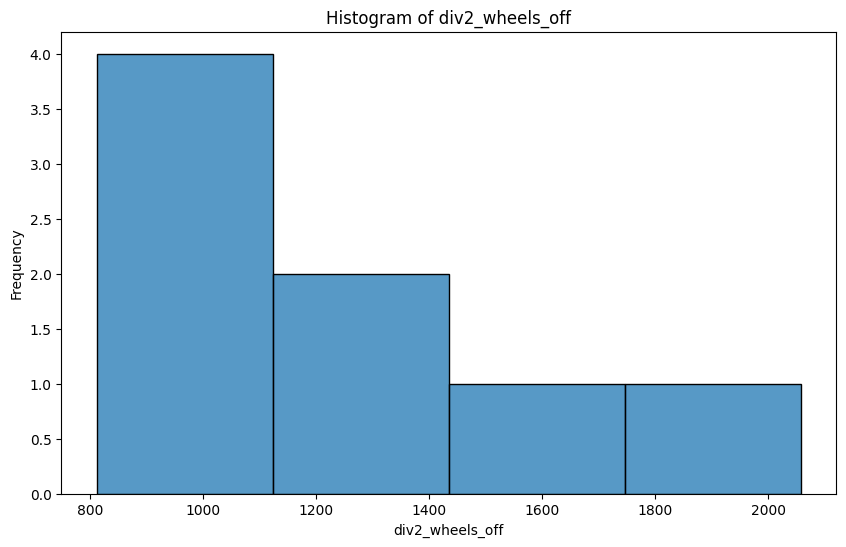

Statistics for div3_airport_id:
Count Non Nulls: 1
Count Unique: 1
Mean: 14869.0
Median: 14869.0
Mode: 14869.0
Standard Deviation: nan
Variance: nan
Minimum: 14869.0
Maximum: 14869.0
Range: 0.0



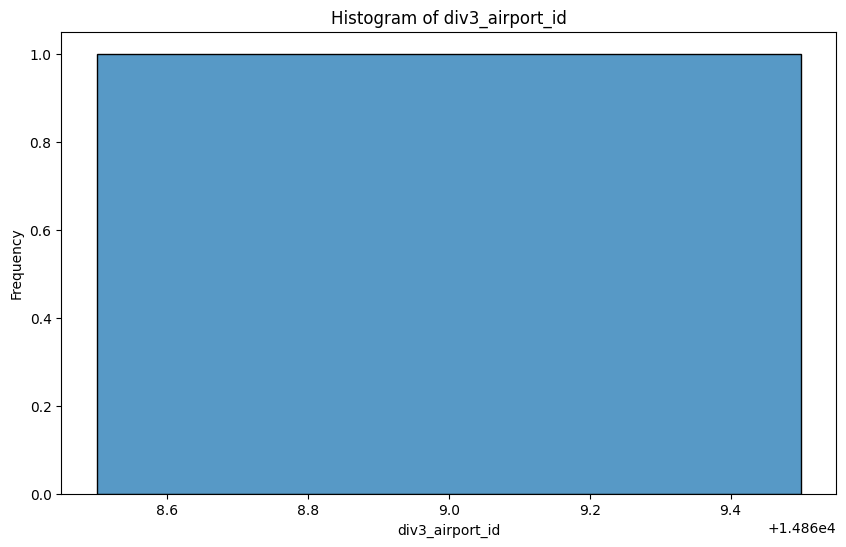

Statistics for div3_airport_seq_id:
Count Non Nulls: 1
Count Unique: 1
Mean: 1486903.0
Median: 1486903.0
Mode: 1486903.0
Standard Deviation: nan
Variance: nan
Minimum: 1486903.0
Maximum: 1486903.0
Range: 0.0



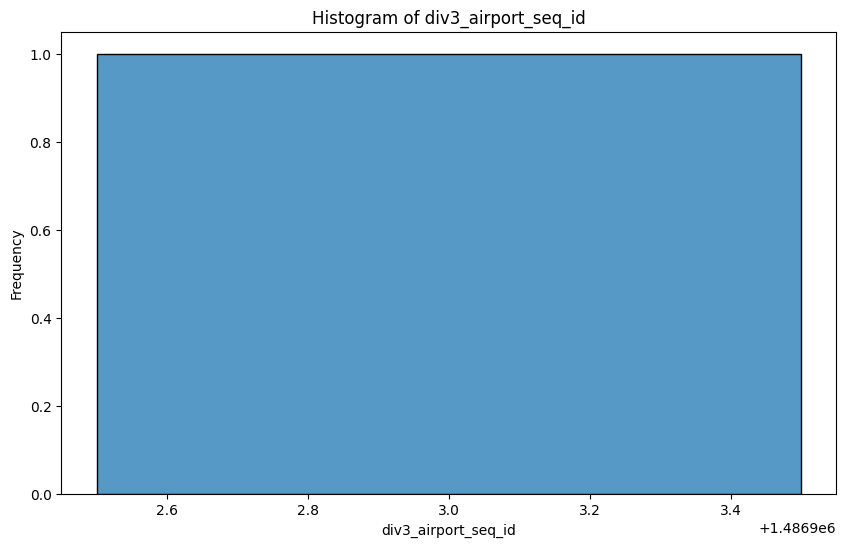

Statistics for div3_wheels_on:
Count Non Nulls: 1
Count Unique: 1
Mean: 35.0
Median: 35.0
Mode: 35.0
Standard Deviation: nan
Variance: nan
Minimum: 35.0
Maximum: 35.0
Range: 0.0



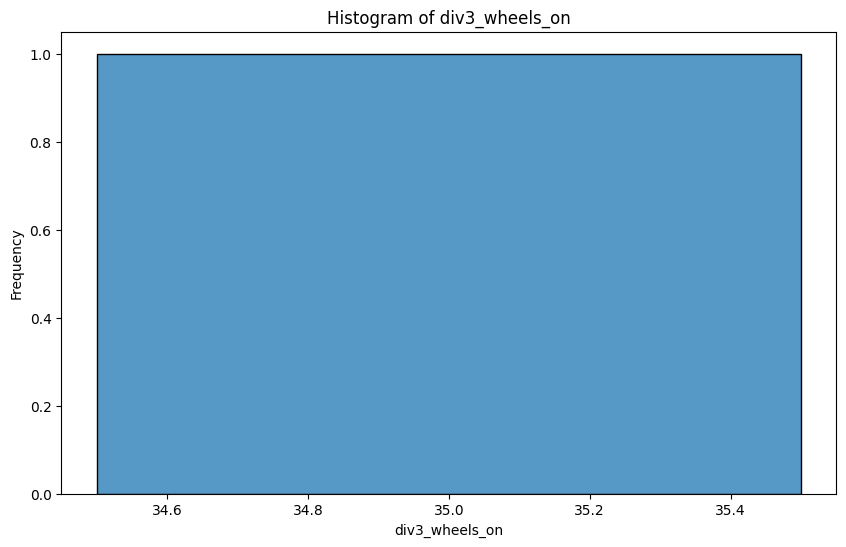

Statistics for div3_total_gtime:
Count Non Nulls: 1
Count Unique: 1
Mean: 7.0
Median: 7.0
Mode: 7.0
Standard Deviation: nan
Variance: nan
Minimum: 7.0
Maximum: 7.0
Range: 0.0



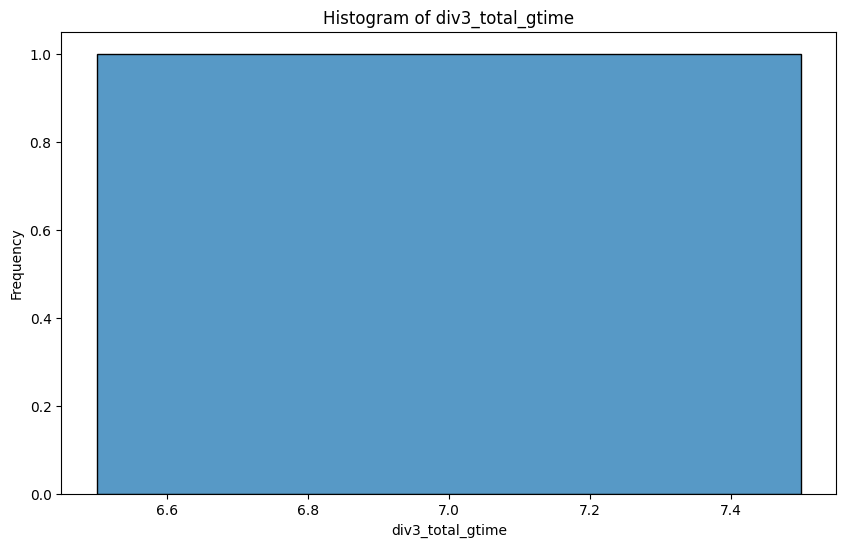

Statistics for div3_longest_gtime:
Count Non Nulls: 1
Count Unique: 1
Mean: 7.0
Median: 7.0
Mode: 7.0
Standard Deviation: nan
Variance: nan
Minimum: 7.0
Maximum: 7.0
Range: 0.0



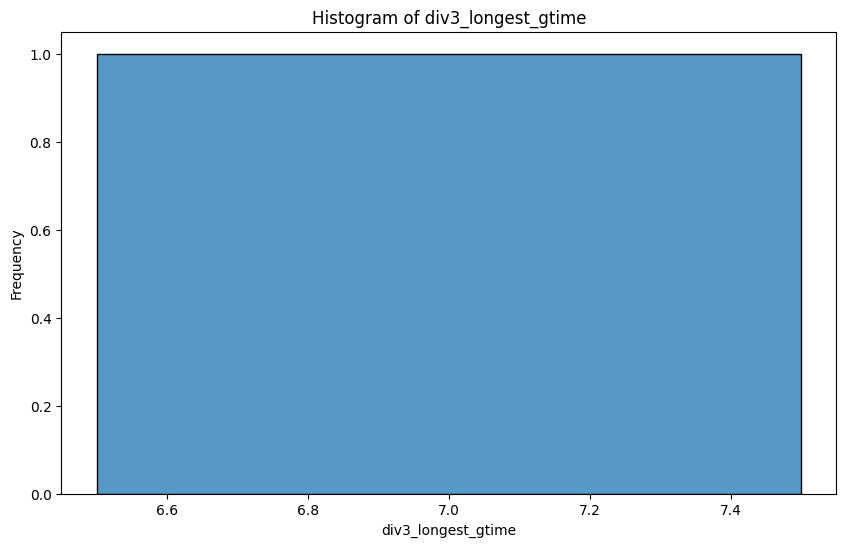

In [10]:
'''USDOT ONTIME DATASET'''
fname = "usdot_onetime_clean_no_encode.csv"
dataset_name = "usdot"
df = pd.read_csv(fname)

n_samples = 1000 # For Swarm Plots
generate_plots(df, sample_amt=n_samples,output_to_pdf=False, kde=False, violins=False, swarms=False, grouped_hists=False, ds_name=dataset_name)

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

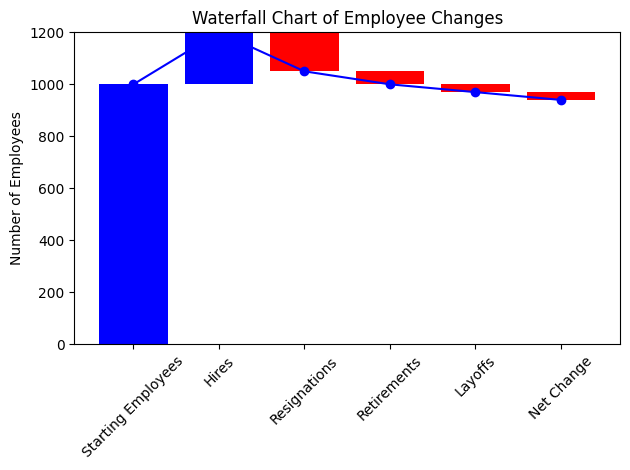

In [ ]:
# Drawing the waterfall plot from page 56

import matplotlib.pyplot as plt
import numpy as np

# Data for the waterfall chart
categories = ['Starting Employees', 'Hires', 'Resignations', 'Retirements', 'Layoffs', 'Net Change']
values = [1000, 200, -150, -50, -30, 0]

# Calculate the net change
values[-1] = sum(values[1:-1])

# Calculate the cumulative values
cumulative = np.cumsum(values)

# Create the waterfall chart
fig, ax = plt.subplots()

# Plot the bars
for i in range(len(values)):
    if values[i] >= 0:
        ax.bar(categories[i], values[i], bottom=cumulative[i] - values[i], color='blue')
    else:
        ax.bar(categories[i], values[i], bottom=cumulative[i] - values[i], color='red')

# Plot the cumulative line
ax.plot(categories, cumulative, color='blue', marker='o')

# Add labels and title
ax.set_ylabel('Number of Employees')
ax.set_title('Waterfall Chart of Employee Changes')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

